In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
from typing import List, Tuple

In [2]:
import matplotlib

font = {'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
save_plots = True
show_titles = False

In [4]:
## Create plots directory, if missing
plot_directory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'B_studies_on_parsed_logs/'
                  + 'protoparticle_data_distributions/'
)
pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

In [5]:
io_folder = '/scratch/user/adegenna/top50_debug_only/'
input_file = io_folder + 'davinci_parsed_log_truthmatched.h5'

In [6]:
df_events = pd.read_hdf(input_file, key='LHCbMC_Lb')
df_events

Lb_ENDVERTEX_X  Lb_ENDVERTEX_Y  Lb_ENDVERTEX_Z  L_ENDVERTEX_X  \
0           1.674753        0.053259        0.004623     461.983261   
1           0.880395       -0.130333       15.654301     209.545799   
2           0.893069       -0.210212       27.346294      84.953310   
3           0.605380       -0.202738       22.149234    -187.066928   
4           0.636031       -0.090822      -65.799311    -207.686722   
...              ...             ...             ...            ...   
6496        0.893651       -0.241412       -8.355713    -125.966633   
6497        3.966071       -2.533509       19.089908     951.244904   
6498        0.421768       -0.947067      -73.637508    -192.066143   
6499        0.950653       -0.221805       -6.273085     115.579259   
6500        0.652137       -0.272054        9.927893    -805.202514   

      L_ENDVERTEX_Y  L_ENDVERTEX_Z  Jpsi_ENDVERTEX_X  Jpsi_ENDVERTEX_Y  \
0        -78.247981    6504.222043            1.6747            0.0532   
1        199.243538    4381.083975            0.8804           -0.1302   
2       -116.199707    5557.096303            0.8930           -0.2103   
3         17.364279    3467.294482            0.6057           -0.2032   
4        152.674077    7297.794399            0.6356           -0.0907   
...             ...            ...               ...               ...   
6496    -256.004059    4922.386341            0.8932           -0.2407   
6497    -401.923404    4663.160501            3.9666           -2.5339   
6498    -297.004409    4468.714184            0.4218           -0.9471   
6499      44.852030    5494.442486            0.9512           -0.2219   
6500     216.406925    6832.902252            0.6522           -0.2720   

      Jpsi_ENDVERTEX_Z         L_PX  ...  pim_posMomCovMatrix_3_5  \
0               0.0037  4601.051416  ...                  3142.56   
1              15.6547   745.277623  ...                  9031.32   
2              27.3459   627.274341  ...                -28860.80   
3              22.1485 -2559.069617  ...                 26939.30   
4             -65.7961 -1549.606044  ...                -13094.40   
...                ...          ...  ...                      ...   
6496           -8.3660  -822.995268  ...                 -3460.50   
6497           19.0920  6062.898847  ...                 11824.60   
6498          -73.6377 -2005.253008  ...                 44215.30   
6499           -6.2745  1036.018343  ...                  8858.18   
6500            9.9275 -2702.956074  ...                 -2925.17   

      pim_posMomCovMatrix_3_6  pim_posMomCovMatrix_4_4  \
0                     3145.09                  17.4188   
1                     9376.81                  43.3318   
2                   -28879.30                 787.3740   
3                    26960.10                  90.1864   
4                   -13105.40                 201.6090   
...                       ...                      ...   
6496                 -4057.95                  26.0127   
6497                 11897.10                1431.6900   
6498                 44303.10                4699.9900   
6499                  8880.50                  16.3900   
6500                 -2977.45                  73.2014   

      pim_posMomCovMatrix_4_5  pim_posMomCovMatrix_4_6  \
0                   -213.8120                -214.0240   
1                     32.6465                  34.2547   
2                 -28372.3000              -28391.8000   
3                   5198.5100                5202.8900   
4                   6041.5000                6048.1100   
...                       ...                      ...   
6496                -318.8400                -374.3880   
6497              -15274.0000              -15371.8000   
6498              -79816.6000              -79987.3000   
6499                -294.3940                -295.1690   
6500                 931.3090                 949.0130   

      pim_posMomCovMatrix_5_5  pim_posMom

# Protoparticle distributions

In [7]:
histogram_parameters = {
    'seed_vtx_x': {
        'series': df_events['seed_vtx_X'],
        'boundaries': [-1500,1500],
        'axis_label': r'$x_\mathrm{seed}$ [mm]',
    },
    
    'seed_vtx_y': {
        'series': df_events['seed_vtx_Y'],
        'boundaries': [-1500,1500],
        'axis_label': r'$y_\mathrm{seed}$ [mm]',
    },
    
    'seed_vtx_z': {
        'series': df_events['seed_vtx_Z'],
        'boundaries': [4000,9000],
        'axis_label': r'$z_\mathrm{seed}$ [mm]',
    },
    
    'seed_ci_xx': {
        'series': df_events['seed_ci_0_0'],
        'boundaries': [0,.3],
        'axis_label': '$C_i^{00}$',
    },
    
    'seed_ci_xy': {
        'series': df_events['seed_ci_0_1'],
        'boundaries': [-4e-3,4e-3],
        'axis_label': '$C_i^{01}$',
    },
    
    'seed_ci_yy': {
        'series': df_events['seed_ci_1_1'],
        'boundaries': [0,1.75e-3],
        'axis_label': '$C_i^{11}$',
    },
    
    'seed_ci_yz': {
        'series': df_events['seed_ci_1_2'],
        'boundaries': [-2e-4,2e-4],
        'axis_label': '$C_i^{12}$',
    },
    
    'seed_ci_zz': {
        'series': df_events['seed_ci_2_2'],
        'boundaries': [0,4e-3],
        'axis_label': '$C_i^{22}$',
    },
    
    'p_refPoint_x': {
        'series': df_events['p_refPoint_X'],
        'boundaries': [-2000,2000],
        'axis_label': r'$x_\mathrm{ref}(p)$ [mm]',
    },
    
    'p_refPoint_y': {
        'series': df_events['p_refPoint_Y'],
        'boundaries': [-2000,2000],
        'axis_label': r'$y_\mathrm{ref}(p)$ [mm]',
    },
    
    'p_refPoint_z': {
        'series': df_events['p_refPoint_Z'],
        'boundaries': [7600,8100],
        'axis_label': r'$z_\mathrm{ref}(p)$ [mm]',
    },
    
    'p_momentum_x': {
        'series': df_events['p_momentum_X']/1000,
        'boundaries': [-7,7],
        'axis_label': '$p_x(p)$ [GeV/$c$]',
    },
    
    'p_momentum_y': {
        'series': df_events['p_momentum_Y']/1000,
        'boundaries': [-5,5],
        'axis_label': '$p_y(p)$ [GeV/$c$]',
    },
    
    'p_momentum_T': {
        'series': np.sqrt(df_events['p_momentum_X']**2 + df_events['p_momentum_Y']**2)/1000,
        'boundaries': [0,10],
        'axis_label': '$p_\mathrm{T}(p)$ [GeV/$c$]',
    },
    
    'p_momentum_z': {
        'series': df_events['p_momentum_Z']/1000,
        'boundaries': [0,1e2],
        'axis_label': '$p_z(p)$ [GeV/$c$]',
    },
    
    'p_energy': {
        'series': df_events['p_energy']/1000,
        'boundaries': [0,1e2],
        'axis_label': '$E(p)$ [GeV]',
    },
    
    'pim_refPoint_x': {
        'series': df_events['pim_refPoint_X'],
        'boundaries': [-2500,2500],
        'axis_label': r'$x_\mathrm{ref}(\pi^-)$ [mm]',
    },
    
    'pim_refPoint_y': {
        'series': df_events['pim_refPoint_Y'],
        'boundaries': [-1000,1000],
        'axis_label': r'$y_\mathrm{ref}(\pi^-)$ [mm]',
    },
    
    'pim_refPoint_z': {
        'series': df_events['pim_refPoint_Z'],
        'boundaries': [7600,8100],
        'axis_label': r'$z_\mathrm{ref}(\pi^-)$ [mm]',
    },
    
    'pim_momentum_x': {
        'series': df_events['pim_momentum_X']/1000,
        'boundaries': [-2.5,2.5],
        'axis_label': '$p_x(\pi^-)$ [GeV/$c$]',
    },
    
    'pim_momentum_y': {
        'series': df_events['pim_momentum_Y']/1000,
        'boundaries': [-1,1],
        'axis_label': '$p_y(\pi^-)$ [GeV/$c$]',
    },
    
    'pim_momentum_T': {
        'series': np.sqrt(df_events['pim_momentum_X']**2 + df_events['pim_momentum_Y']**2)/1000,
        'boundaries': [0,5],
        'axis_label': '$p_\mathrm{T}(\pi^-)$ [GeV/$c$]',
    },
    
    'pim_momentum_z': {
        'series': df_events['pim_momentum_Z']/1000,
        'boundaries': [0,4e1],
        'axis_label': '$p_z(\pi^-)$ [GeV/$c$]',
    },
    
    'pim_energy': {
        'series': df_events['pim_energy']/1000,
        'boundaries': [0,4e1],
        'axis_label': '$E(\pi^-)$ [GeV]',
    },    
}

## Individual histograms

In [29]:
def plot_protoparticle_histograms(
    df: pd.DataFrame,
    series: pd.Series,
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: List[float],
    scale: str = 'linear',
    scientific_notation: bool = False,
    normalized: bool = True,
    save_this_plot: bool = False,
    legend_loc: str = None,
    ylim: Tuple[float] = None
):
    
    hist_converged_color = {
        'histtype': 'stepfilled',
        'edgecolor': 'black',
        'hatch': '--',
        'facecolor': 'none'
    }
    
    hist_failed_color = {
        'histtype': 'stepfilled',
        'edgecolor': 'black',
        'hatch': '//',
        'facecolor': 'none'
    }
    
    ## Converged
    plt.hist(series.loc[df['status'] == 'Converged'],
             bins=binning,
             range=boundaries,
             label="Converged",
             density=normalized,
             **hist_converged_color,
    )
    
    ## Failed
    plt.hist(series.loc[df['status'] == 'NonConverged'],
             bins=binning,
             range=boundaries,
             label="Non-converged",
             density=normalized,
             **hist_failed_color
    )
    
   
    plt.xlabel(axis_label)
    
    if show_titles:
        plt.title(plot_title)
    
    plt.yscale(scale)
    
    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend(frameon=False, loc=legend_loc)
    
    if ylim is not None:
        plt.ylim(ylim)
    
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots and save_this_plot:
        plt.savefig(plot_directory + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

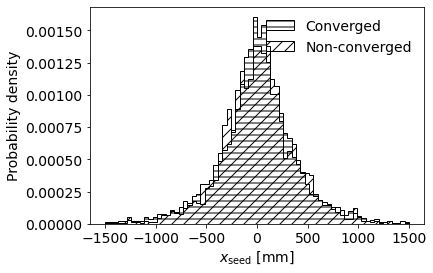

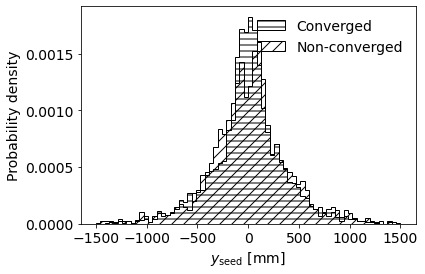

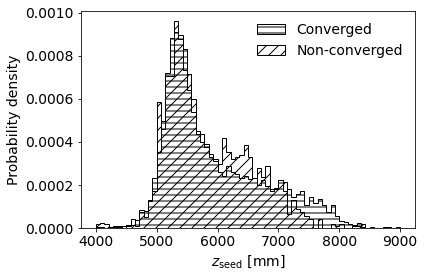

In [9]:
for feature in [key for key in histogram_parameters.keys() if key.startswith('seed_vtx')]:
    
    plot_arguments = histogram_parameters[feature].copy()
    plot_arguments['binning'] = 70
    plot_arguments["normalized"] = True
    plot_arguments['scale'] = 'linear'
    plot_arguments['file_name'] = feature
    plot_arguments['plot_title'] = "Seed vertex $" + feature[-1] + "$ component"
    
    plot_protoparticle_histograms(df=df_events, **plot_arguments)

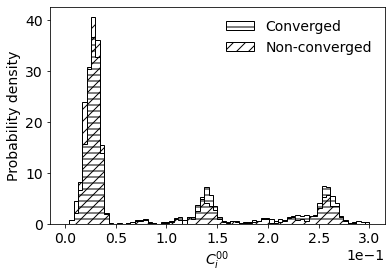

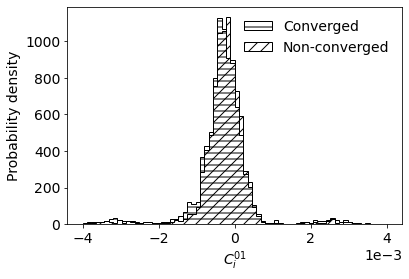

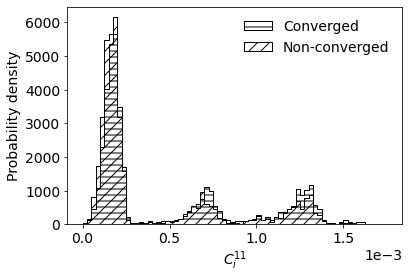

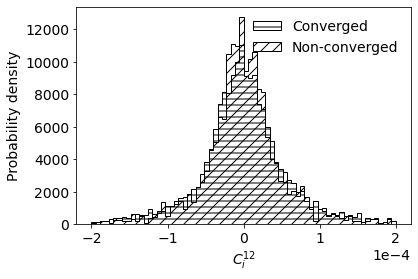

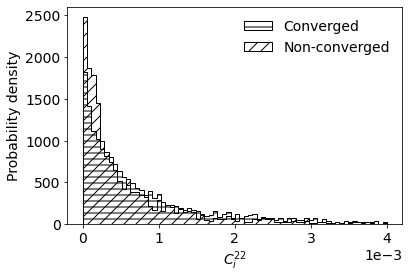

In [10]:
for feature in [key for key in histogram_parameters.keys() if key.startswith('seed_ci')]:
    
    plot_arguments = histogram_parameters[feature].copy()
    plot_arguments['binning'] = 70
    plot_arguments["normalized"] = True
    plot_arguments['scale'] = 'linear'
    plot_arguments['file_name'] = feature
    plot_arguments['scientific_notation'] = True
    plot_arguments['plot_title'] = "Seed inverse covariance matrix $" + feature[-2] + feature[-1] + "$ component"
    
    plot_protoparticle_histograms(df=df_events, **plot_arguments)

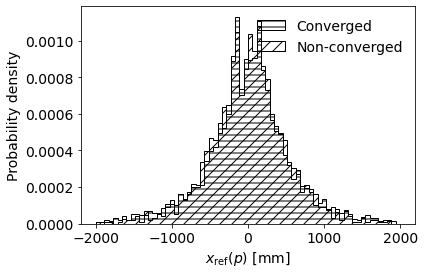

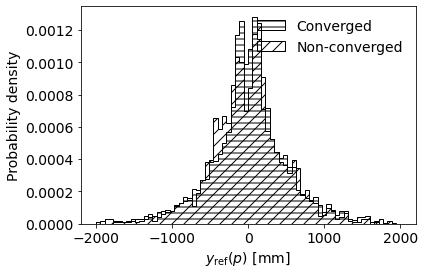

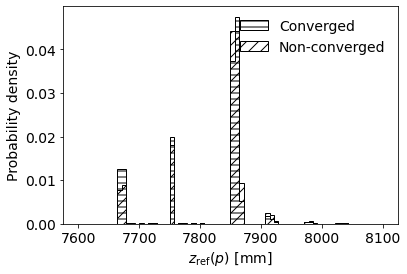

In [11]:
for feature in [key for key in histogram_parameters.keys() if key.startswith('p_refPoint')]:
    
    plot_arguments = histogram_parameters[feature].copy()
    plot_arguments['binning'] = 70
    plot_arguments["normalized"] = True
    plot_arguments['scale'] = 'linear'
    plot_arguments['file_name'] = feature
    plot_arguments['plot_title'] = "Proton PP reference point $" + feature[-1] + "$ component"
    plot_protoparticle_histograms(df=df_events, **plot_arguments)

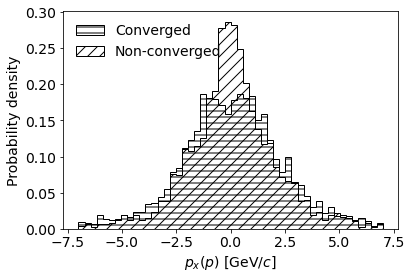

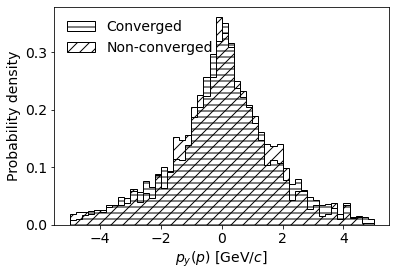

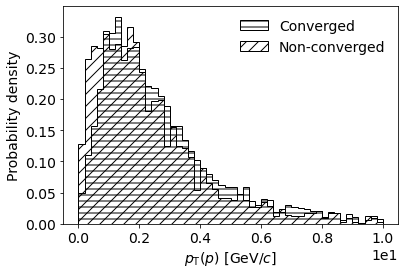

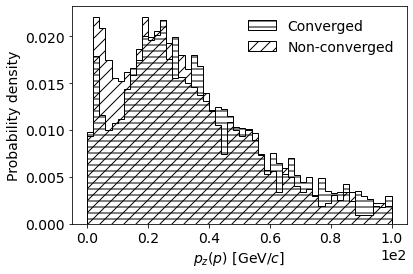

In [23]:
for feature in [key for key in histogram_parameters.keys() if key.startswith('p_momentum')]:
    
    plot_arguments = histogram_parameters[feature].copy()
    plot_arguments['binning'] = 50
    plot_arguments["normalized"] = True
    plot_arguments['scale'] = 'linear'
    plot_arguments['file_name'] = feature
    plot_arguments['scientific_notation'] = True
    plot_arguments['plot_title'] = "Proton PP momentum $" + feature[-1] + "$ component"
    if feature.endswith(('x', 'y')):
        plot_arguments['legend_loc'] = 'upper left'
    plot_arguments['plot_title'] = "Proton PP momentum $" + feature[-1] + "$ component"
    plot_protoparticle_histograms(df=df_events, **plot_arguments)

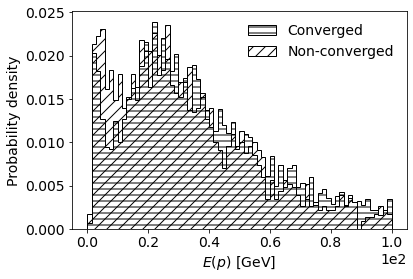

In [13]:
feature = 'p_energy'
plot_arguments = histogram_parameters[feature].copy()
plot_arguments['binning'] = 70
plot_arguments["normalized"] = True
plot_arguments['scale'] = 'linear'
plot_arguments['file_name'] = feature
plot_arguments['scientific_notation'] = True
plot_arguments['plot_title'] = "Proton PP energy"
plot_protoparticle_histograms(df=df_events, **plot_arguments)

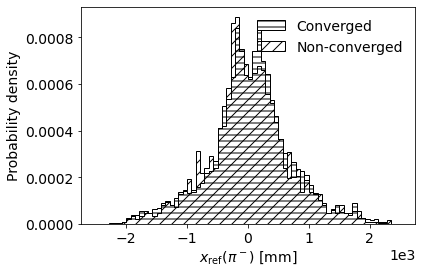

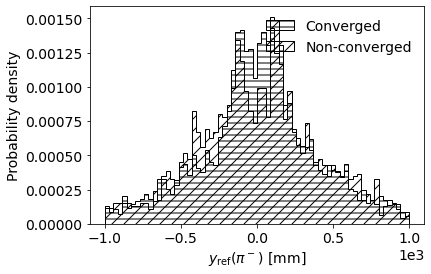

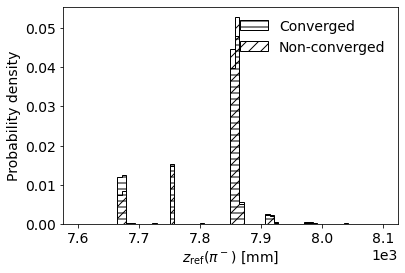

In [14]:
for feature in [key for key in histogram_parameters.keys() if key.startswith('pim_refPoint')]:
    
    plot_arguments = histogram_parameters[feature].copy()
    plot_arguments['binning'] = 70
    plot_arguments["normalized"] = True
    plot_arguments['scale'] = 'linear'
    plot_arguments['file_name'] = feature
    plot_arguments['scientific_notation'] = True
    plot_arguments['plot_title'] = "Pion PP reference point $" + feature[-1] + "$ component"
    plot_protoparticle_histograms(df=df_events, **plot_arguments)

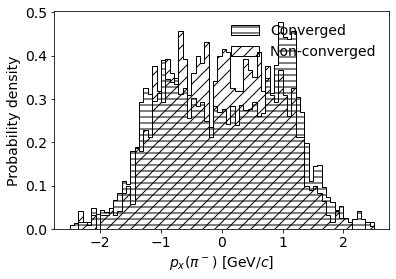

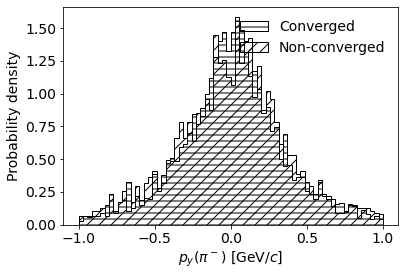

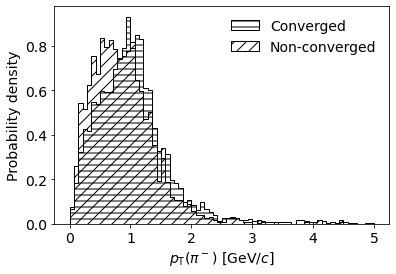

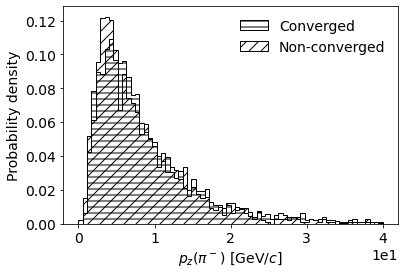

In [15]:
for feature in [key for key in histogram_parameters.keys() if key.startswith('pim_momentum')]:
    
    plot_arguments = histogram_parameters[feature].copy()
    plot_arguments['binning'] = 70
    plot_arguments["normalized"] = True
    plot_arguments['scale'] = 'linear'
    plot_arguments['file_name'] = feature
    plot_arguments['scientific_notation'] = True
    plot_arguments['plot_title'] = "Pion PP momentum $" + feature[-1] + "$ component"
    plot_protoparticle_histograms(df=df_events, **plot_arguments)

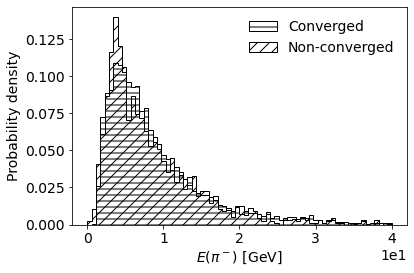

In [16]:
feature = 'pim_energy'
plot_arguments = histogram_parameters[feature].copy()
plot_arguments['binning'] = 70
plot_arguments["normalized"] = True
plot_arguments['scale'] = 'linear'
plot_arguments['file_name'] = feature
plot_arguments['scientific_notation'] = True
plot_arguments['plot_title'] = "Pion PP energy"
plot_protoparticle_histograms(df=df_events, **plot_arguments)

## 2D histograms

In [17]:
def plot_paired_2D_histograms(
    df: pd.DataFrame,
    feature_x_args: dict,
    feature_y_args: dict,
    binning: int,
    plot_title: str,
    file_name: str,
    normalized: bool = True,
    scientific_notation: bool = False,
    save_this_plot: bool = False
):
    
    plt.figure(figsize=(13,4))
    plt.subplot(1, 2, 1)
    
    colormap = 'binary_r'
    
    ## Converged
    plt.hist2d(
        x=feature_x_args['series'].loc[df['status'] == 'Converged'],
        y=feature_y_args['series'].loc[df['status'] == 'Converged'],
        cmap=colormap,
        bins=binning,
        range=[feature_x_args['boundaries'],feature_y_args['boundaries']],
        density=normalized
    )
    
    plt.xlabel(feature_x_args['axis_label'])
    plt.ylabel(feature_y_args['axis_label'])
    
    if show_titles:
        plt.title(plot_title + "\nConverged events")
    
    if normalized:
        plt.colorbar(label='Probability density')
    else:
        plt.colorbar(label='Events')
        
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    ## Failed
    plt.subplot(1, 2, 2)
    plt.hist2d(
        x=feature_x_args['series'].loc[df['status'] == 'NonConverged'],
        y=feature_y_args['series'].loc[df['status'] == 'NonConverged'],
        cmap=colormap,
        bins=binning,
        range=[feature_x_args['boundaries'], feature_y_args['boundaries']],
        density=normalized
    )
    
    plt.xlabel(feature_x_args['axis_label'])
    plt.ylabel(feature_y_args['axis_label'])
    
    if show_titles:
        plt.title(plot_title + "\nFailed events")
    
    if normalized:
        plt.colorbar(label='Probability density')
    else:
        plt.colorbar(label='Events')
        
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    if save_plots and save_this_plot:
        plt.savefig(plot_directory + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

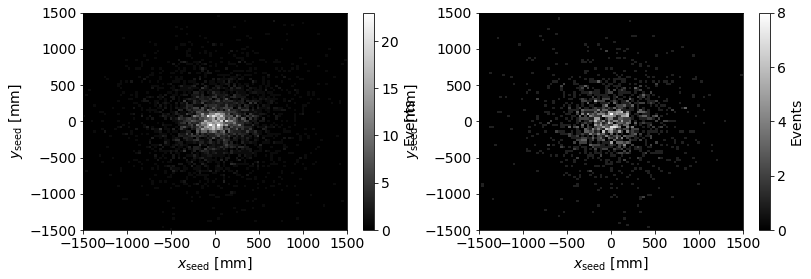

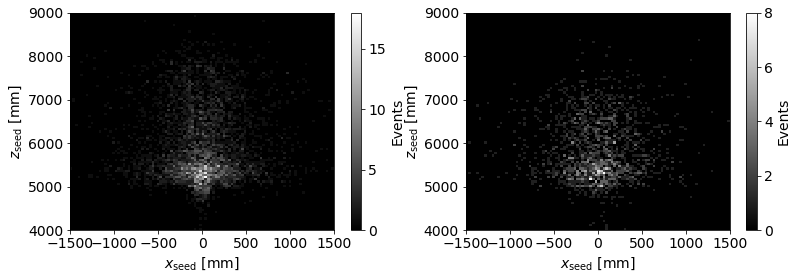

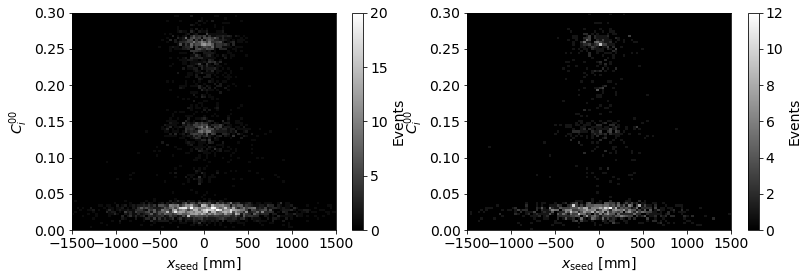

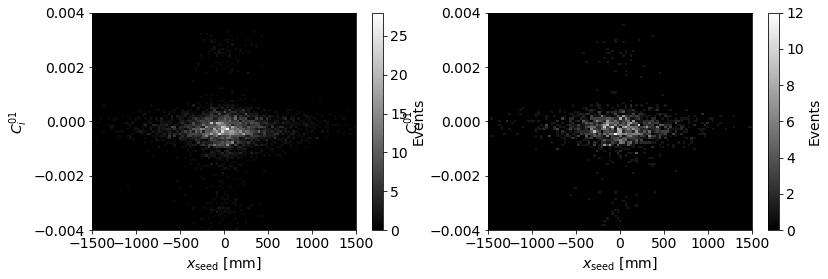

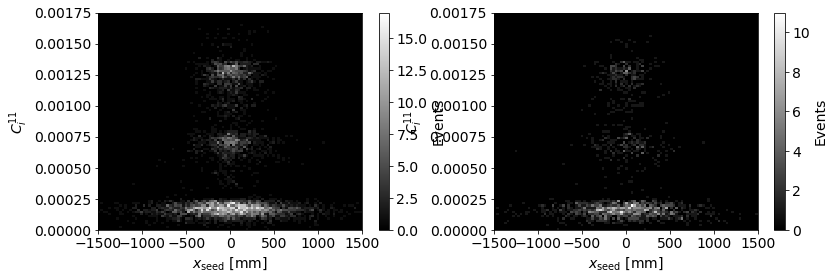

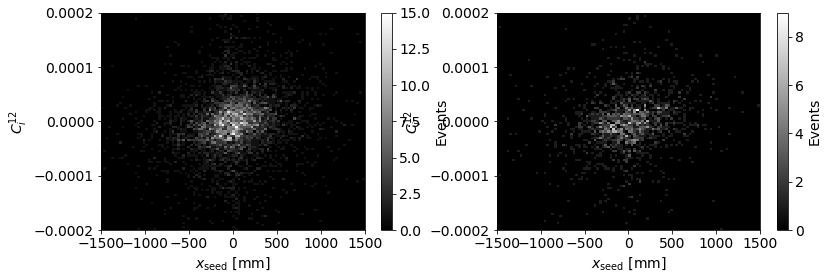

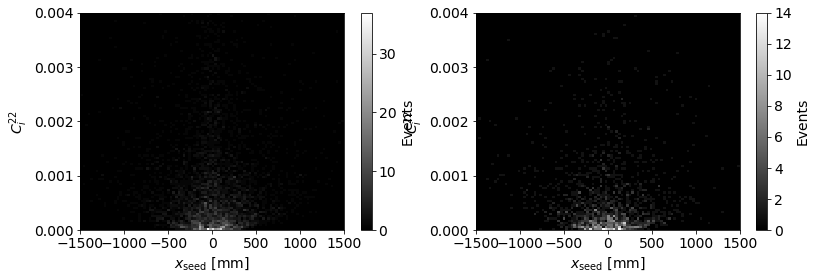

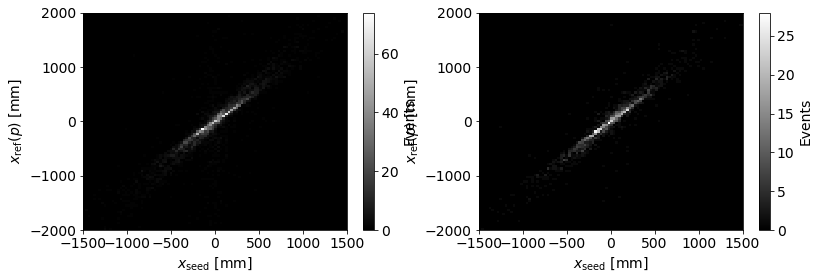

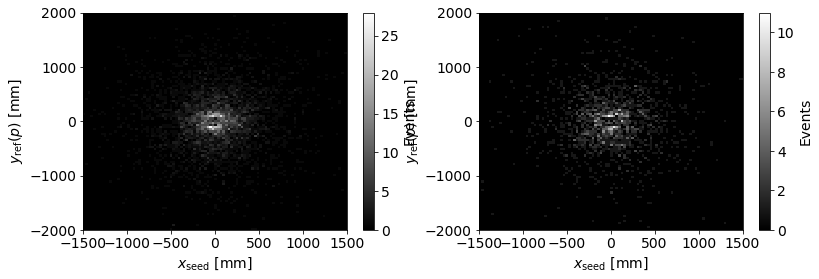

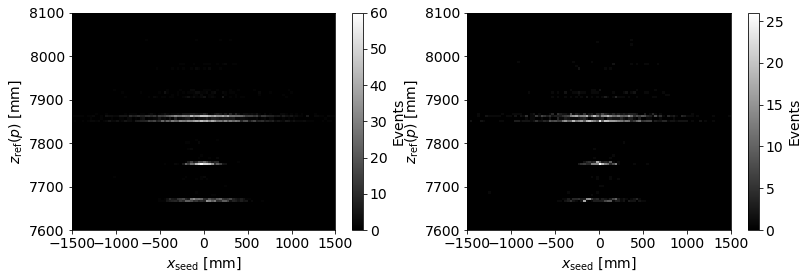

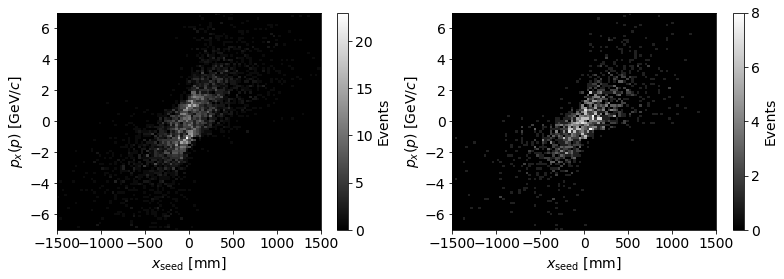

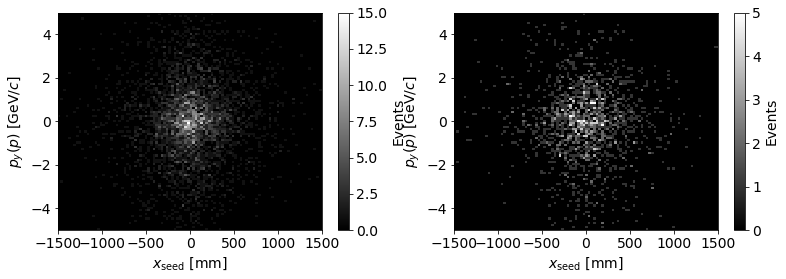

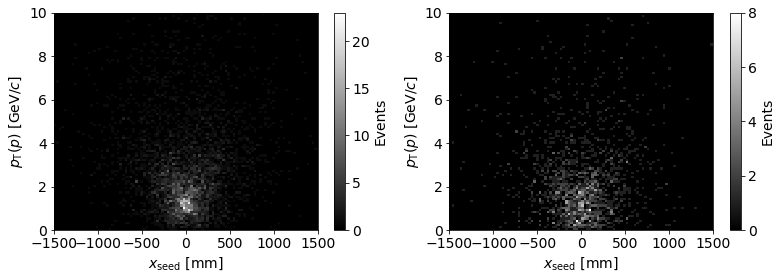

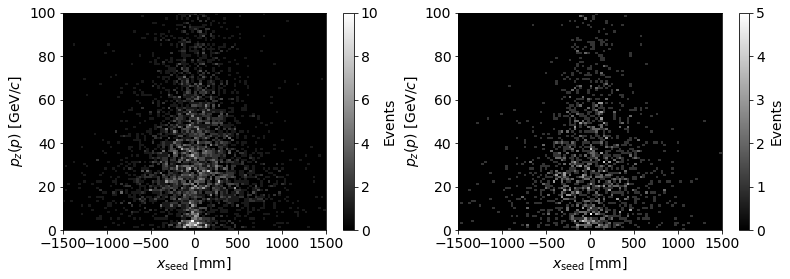

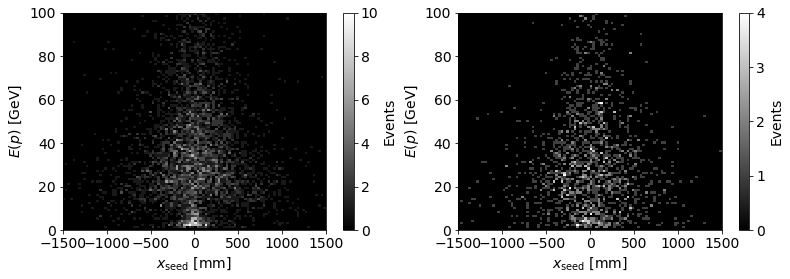

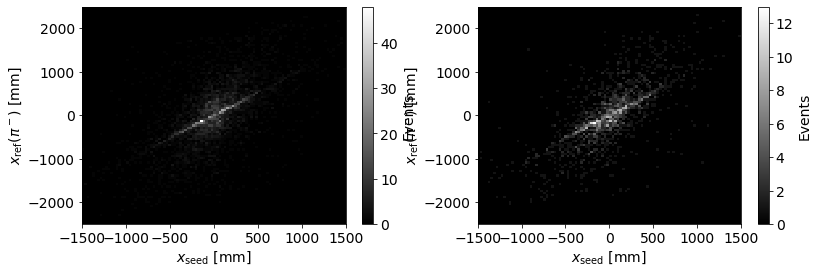

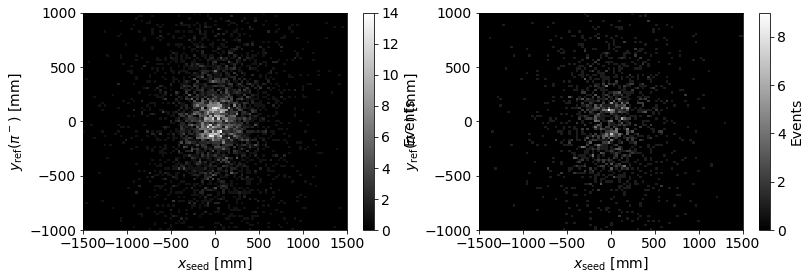

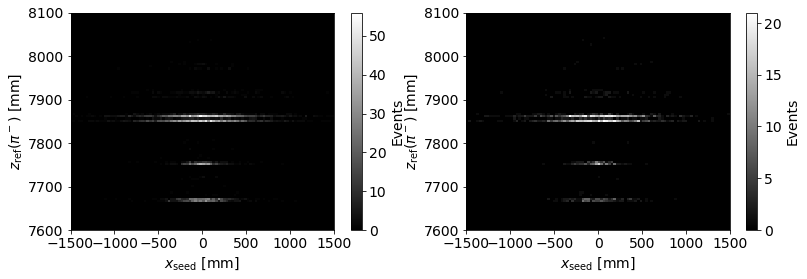

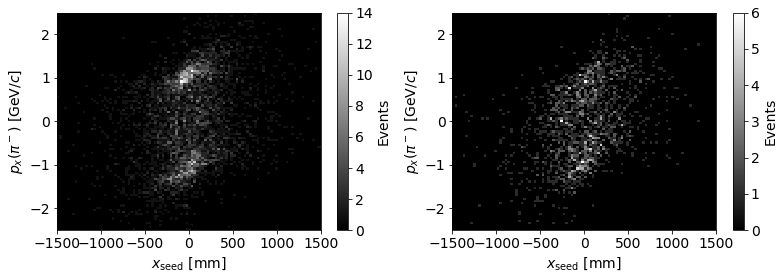

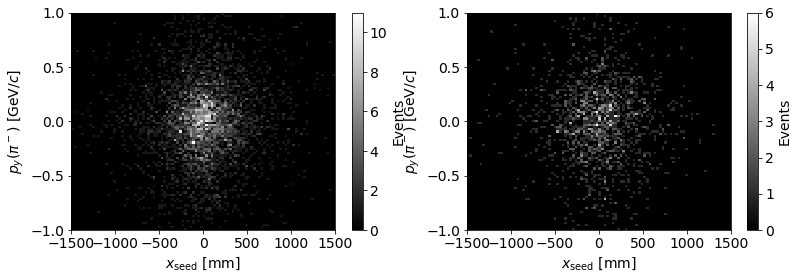

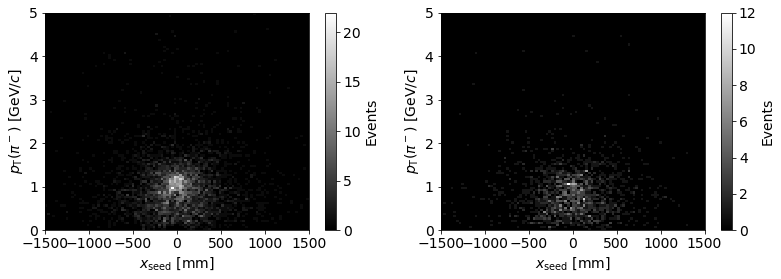

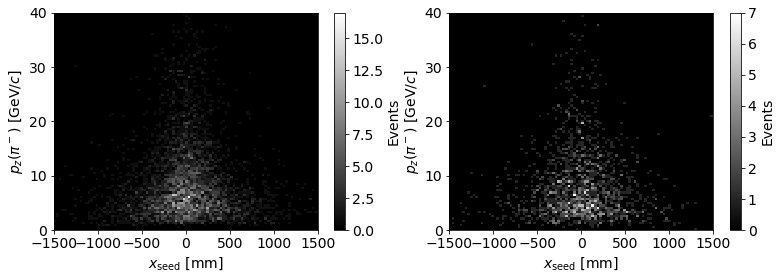

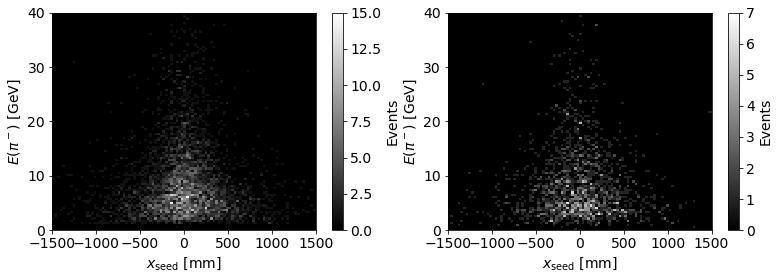

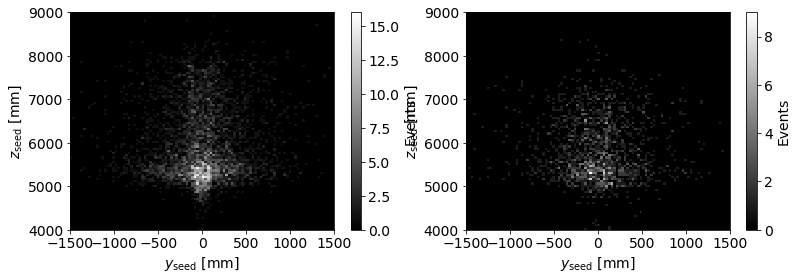

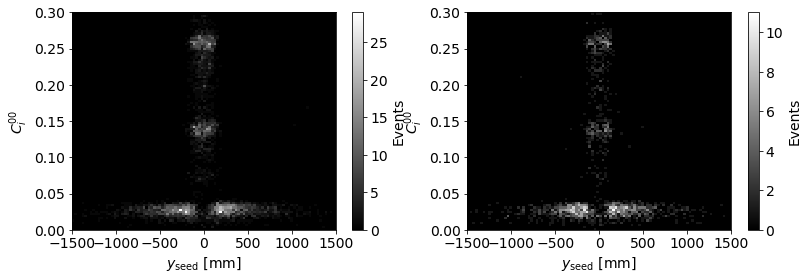

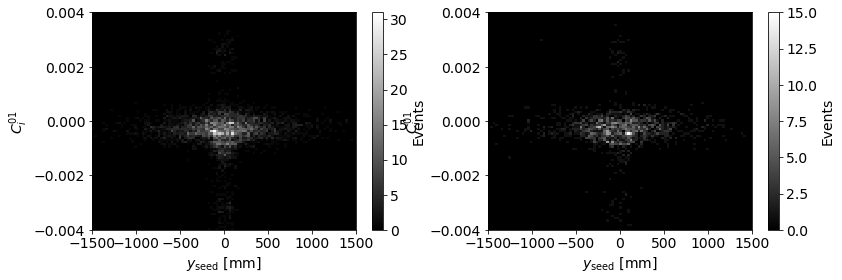

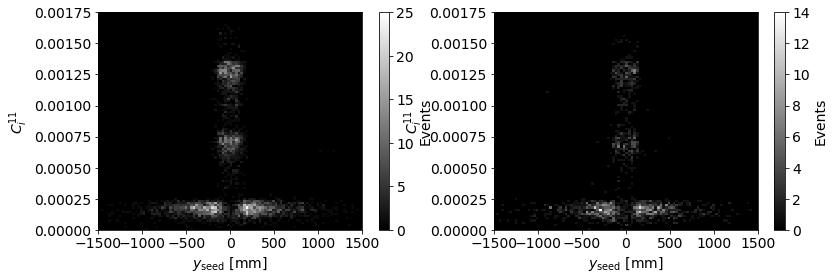

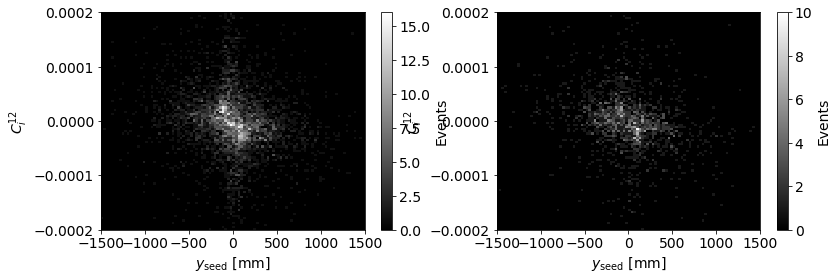

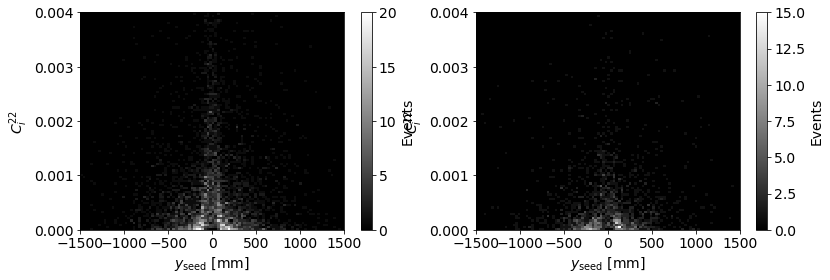

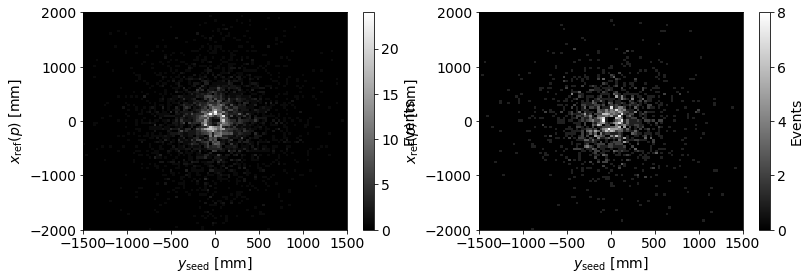

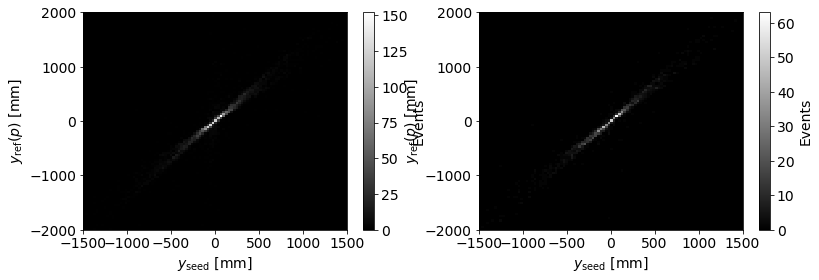

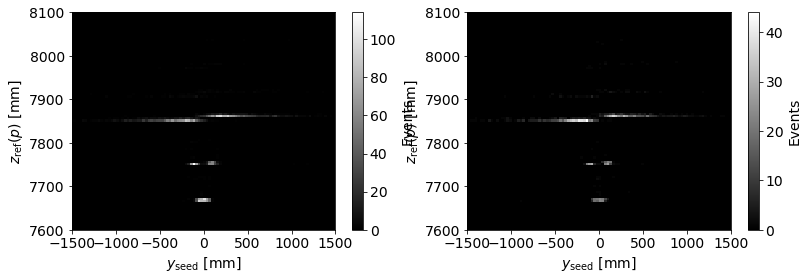

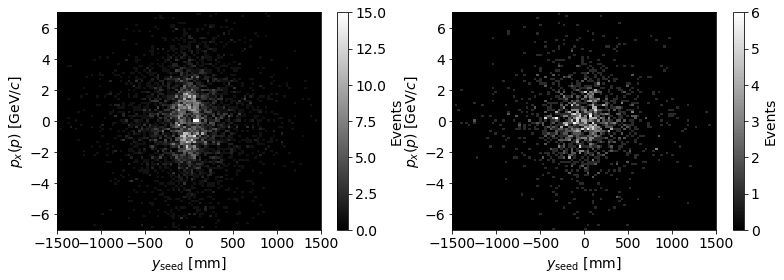

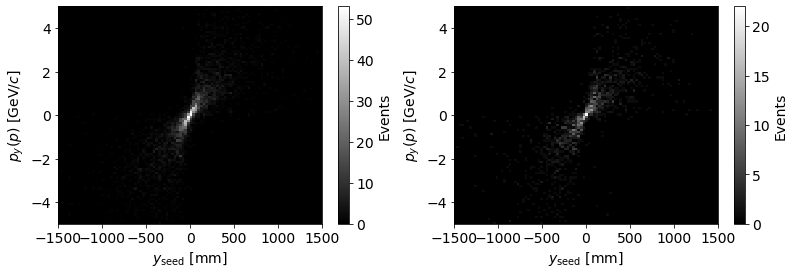

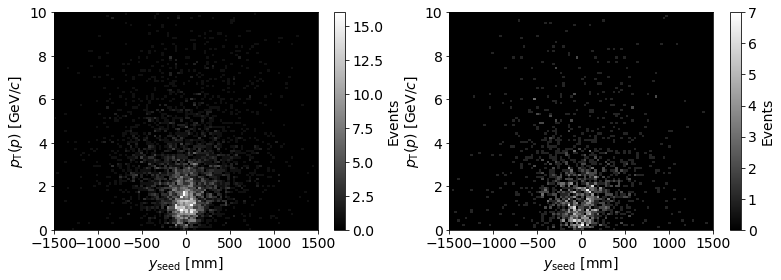

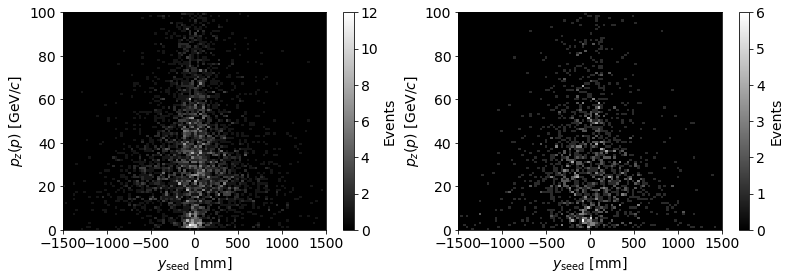

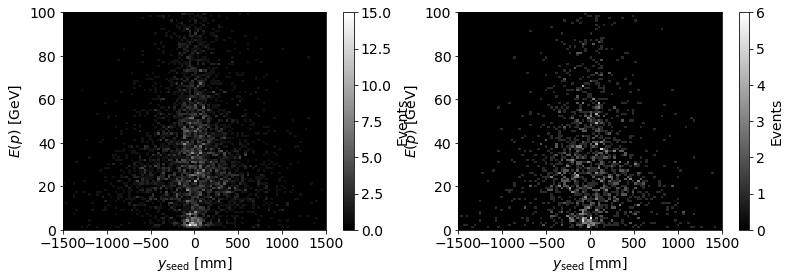

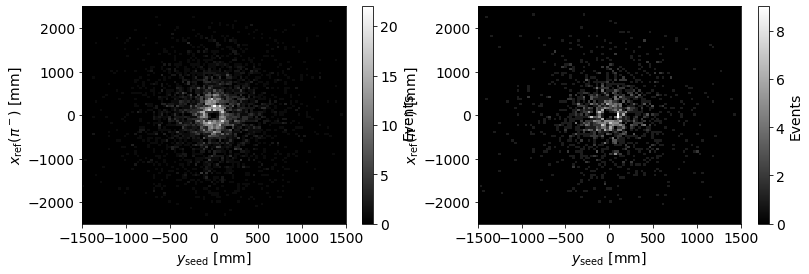

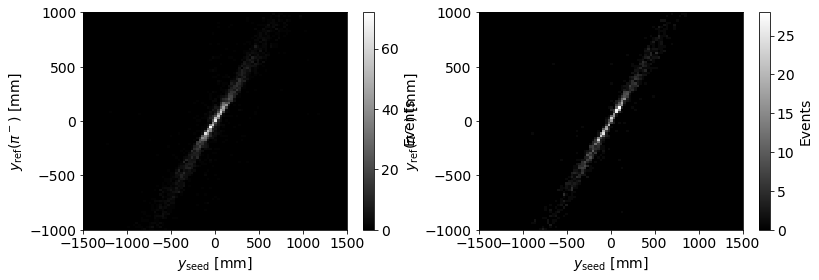

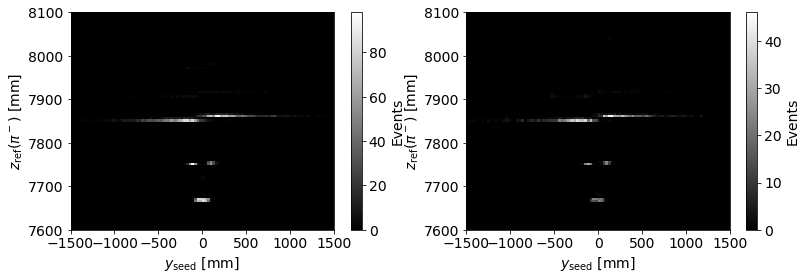

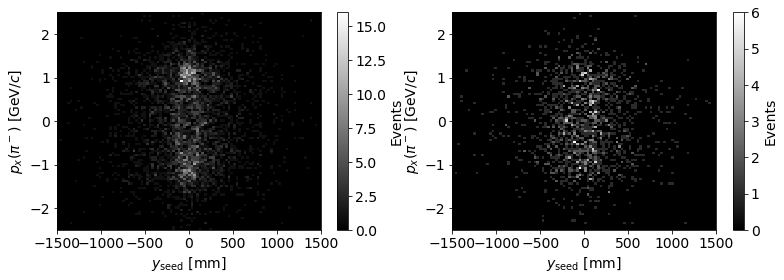

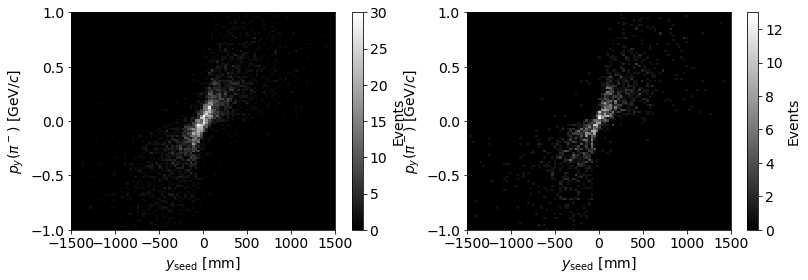

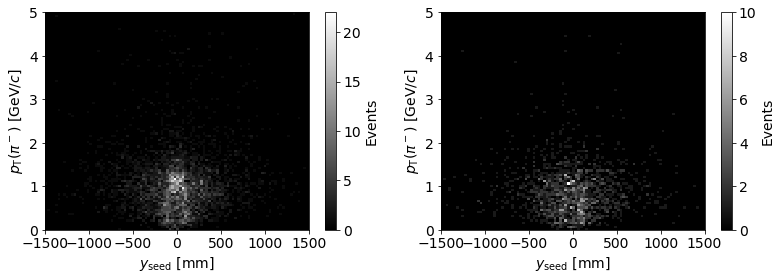

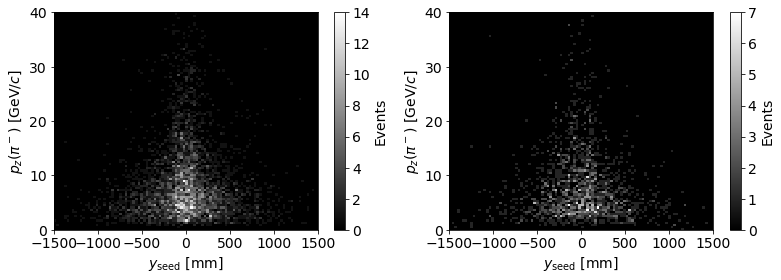

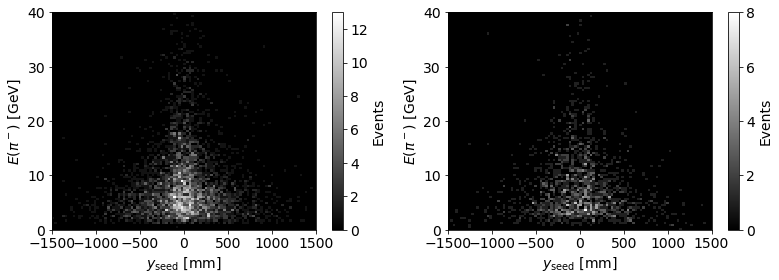

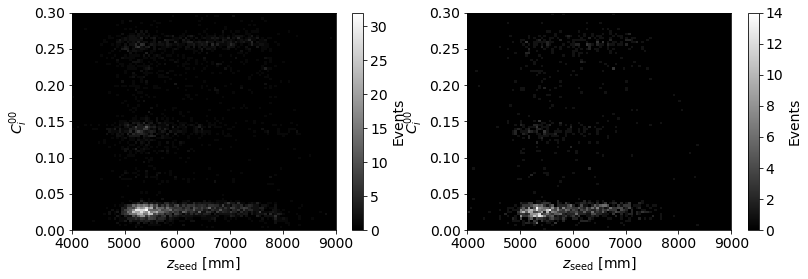

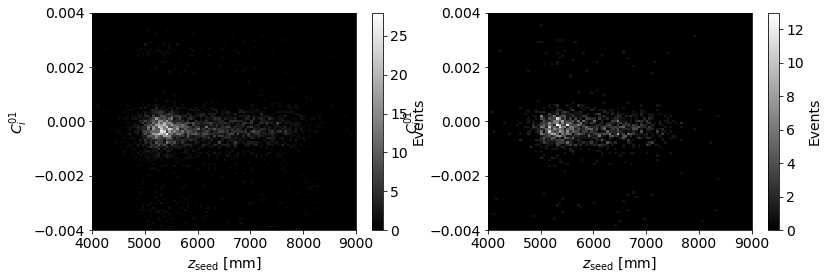

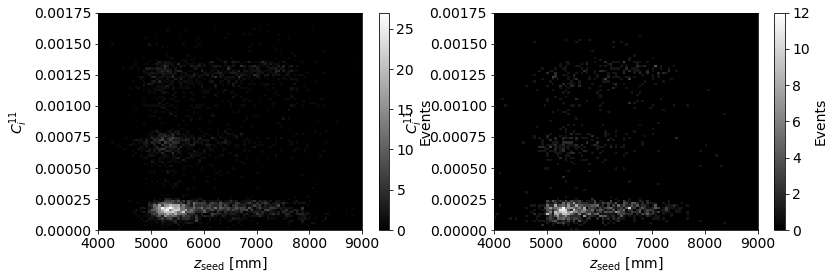

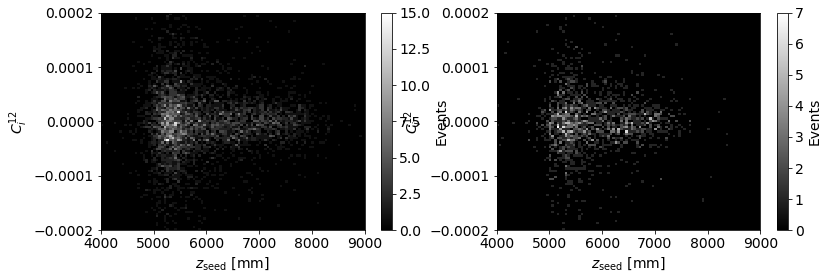

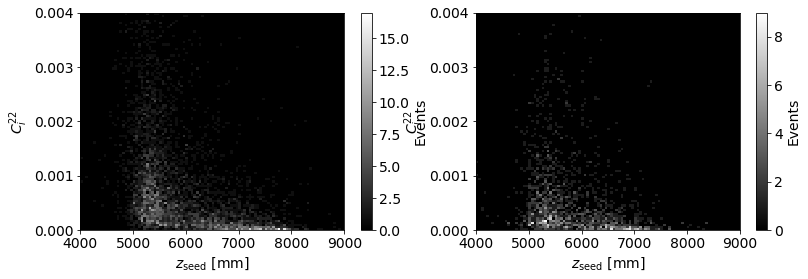

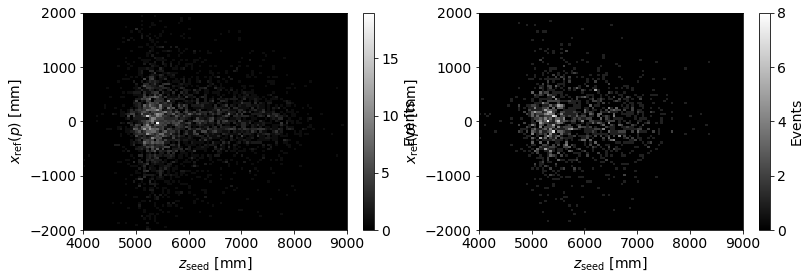

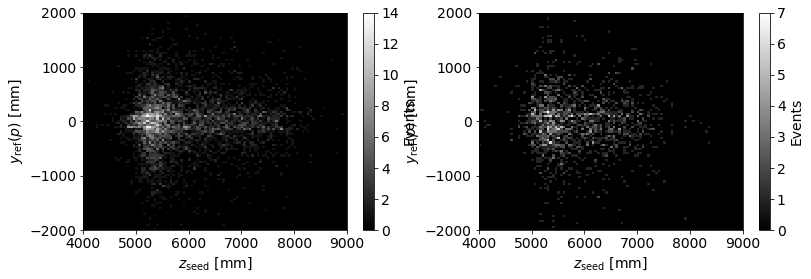

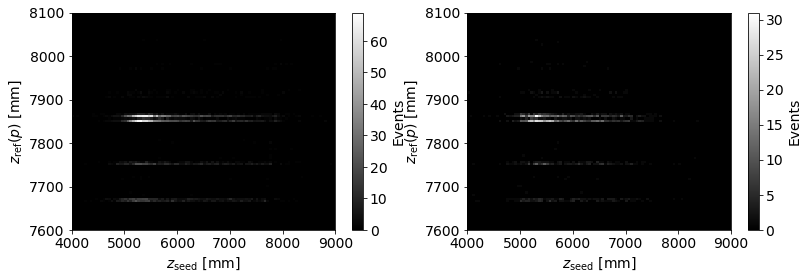

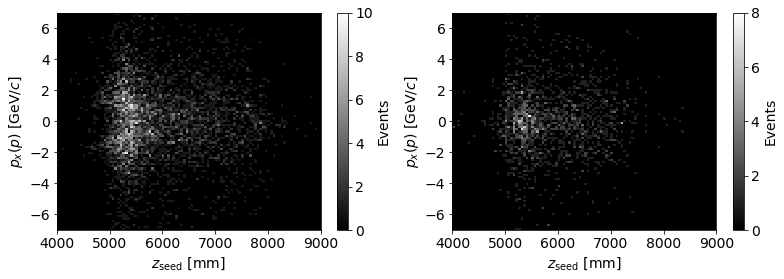

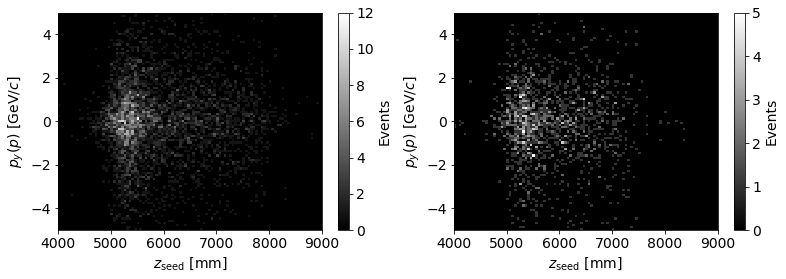

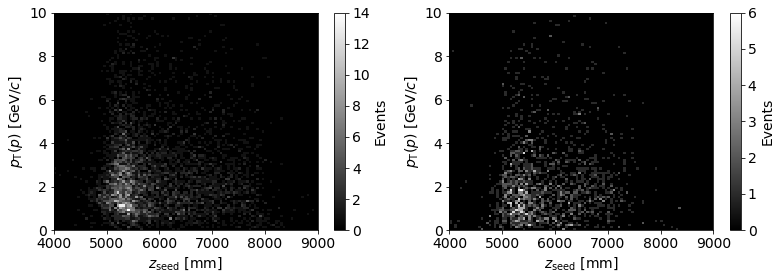

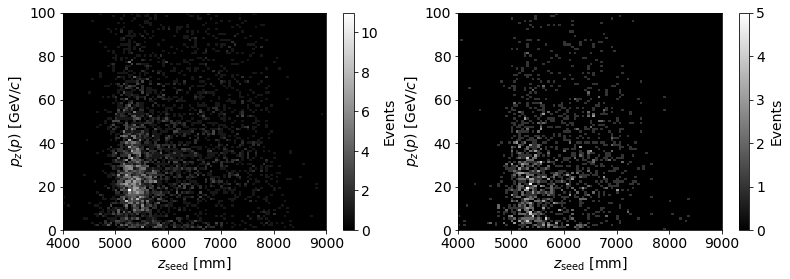

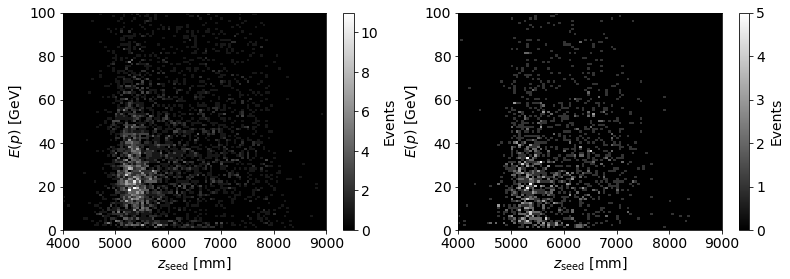

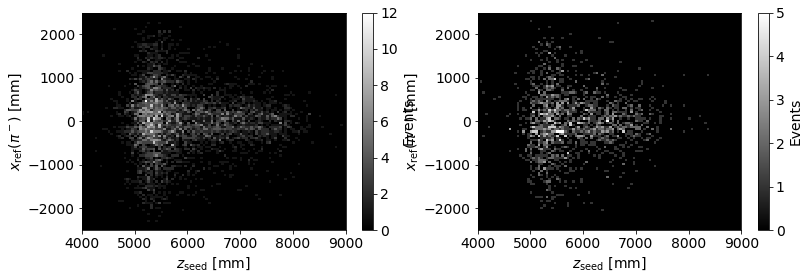

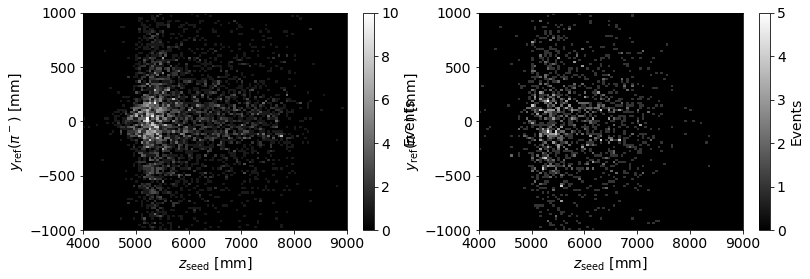

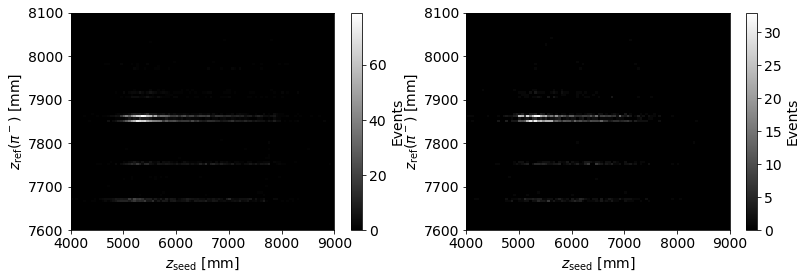

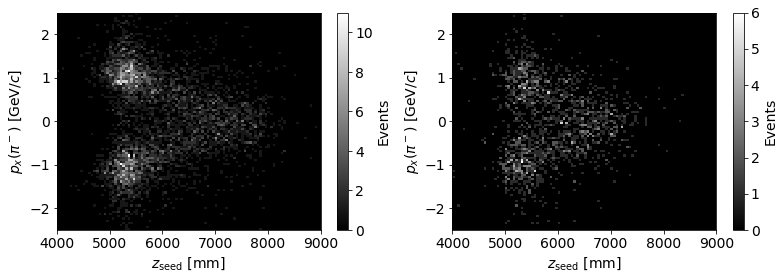

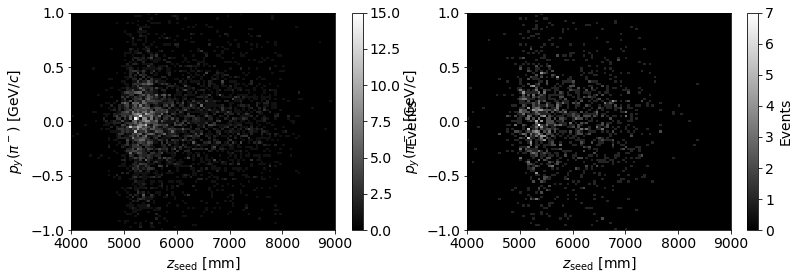

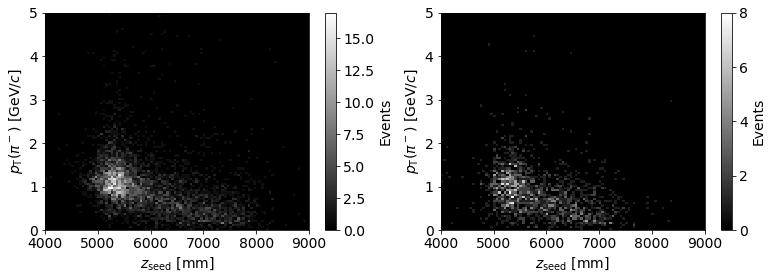

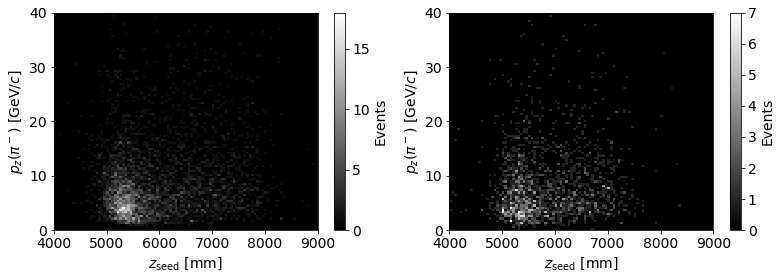

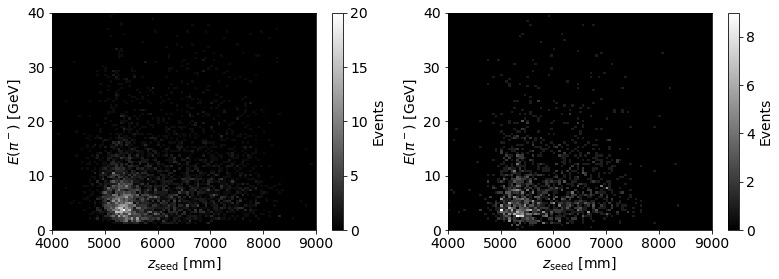

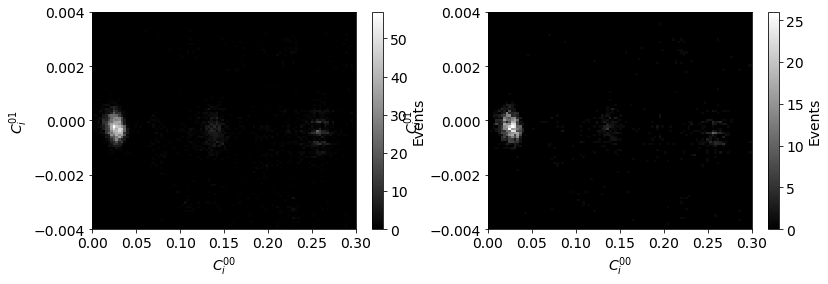

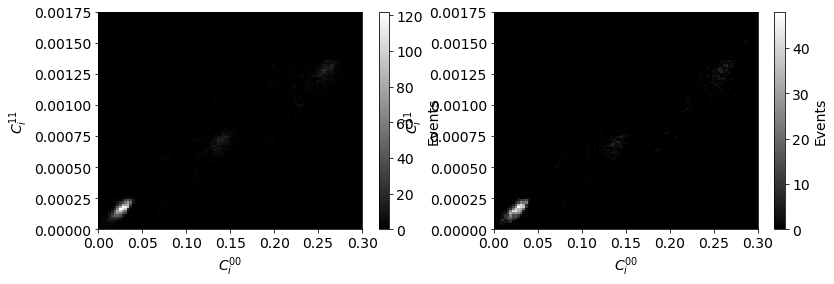

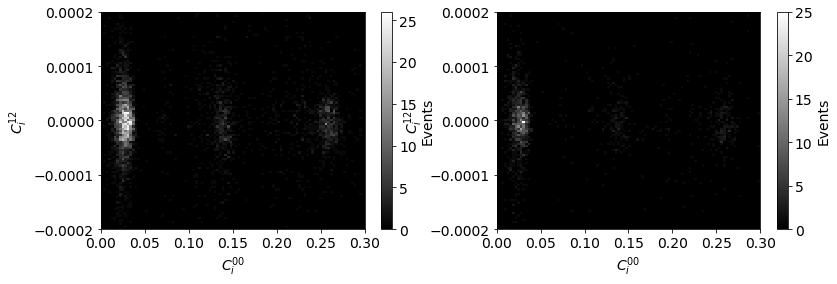

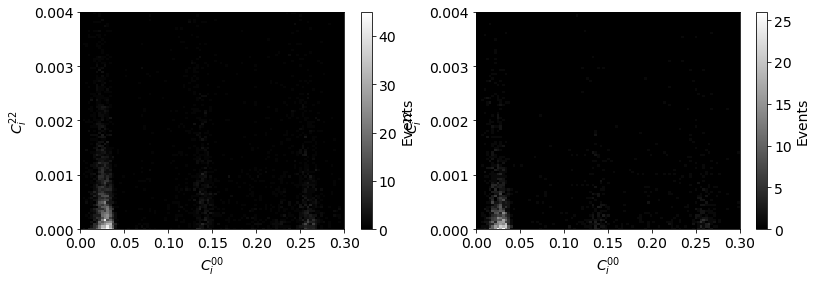

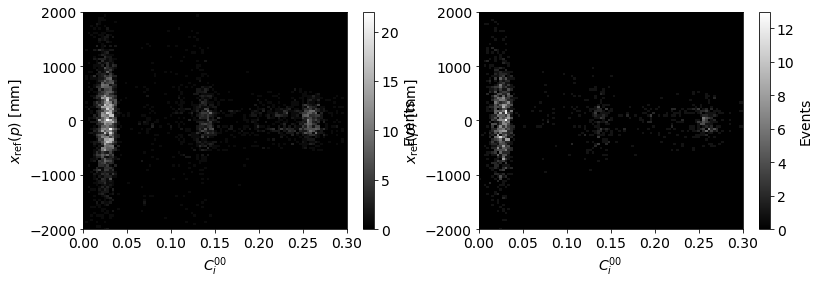

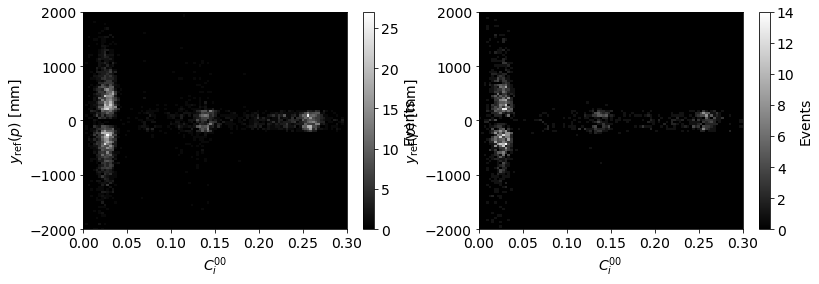

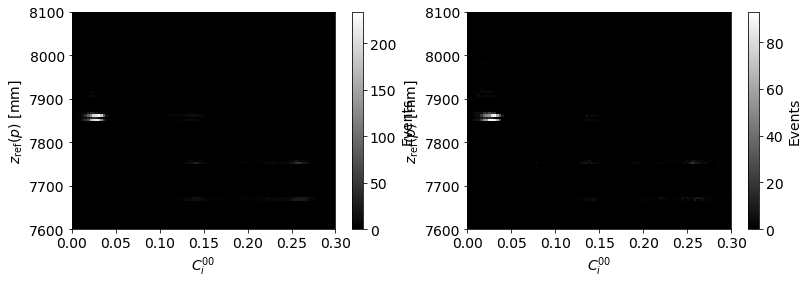

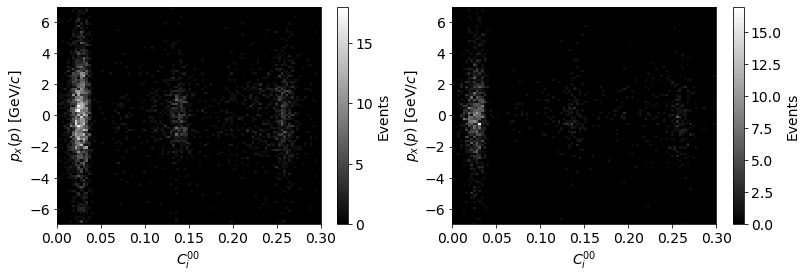

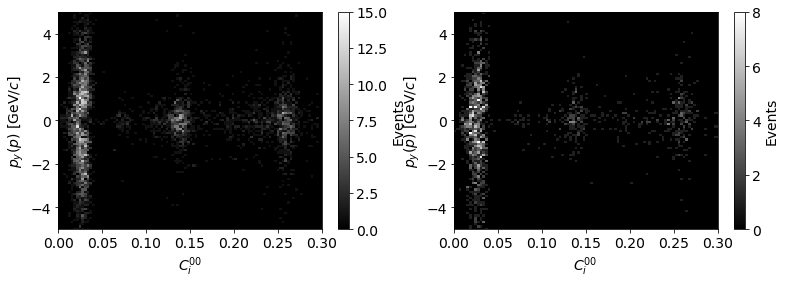

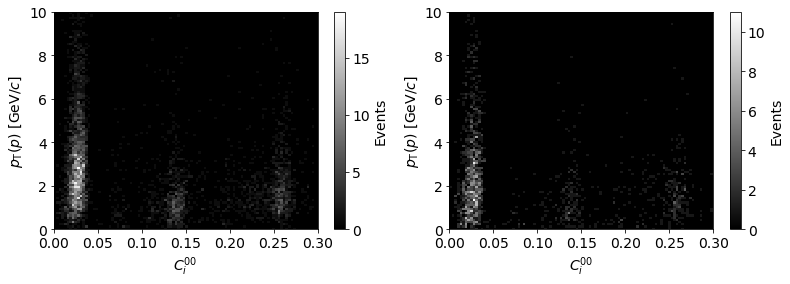

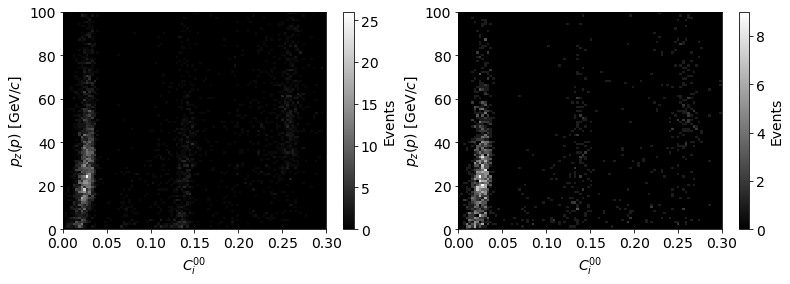

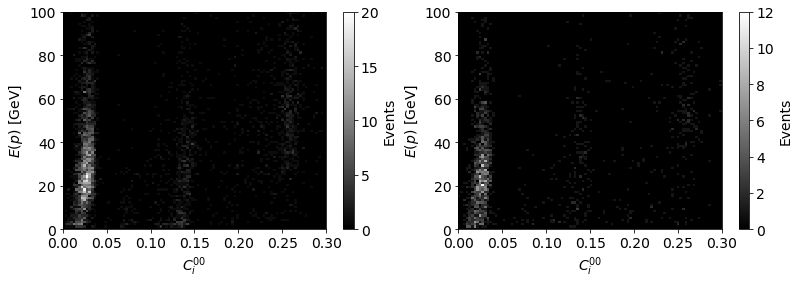

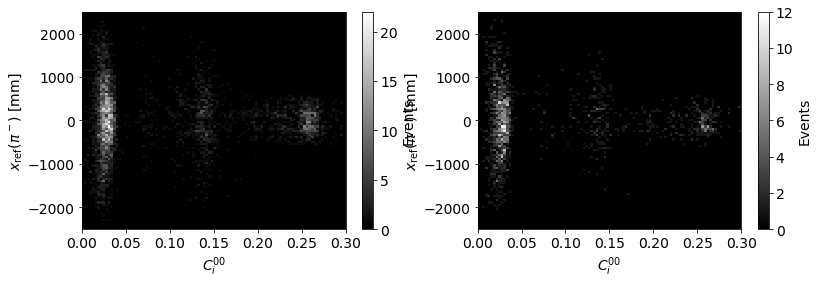

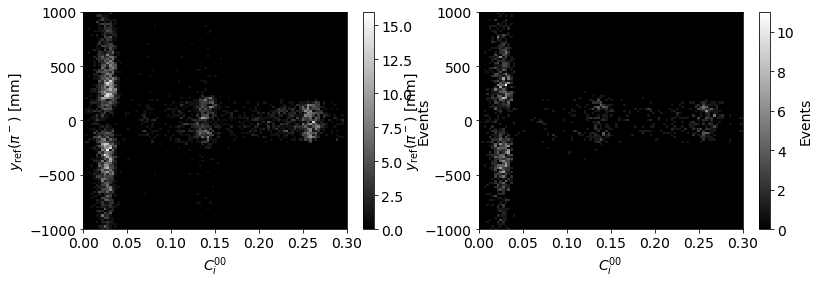

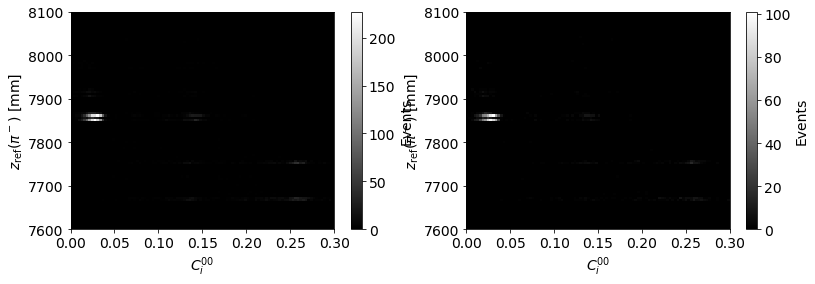

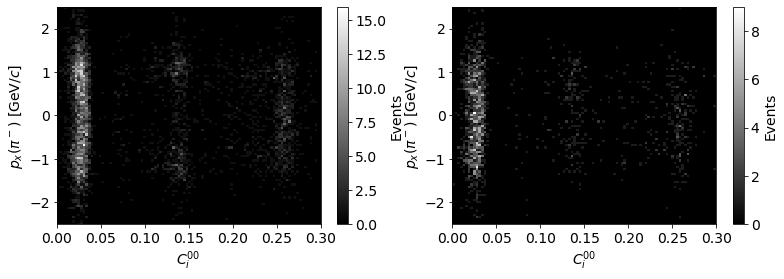

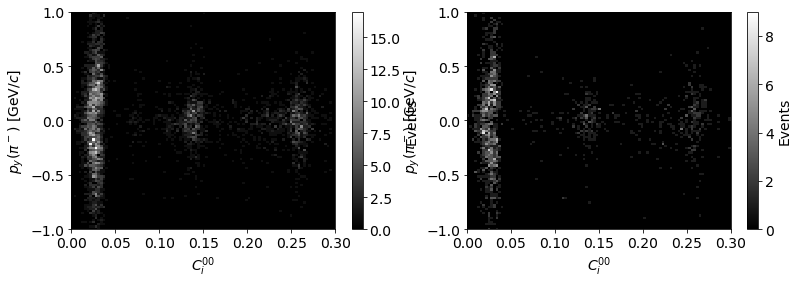

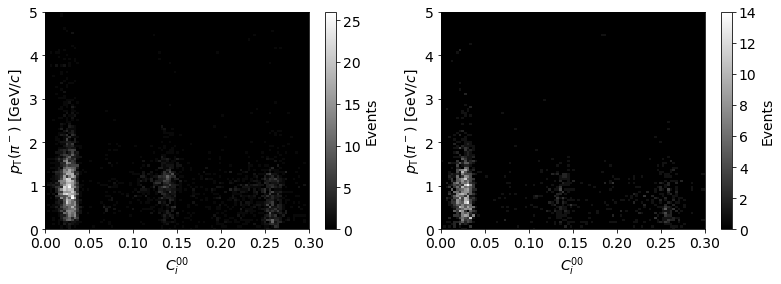

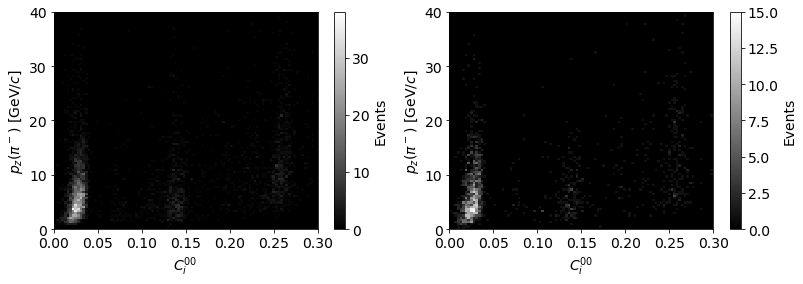

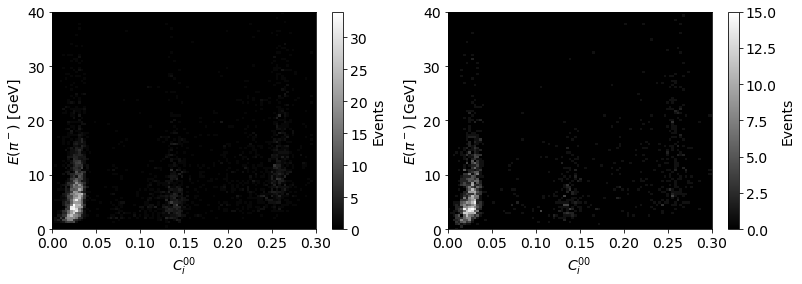

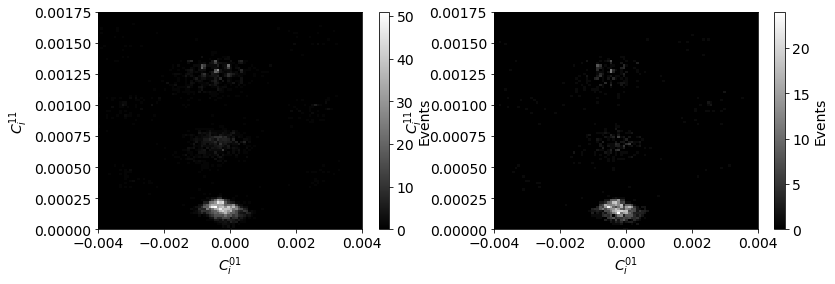

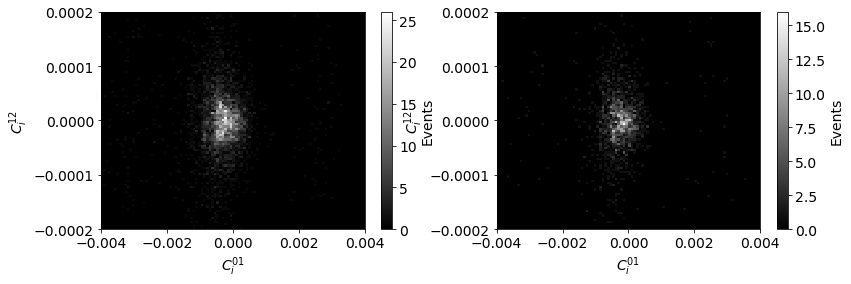

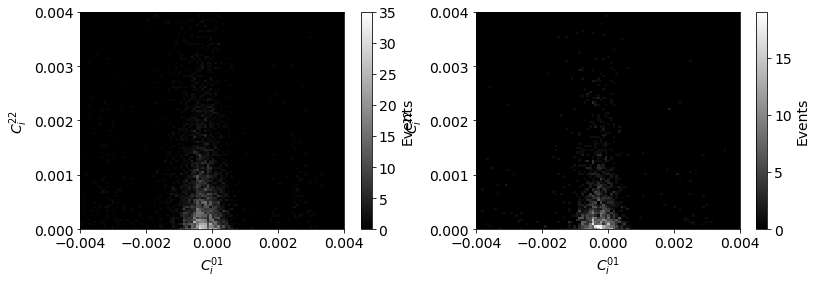

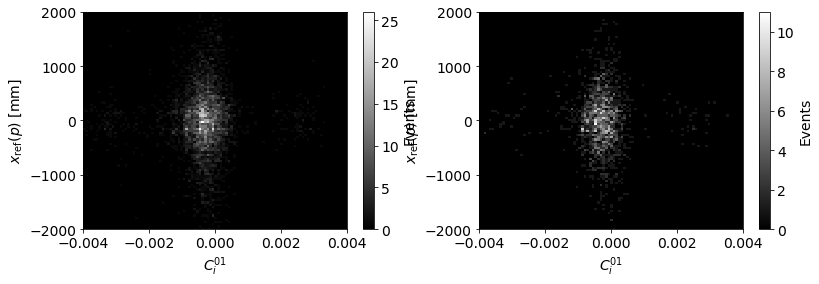

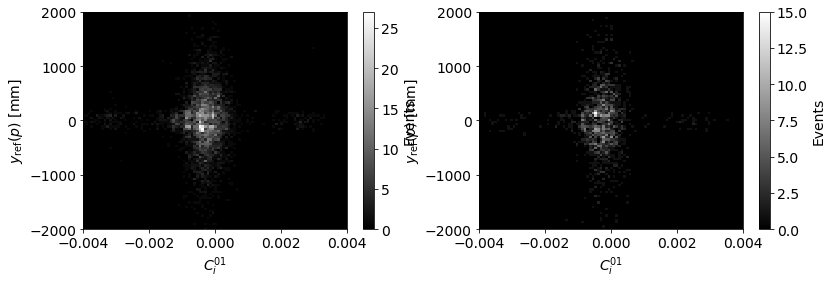

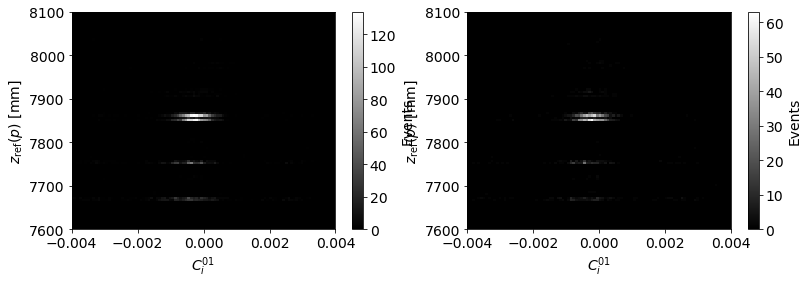

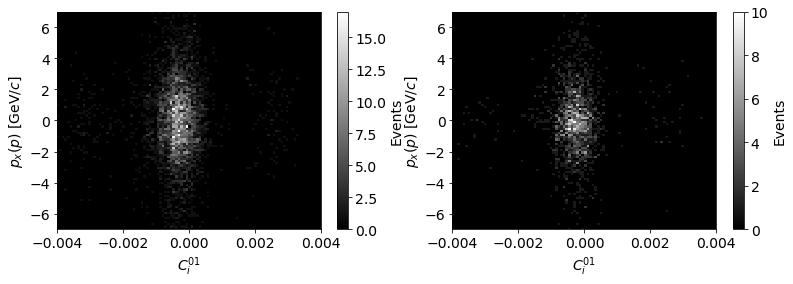

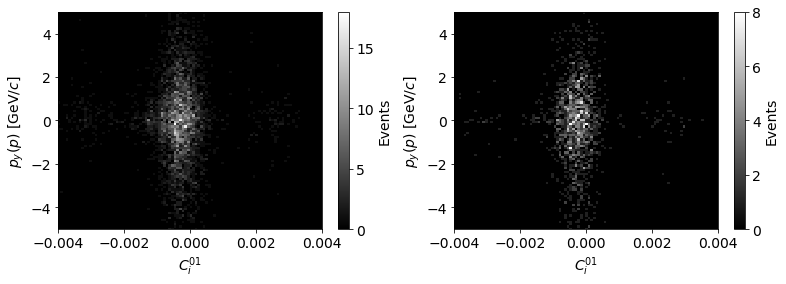

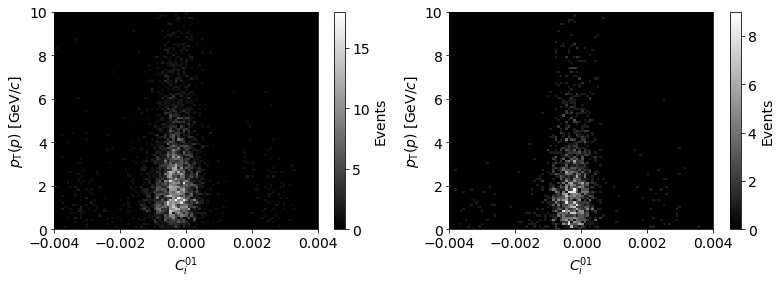

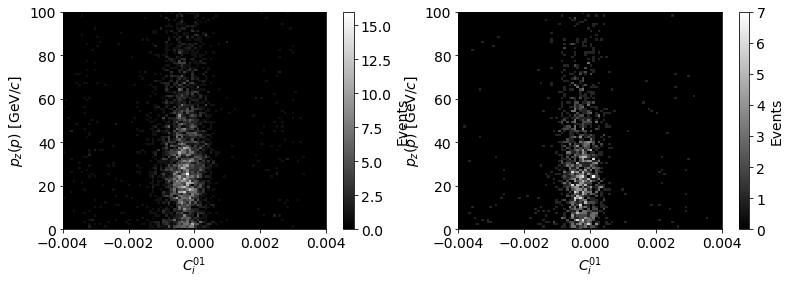

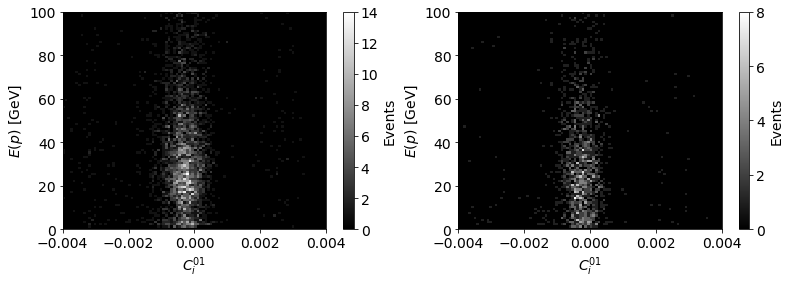

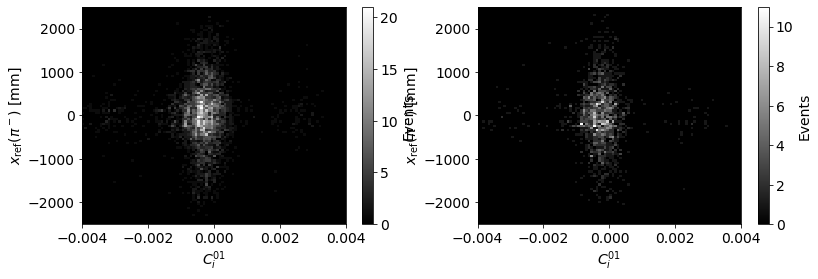

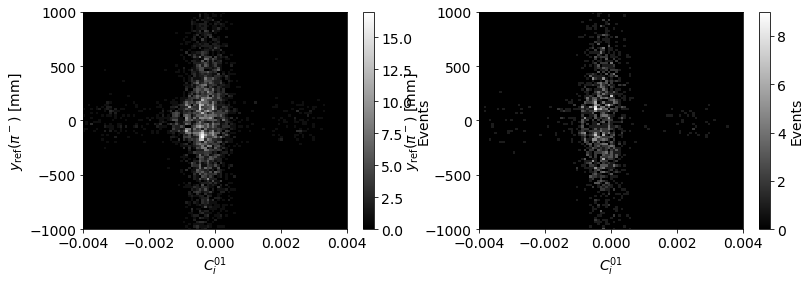

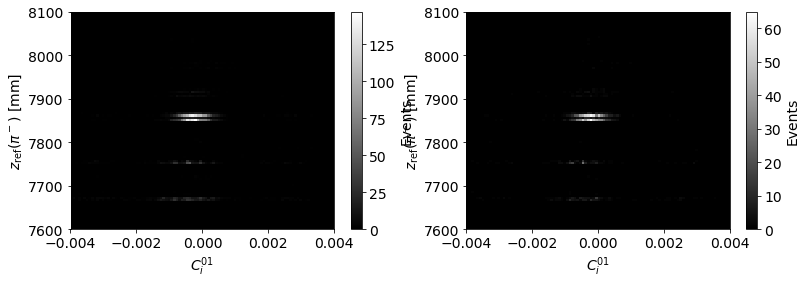

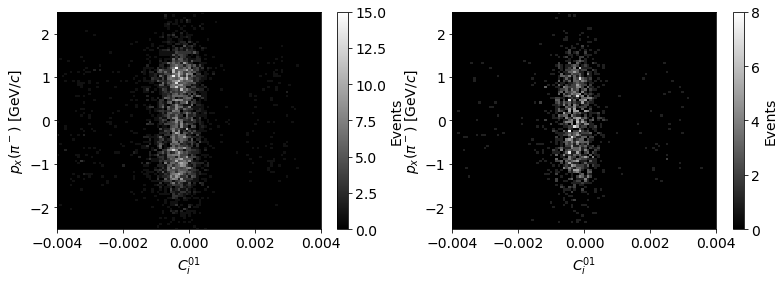

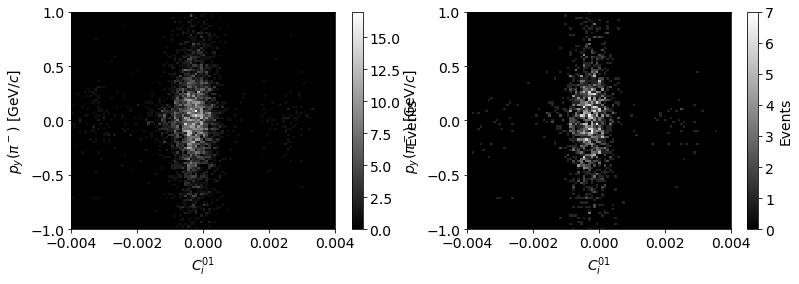

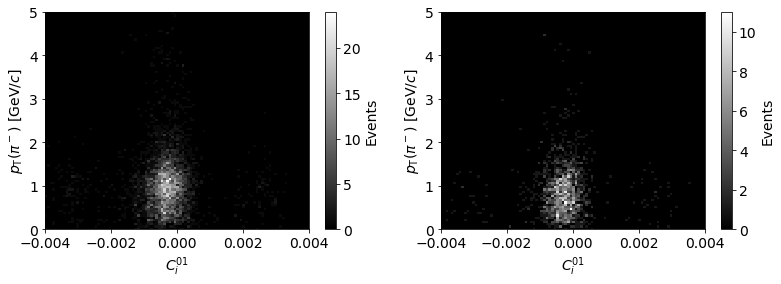

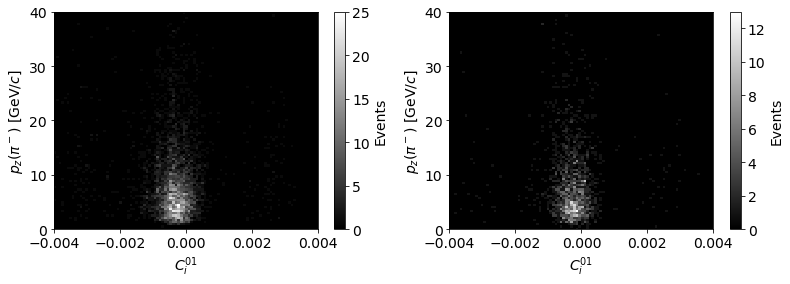

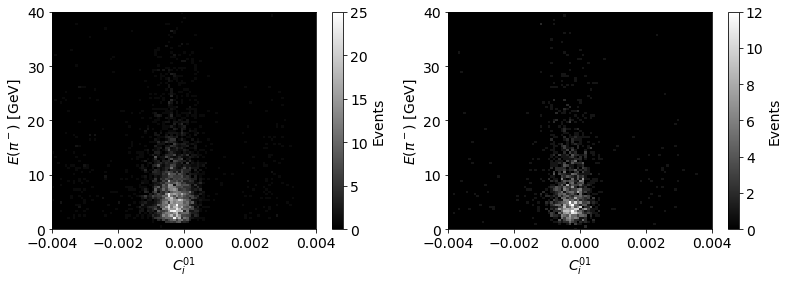

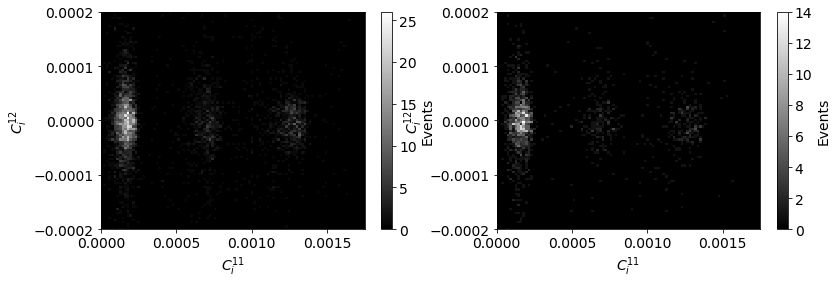

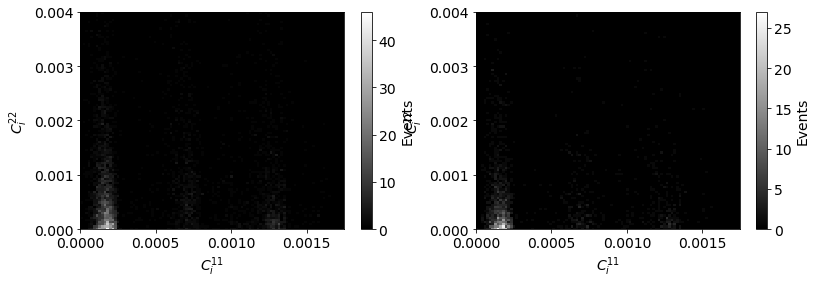

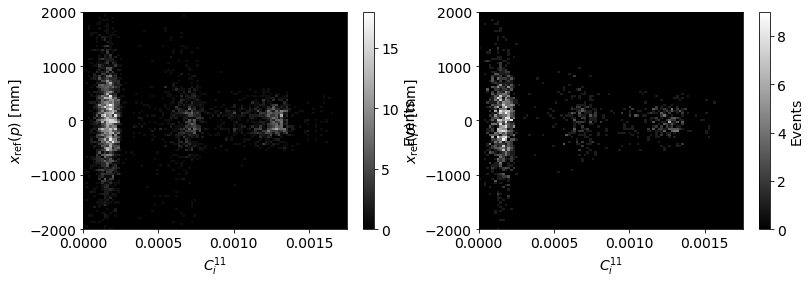

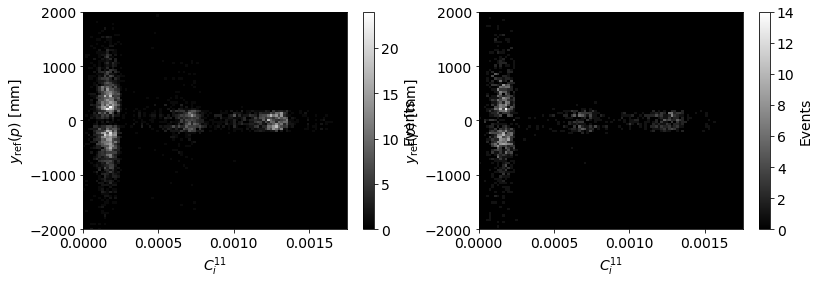

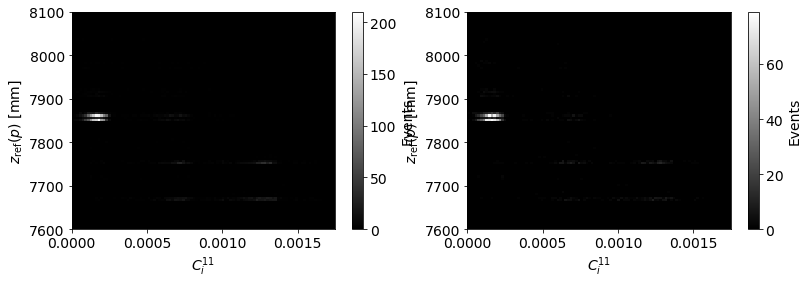

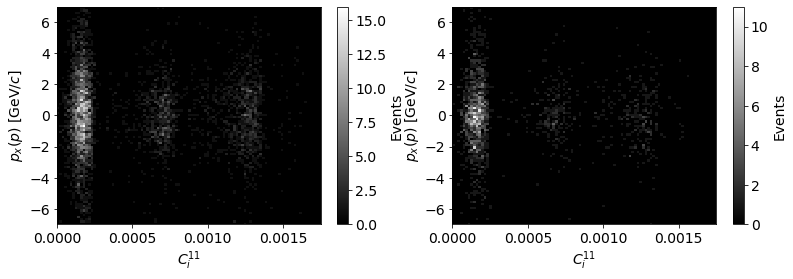

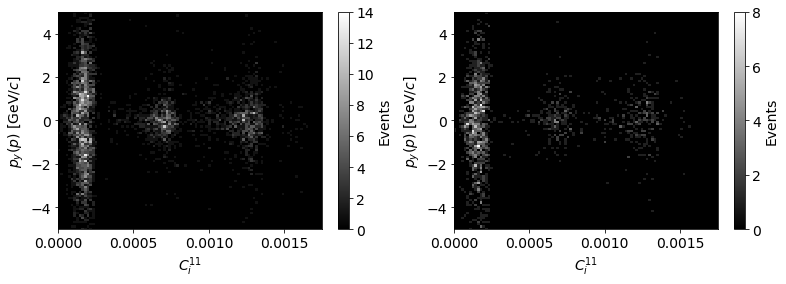

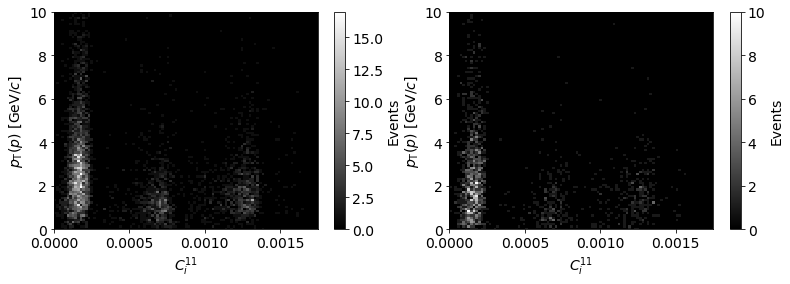

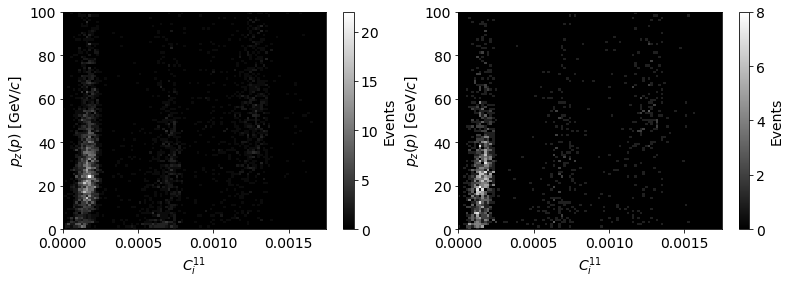

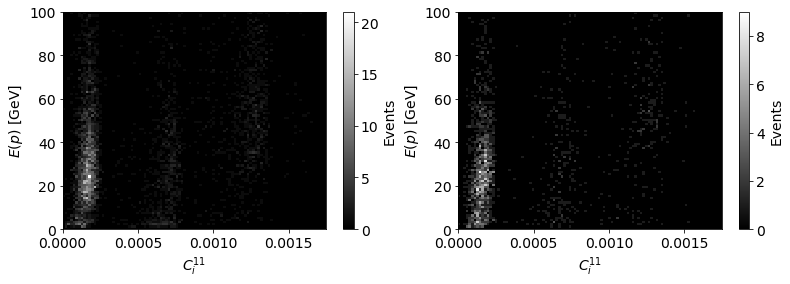

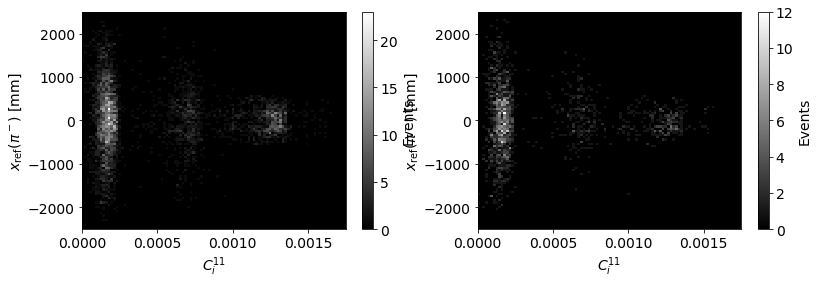

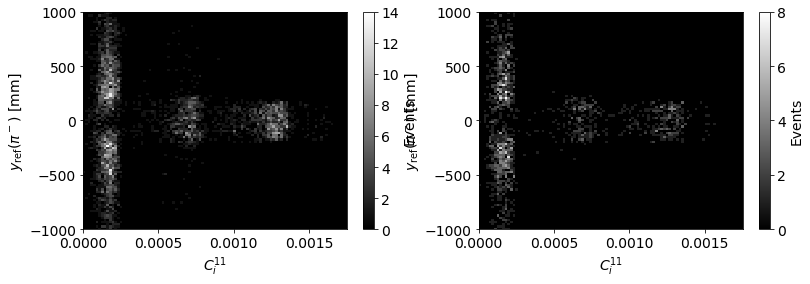

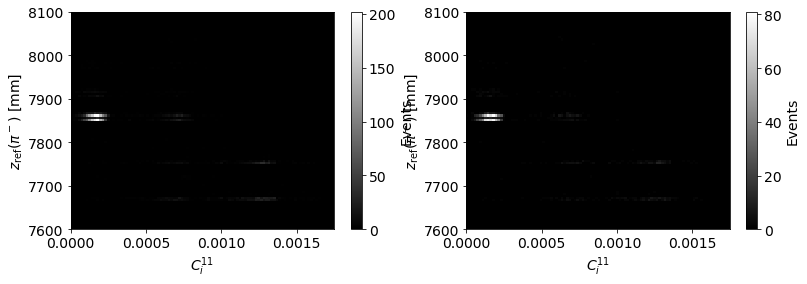

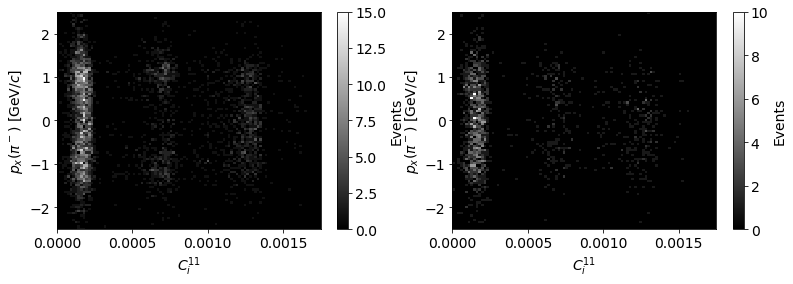

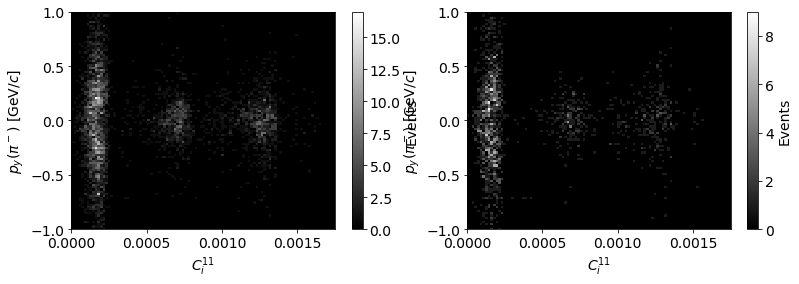

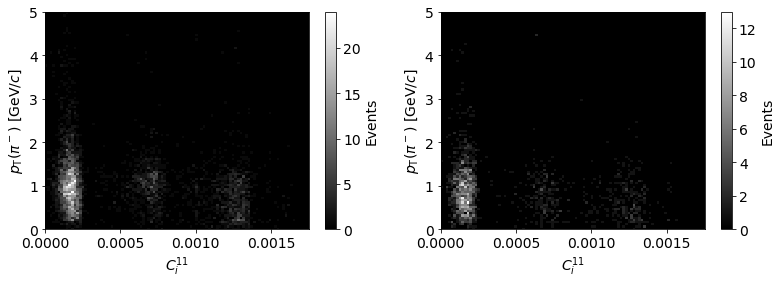

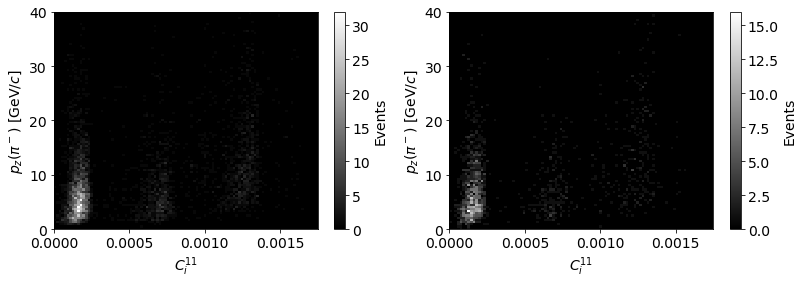

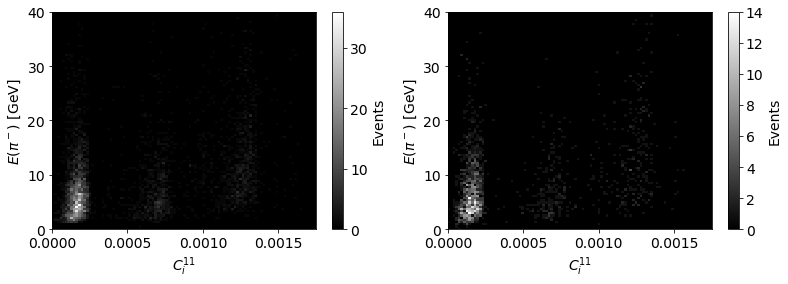

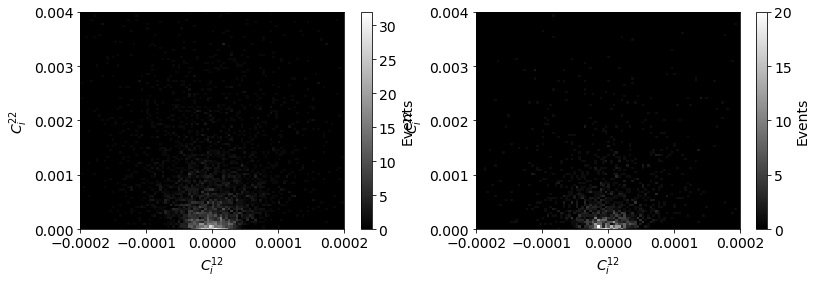

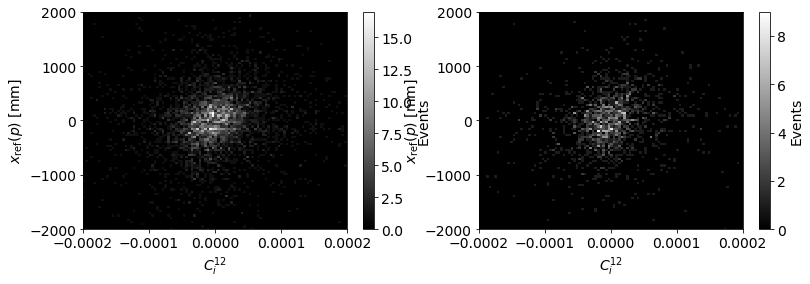

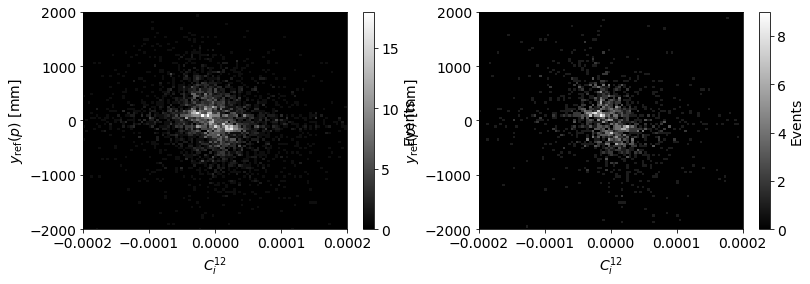

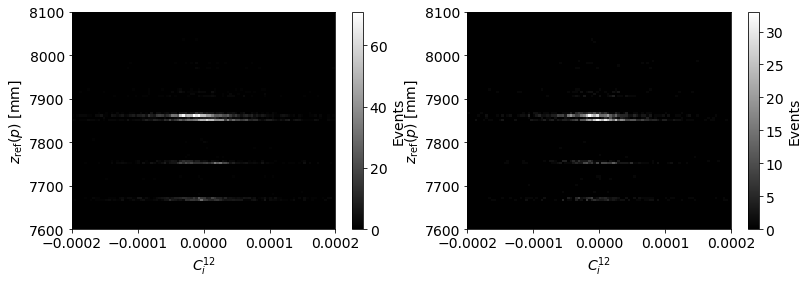

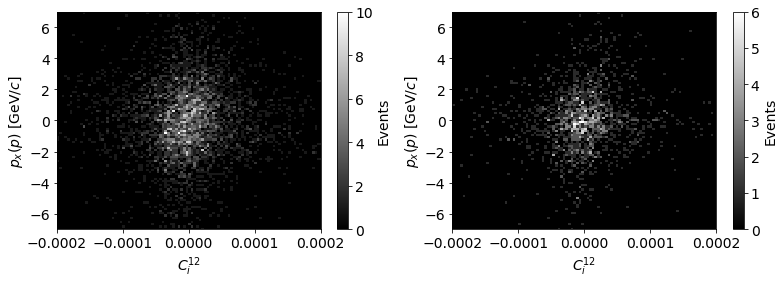

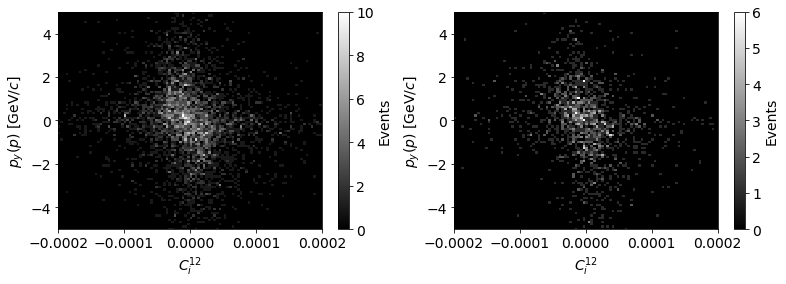

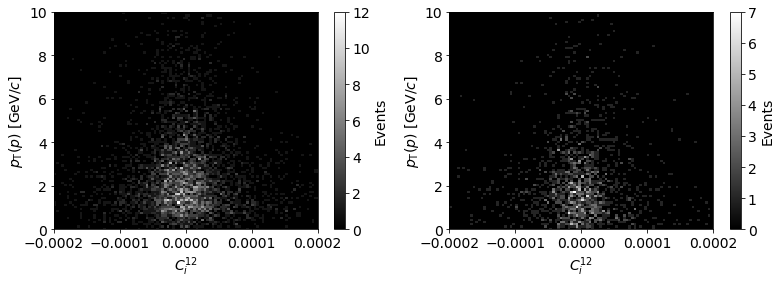

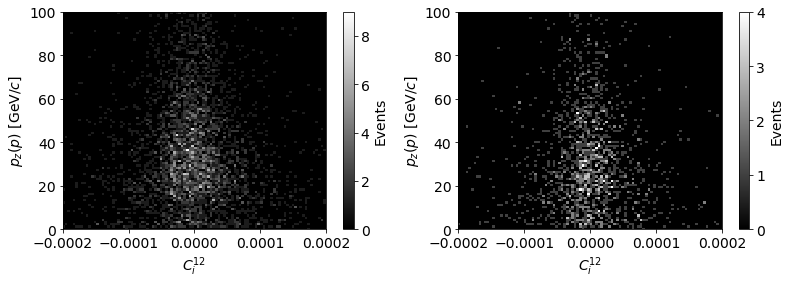

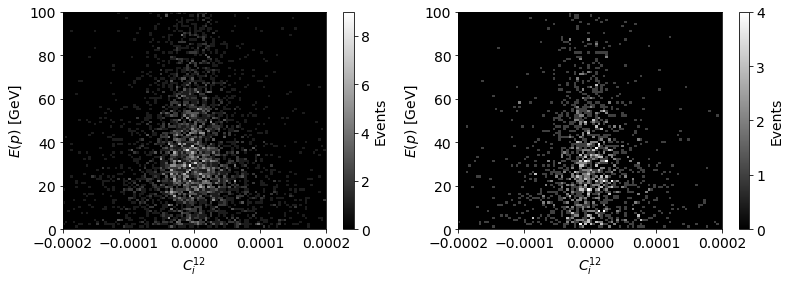

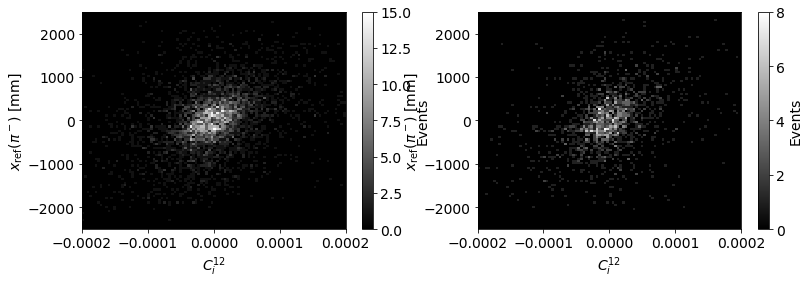

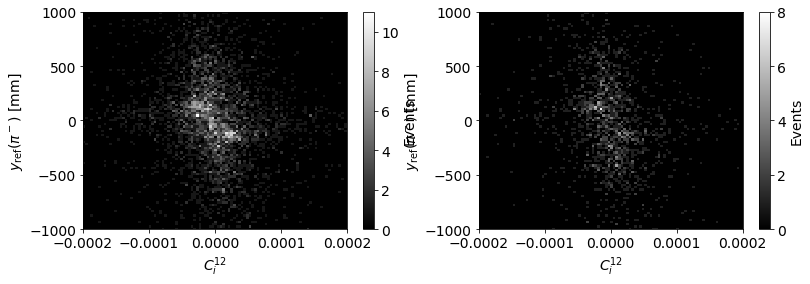

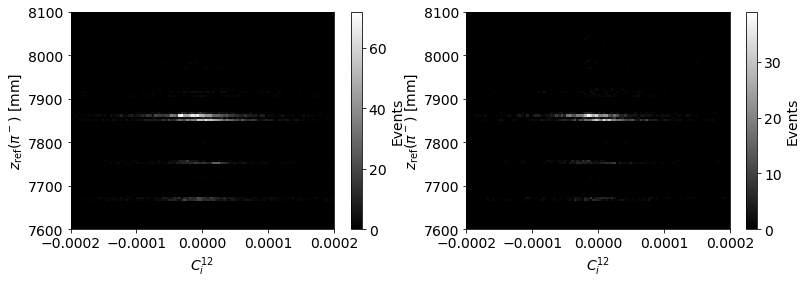

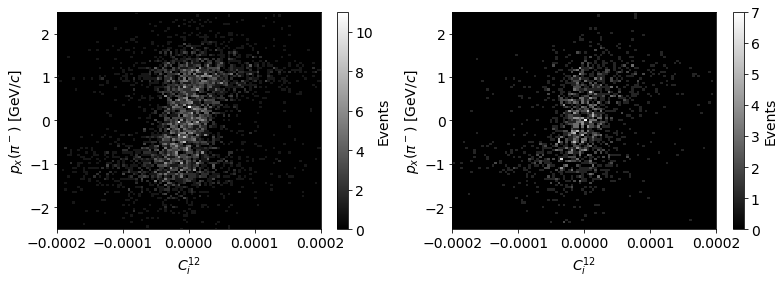

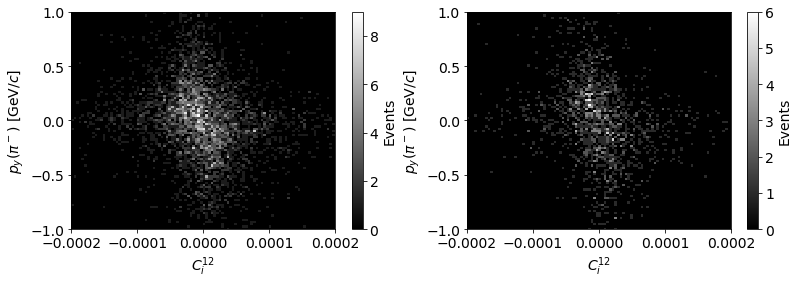

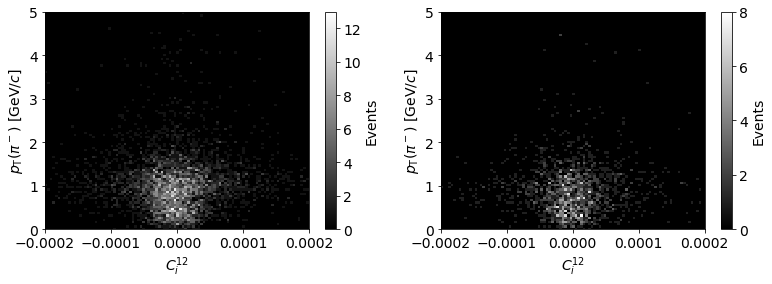

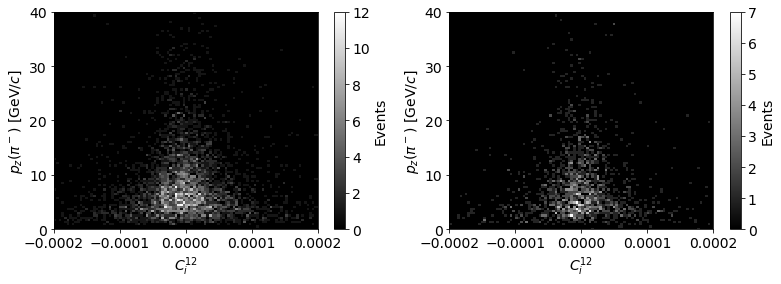

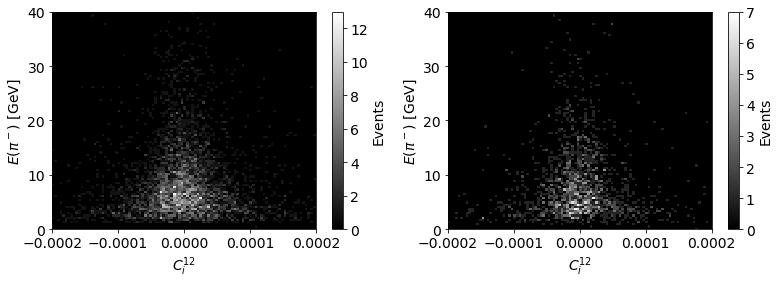

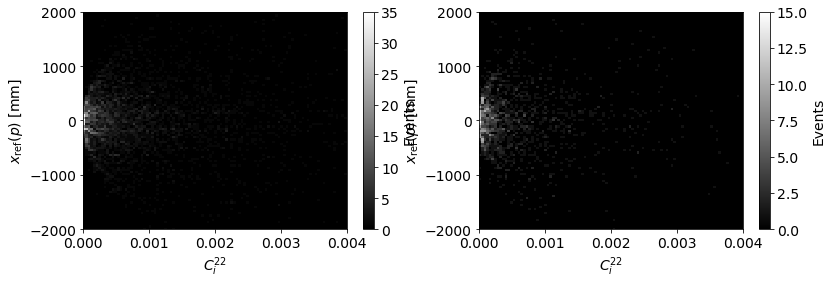

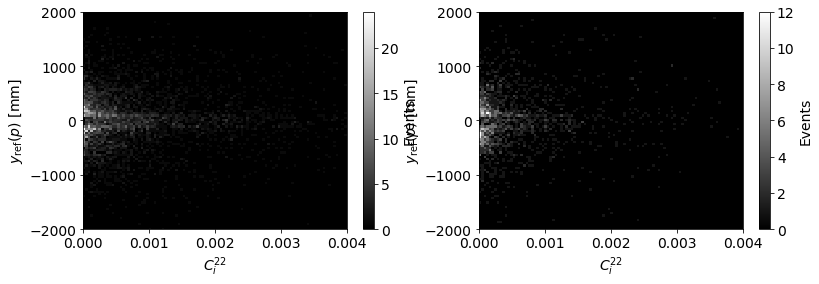

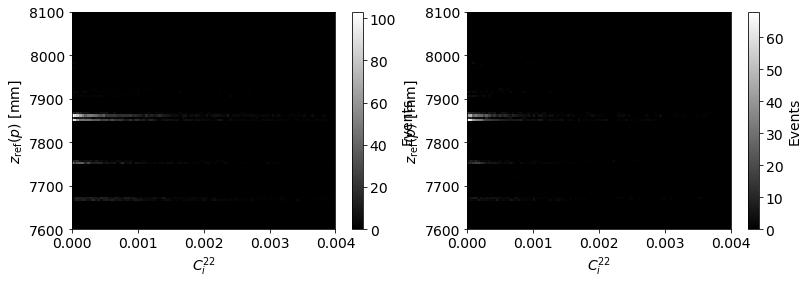

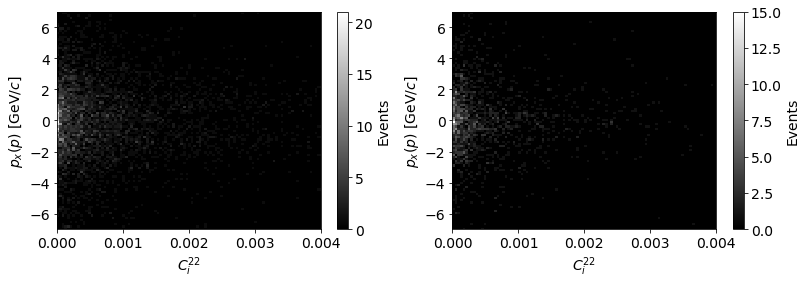

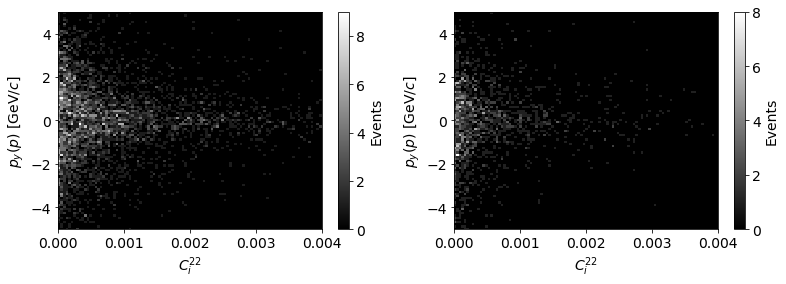

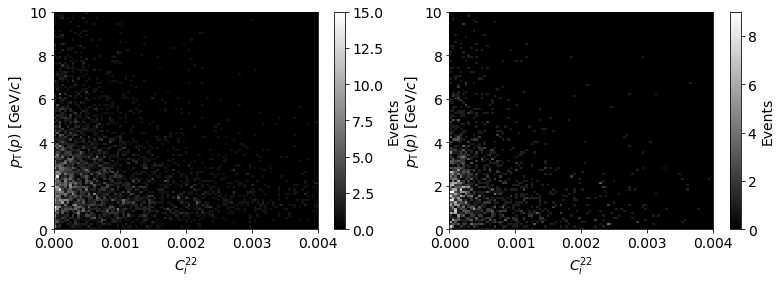

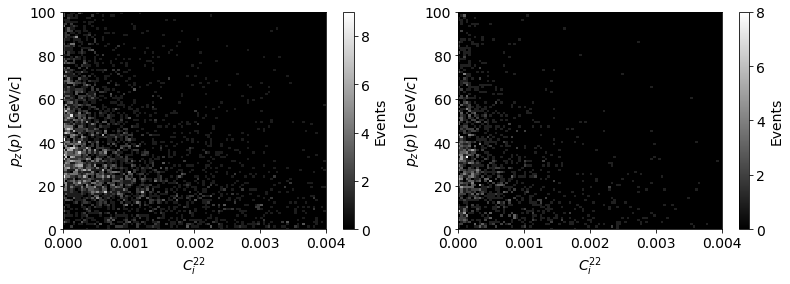

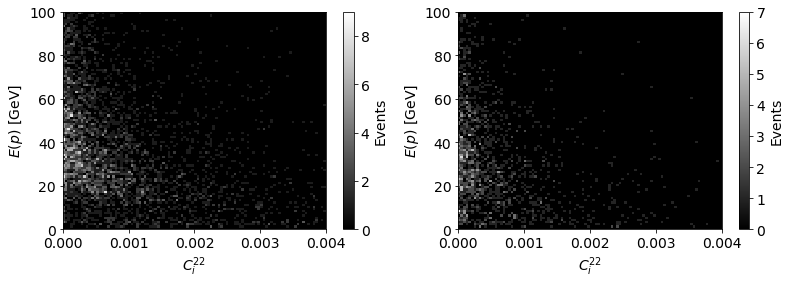

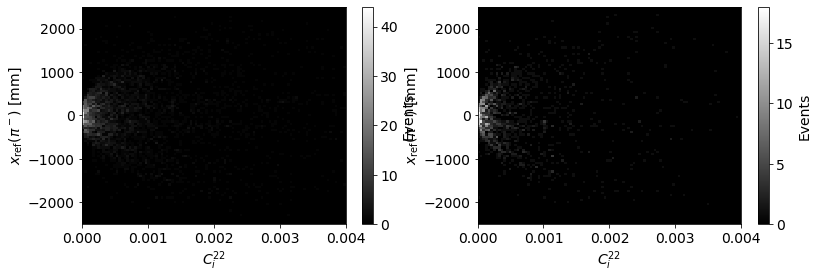

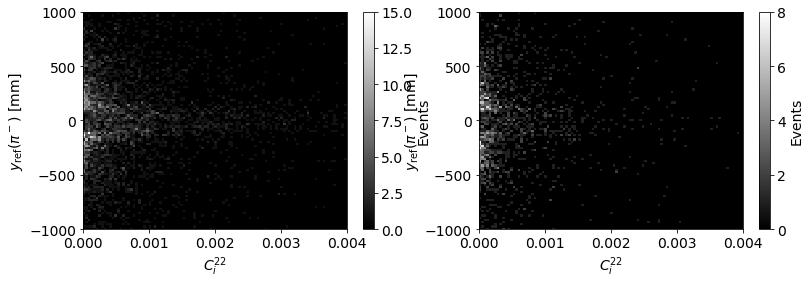

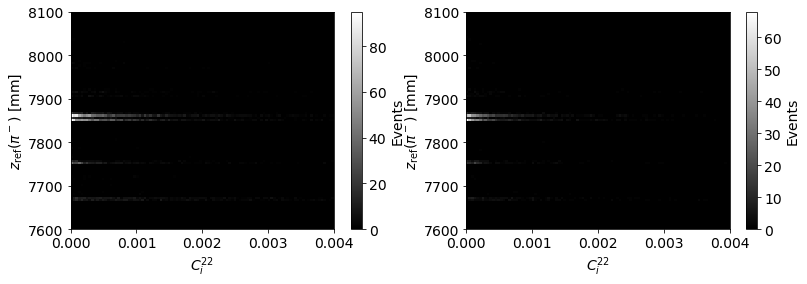

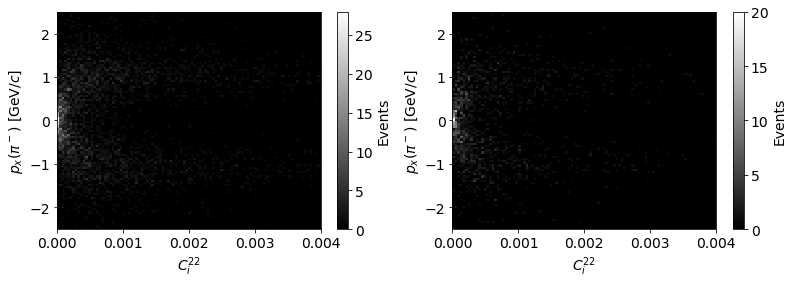

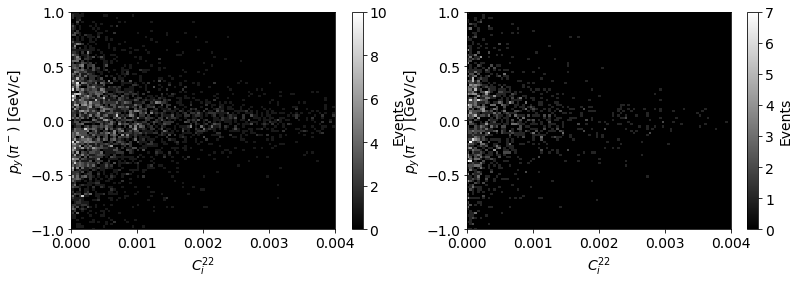

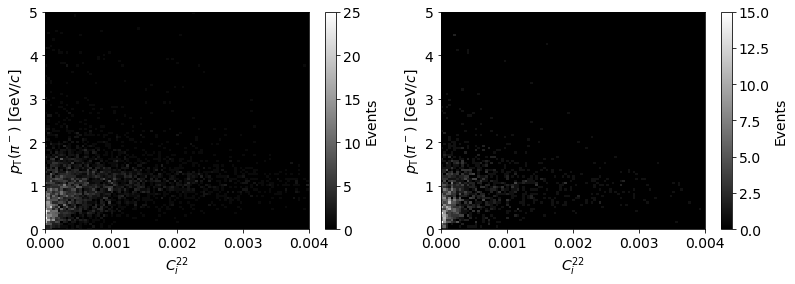

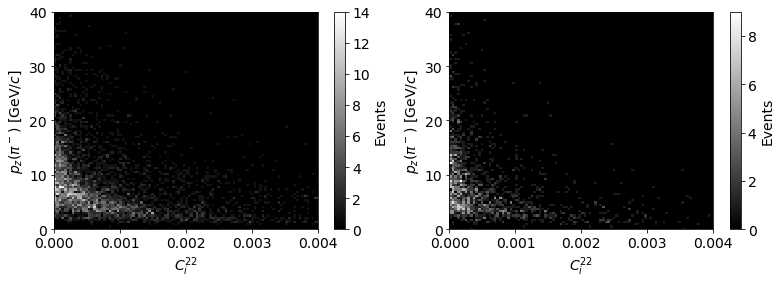

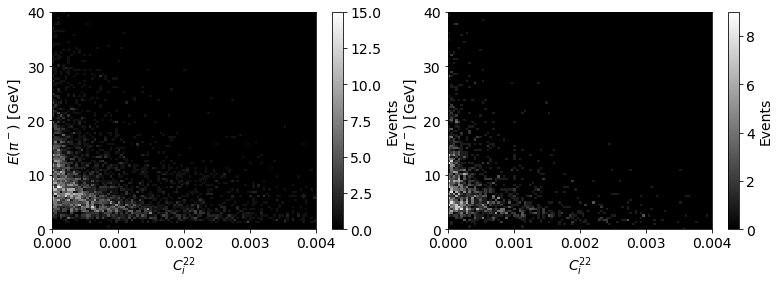

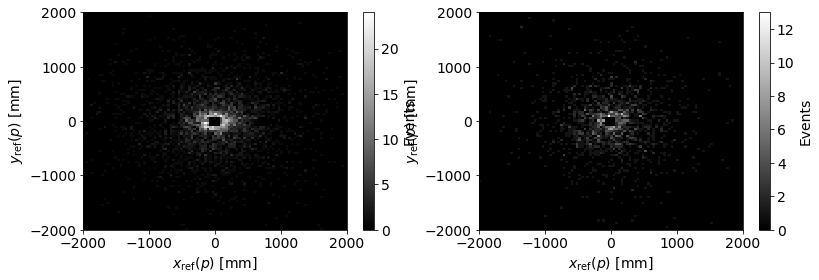

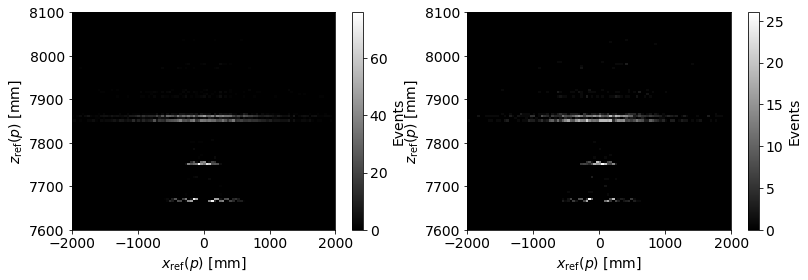

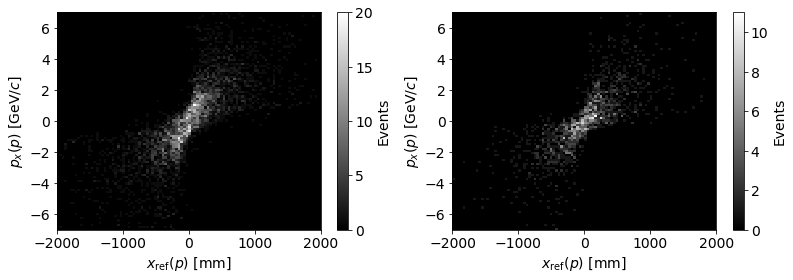

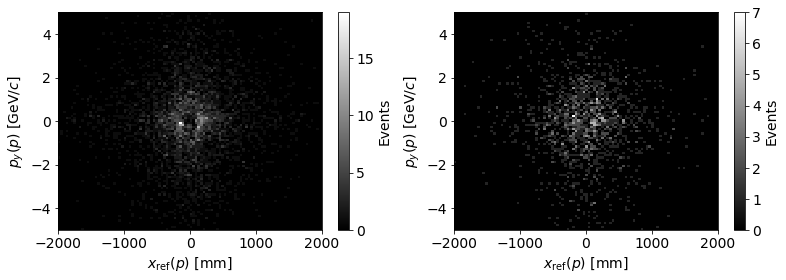

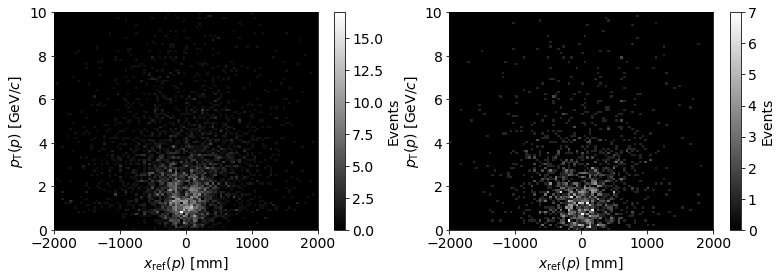

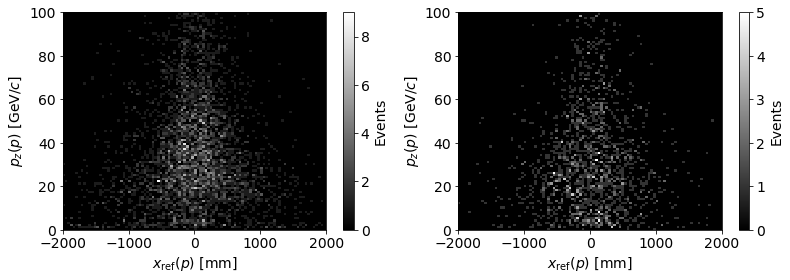

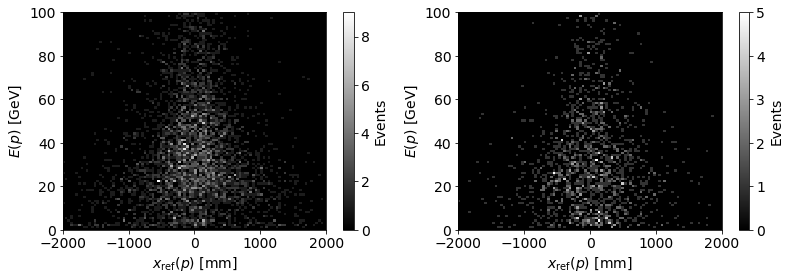

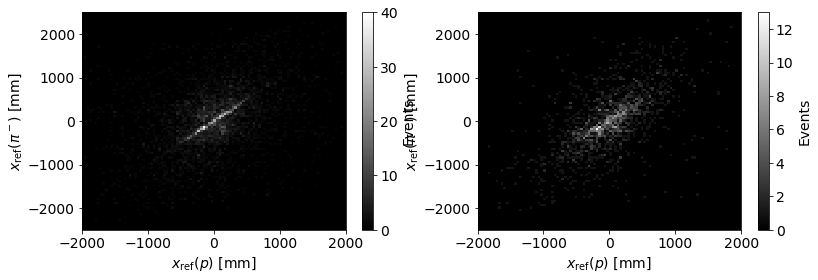

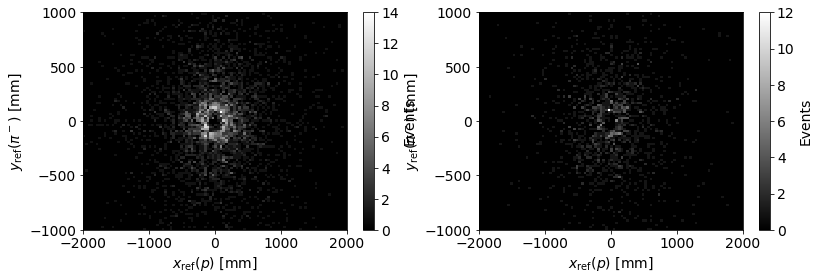

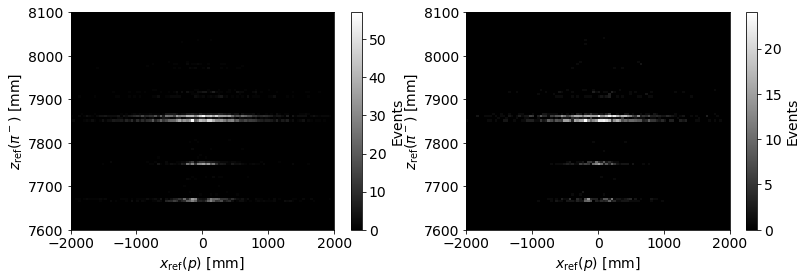

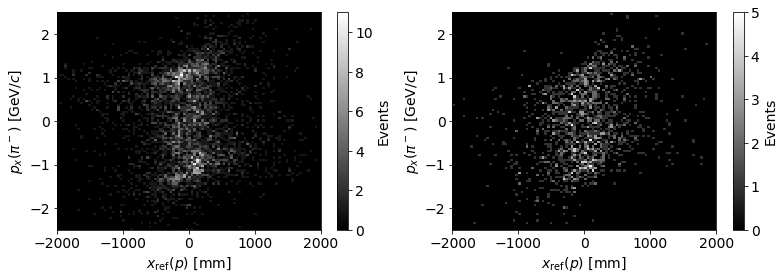

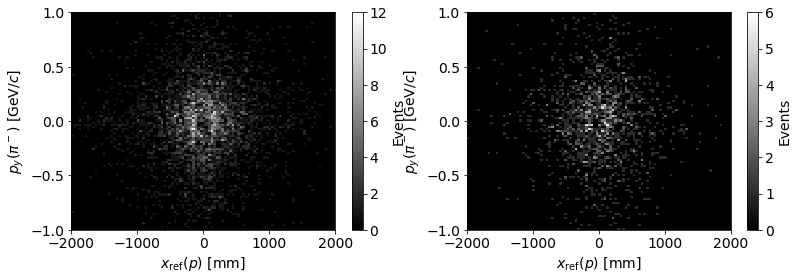

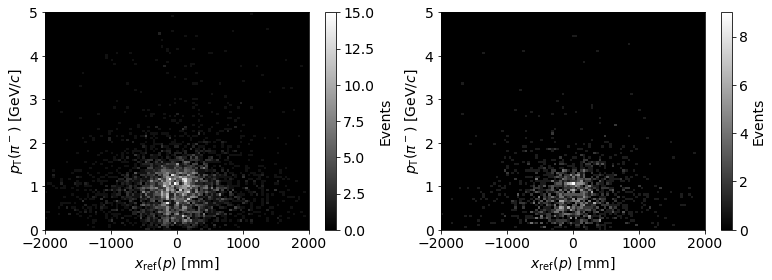

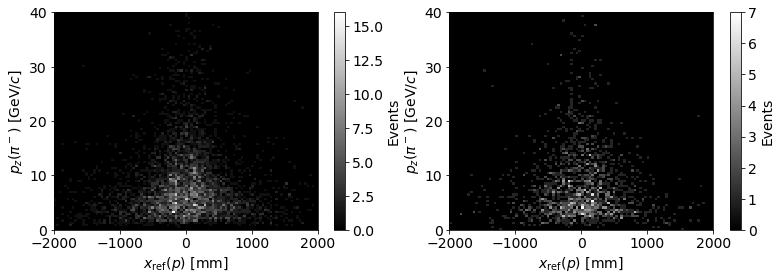

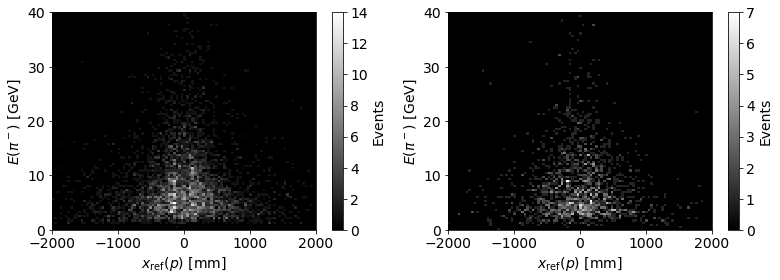

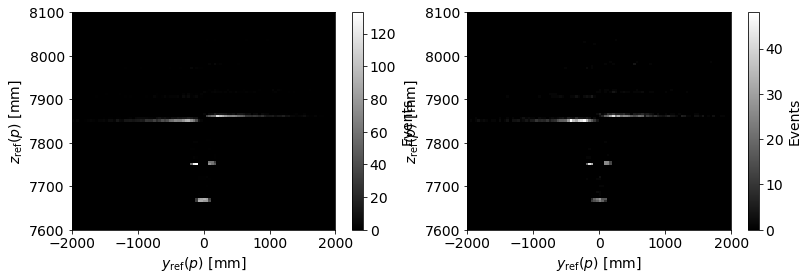

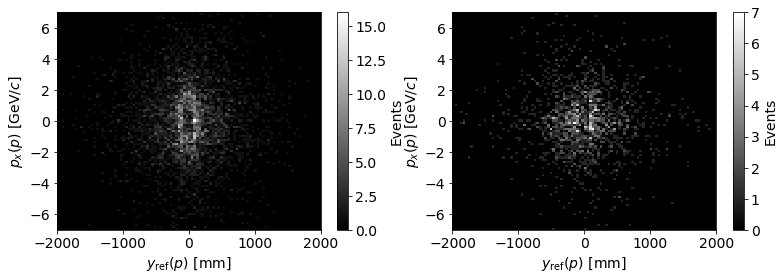

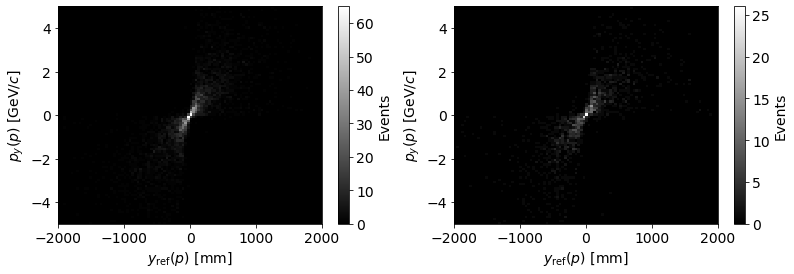

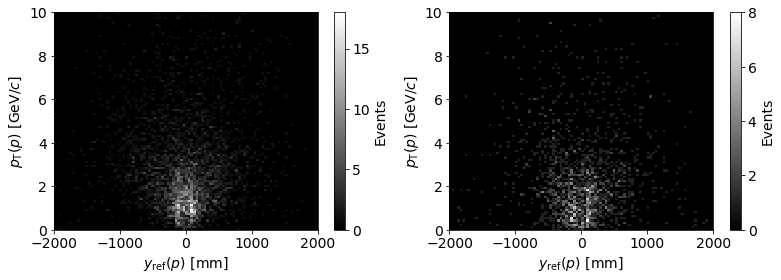

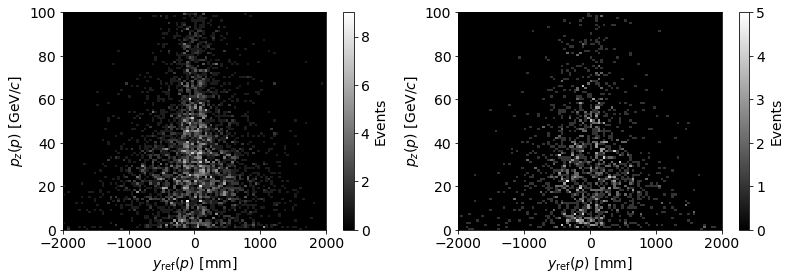

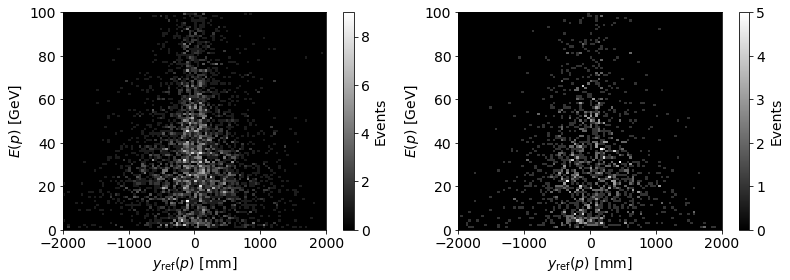

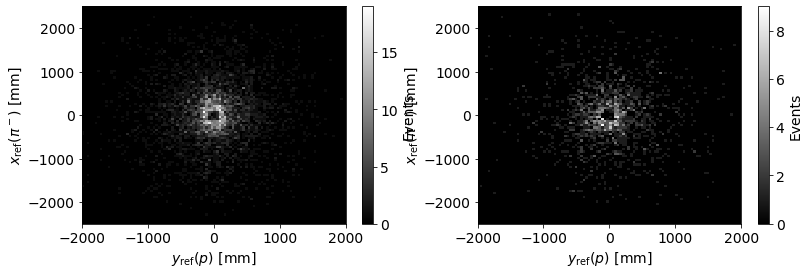

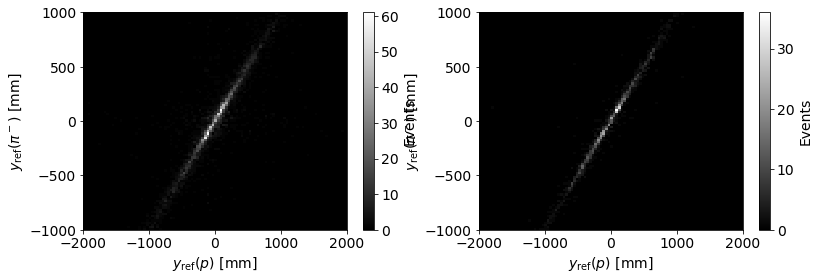

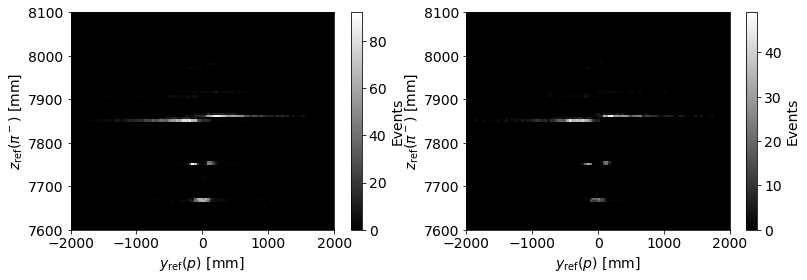

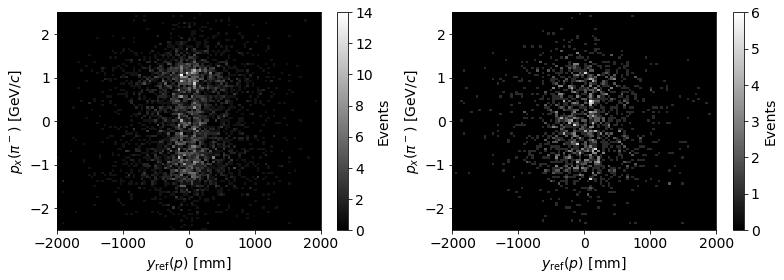

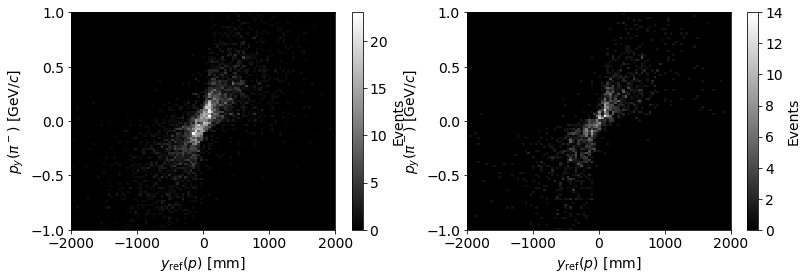

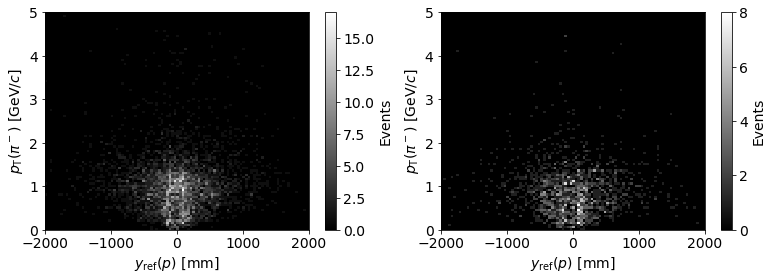

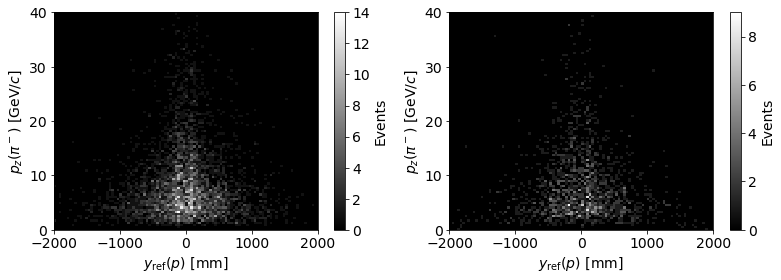

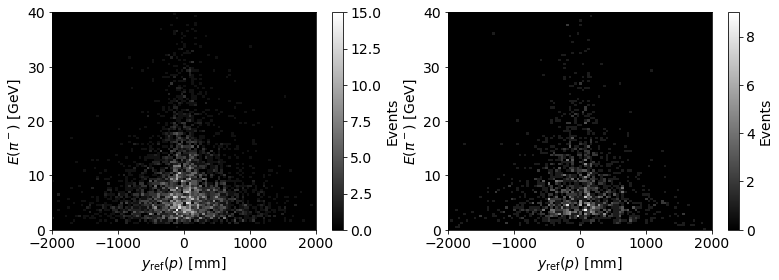

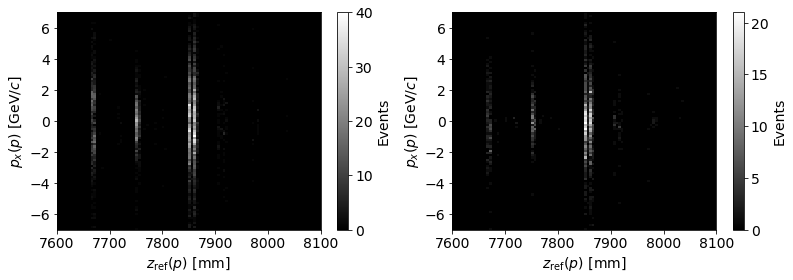

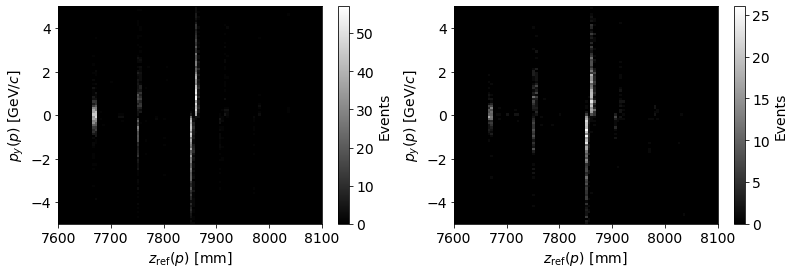

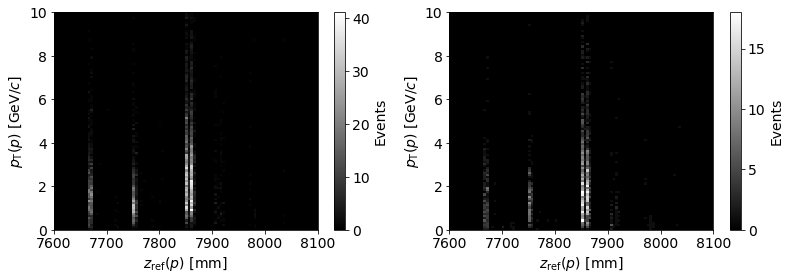

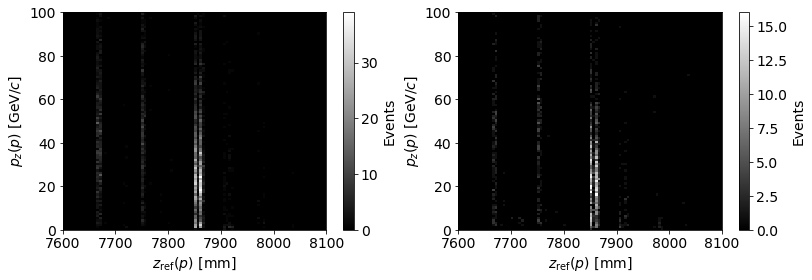

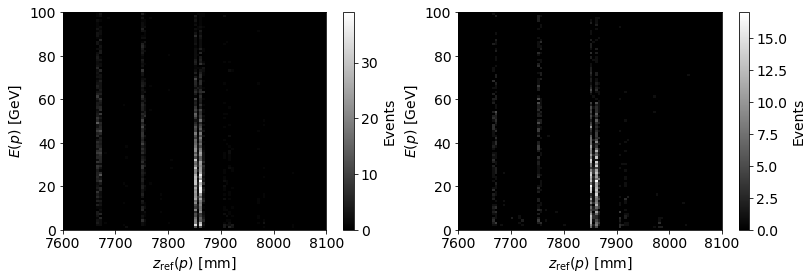

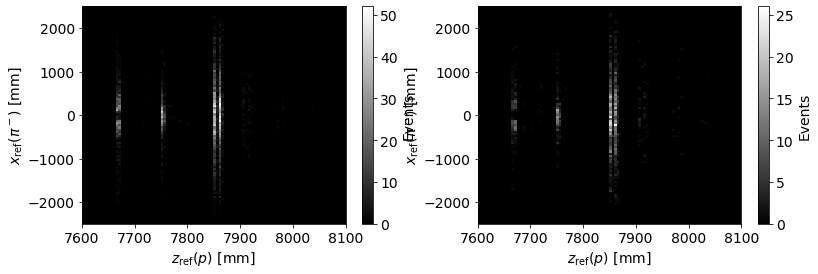

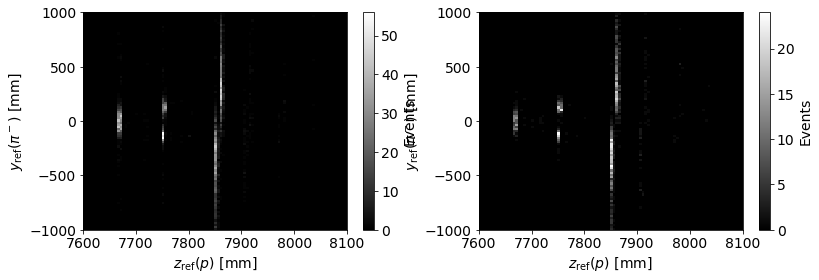

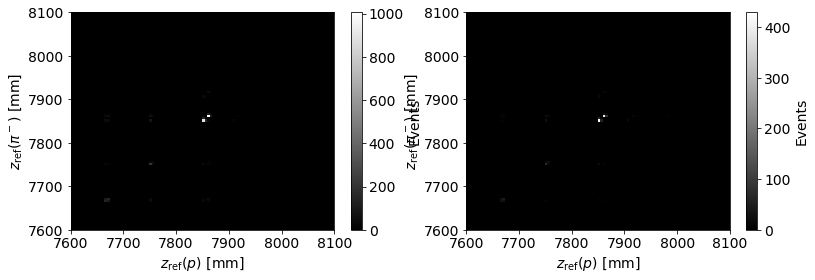

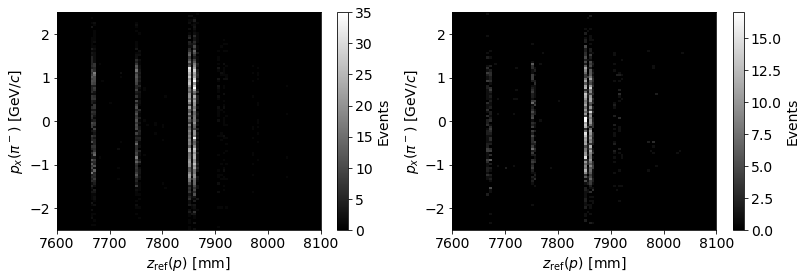

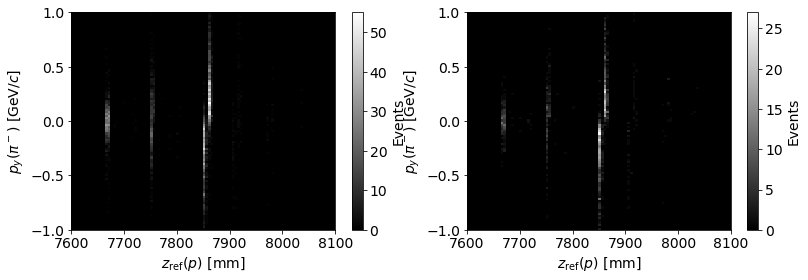

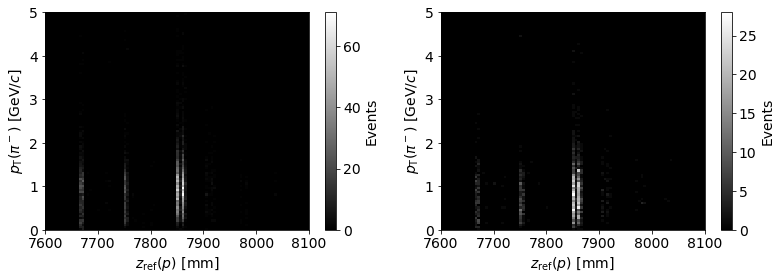

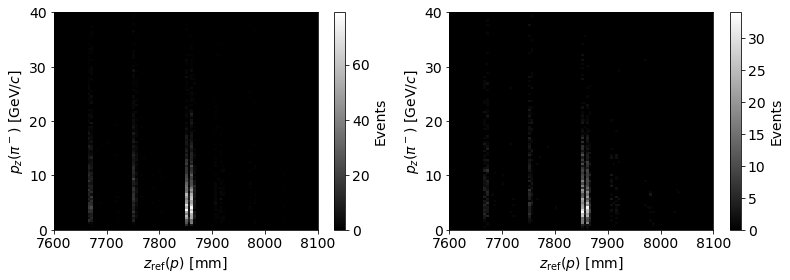

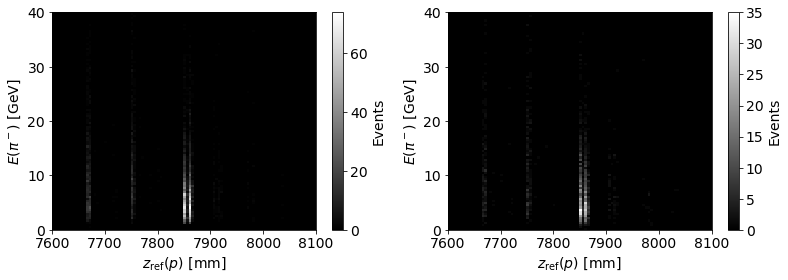

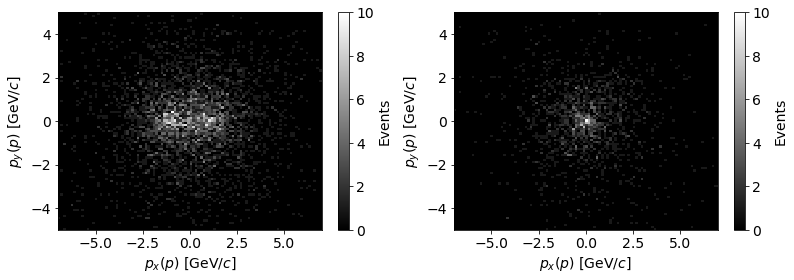

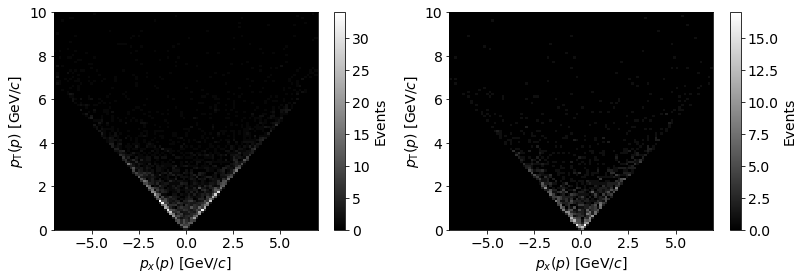

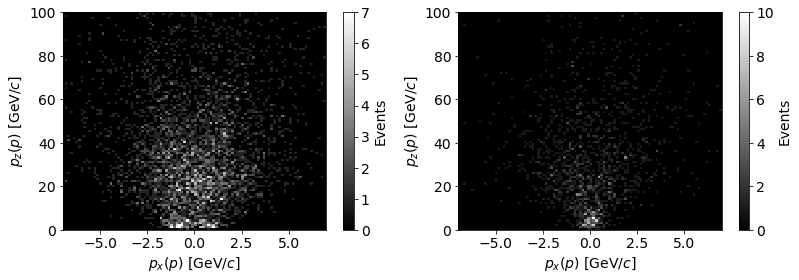

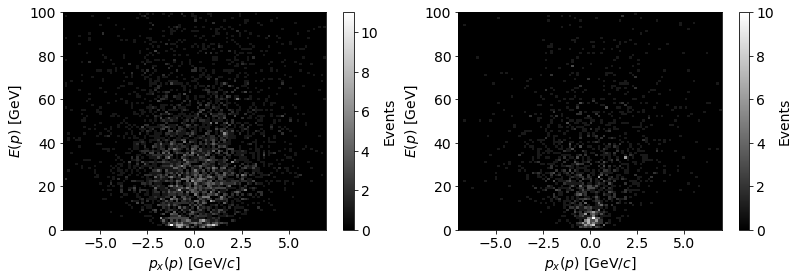

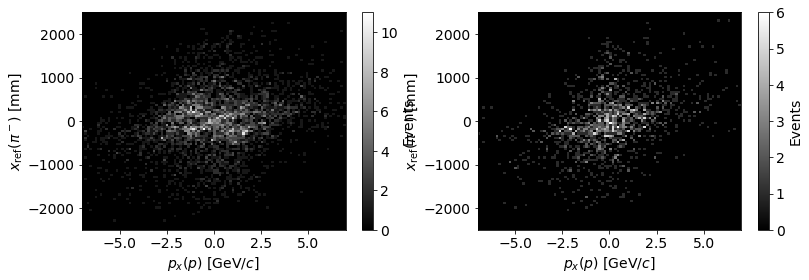

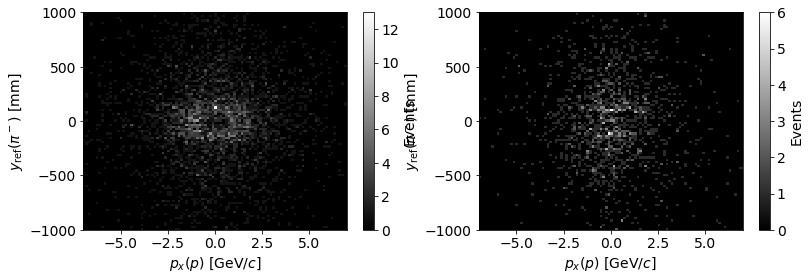

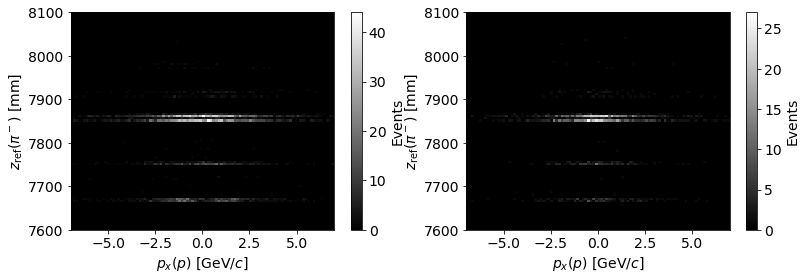

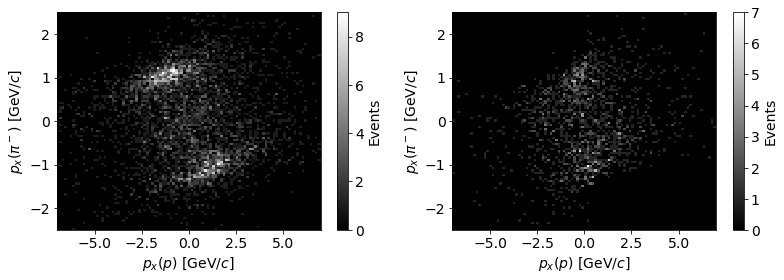

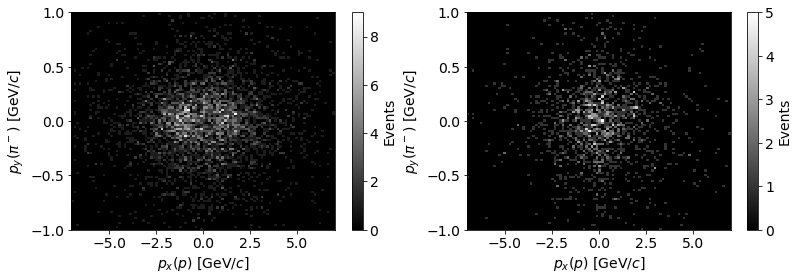

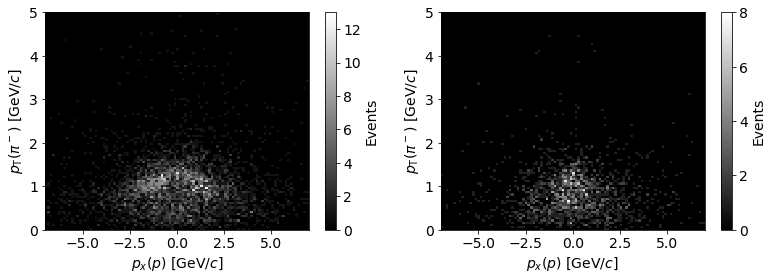

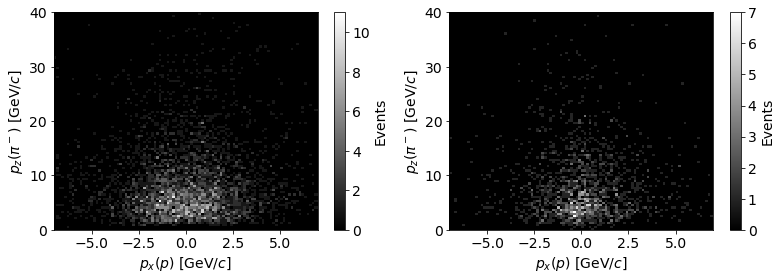

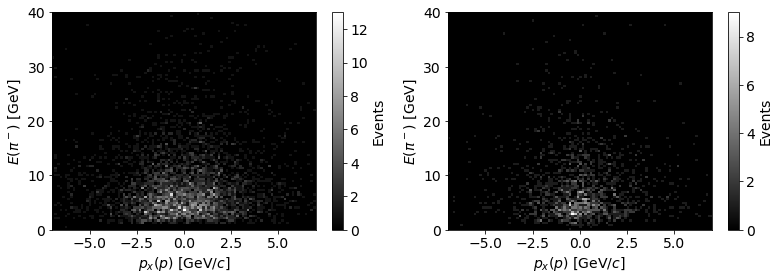

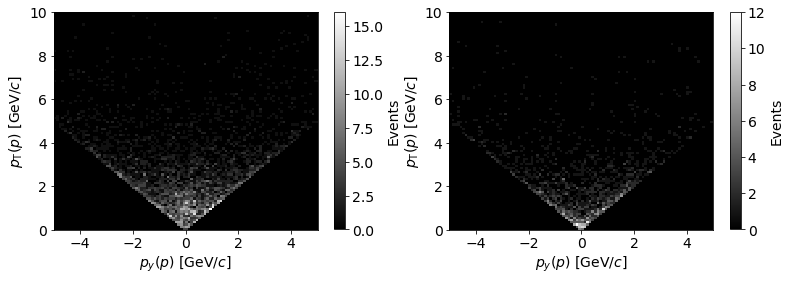

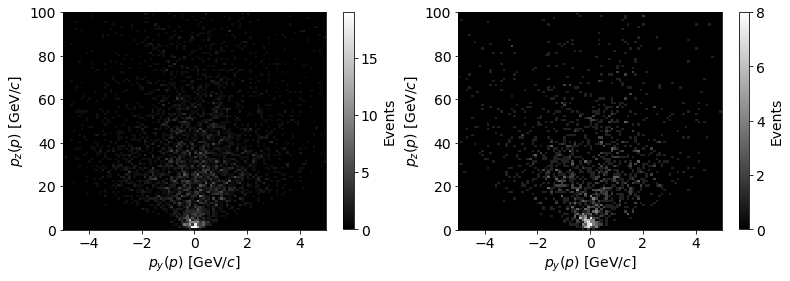

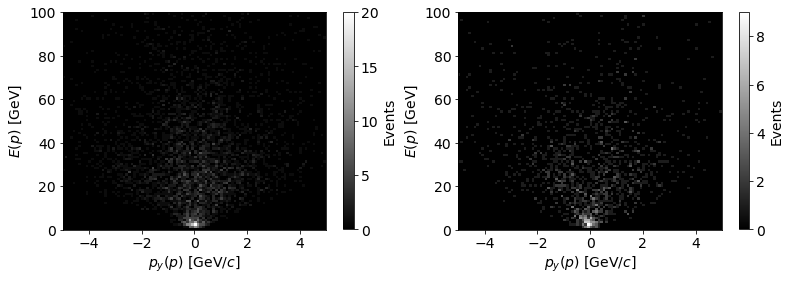

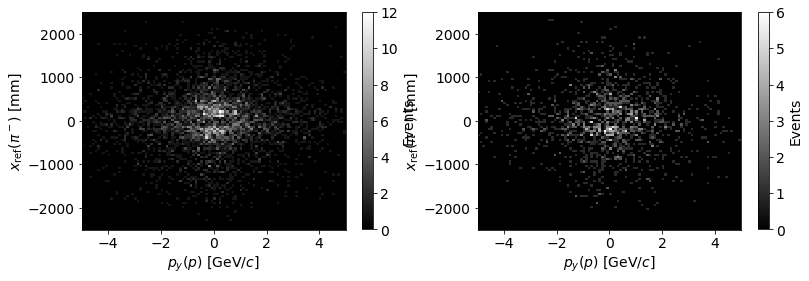

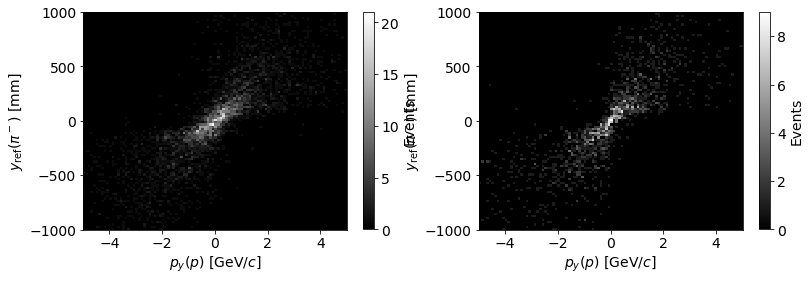

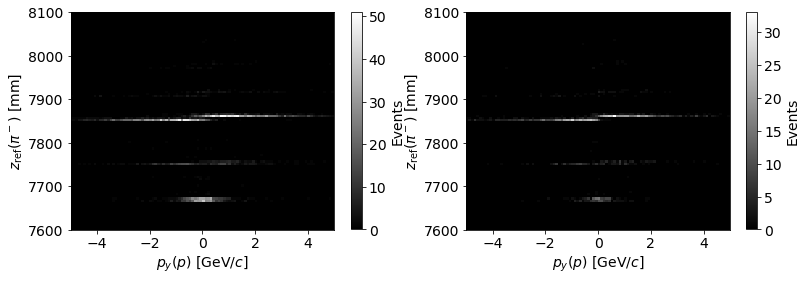

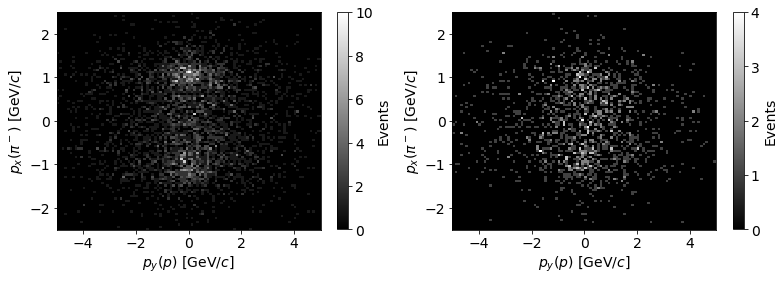

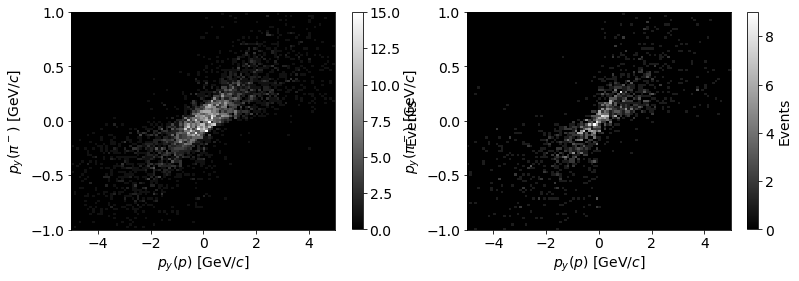

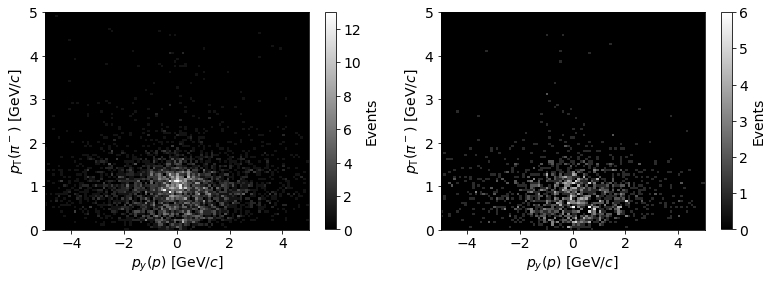

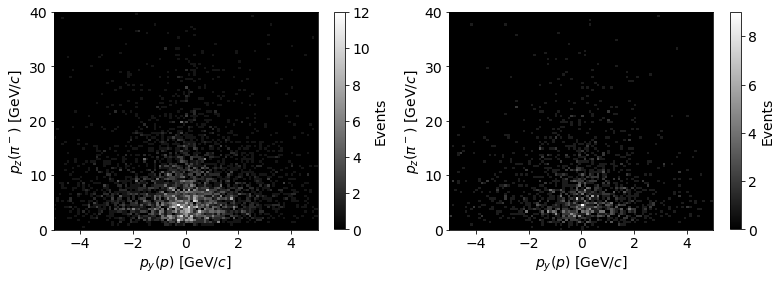

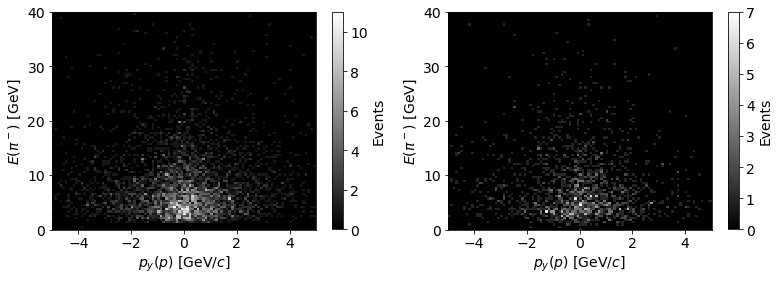

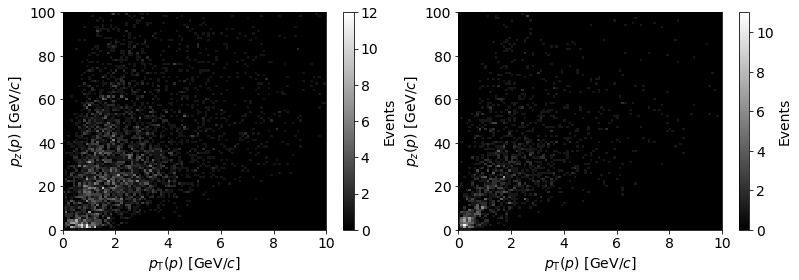

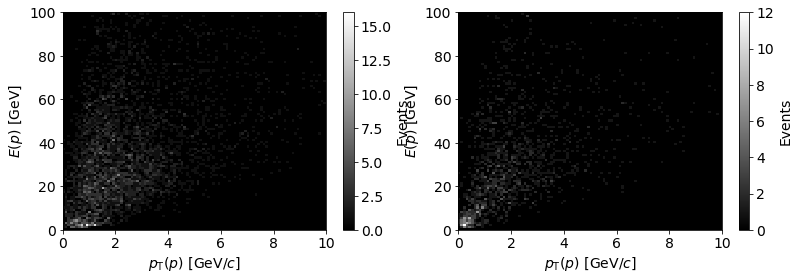

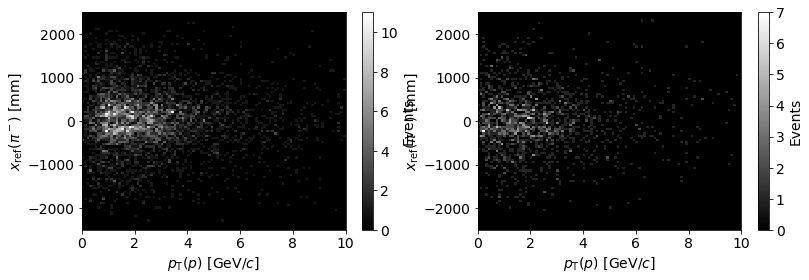

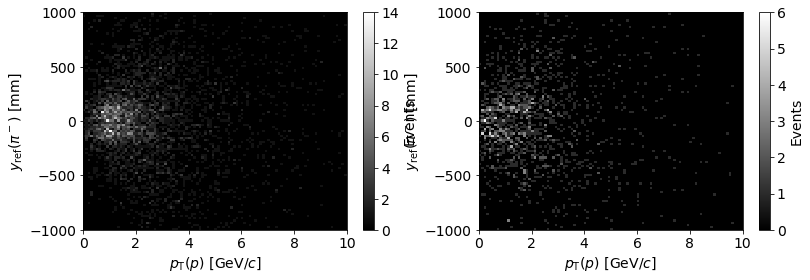

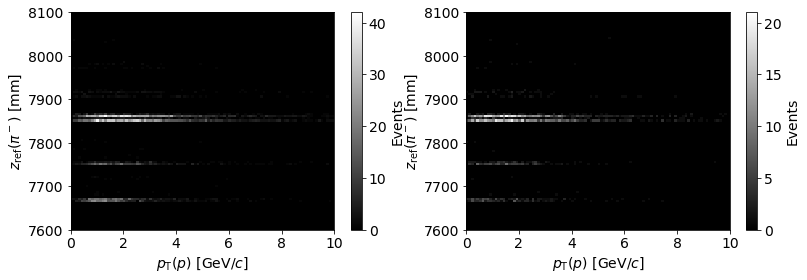

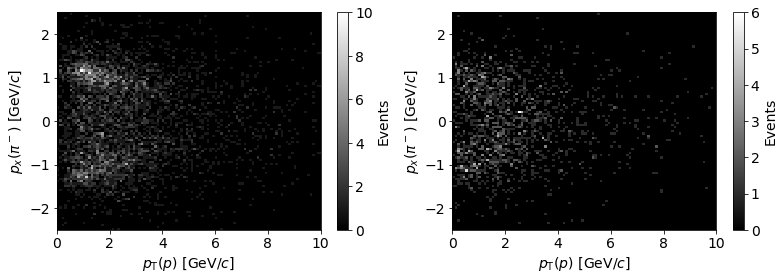

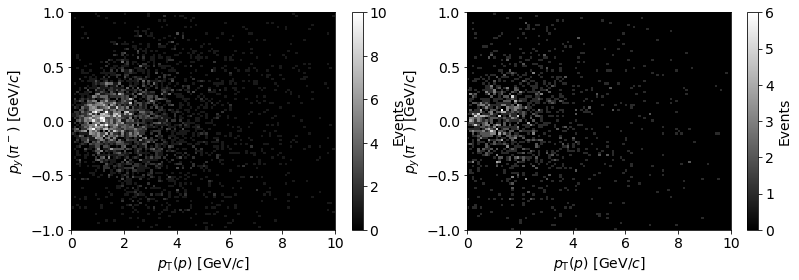

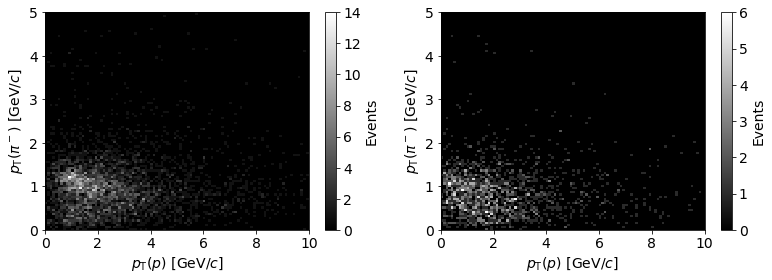

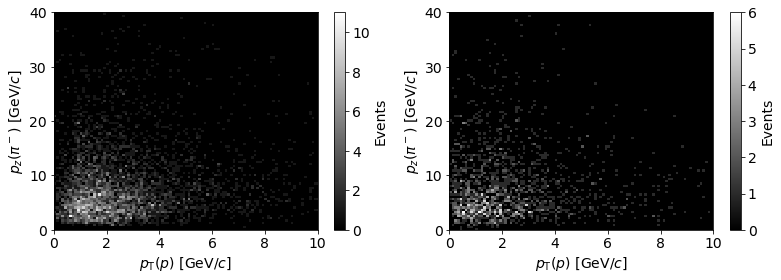

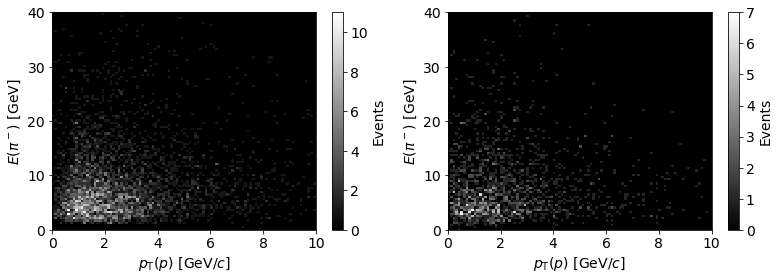

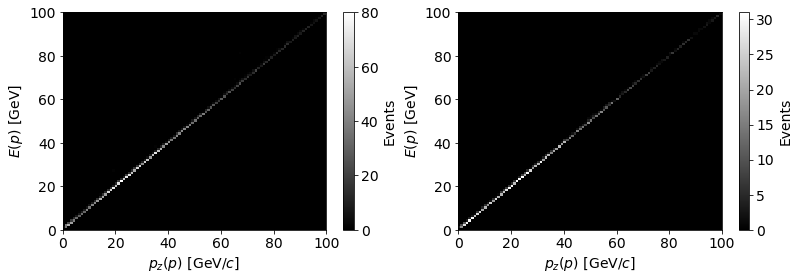

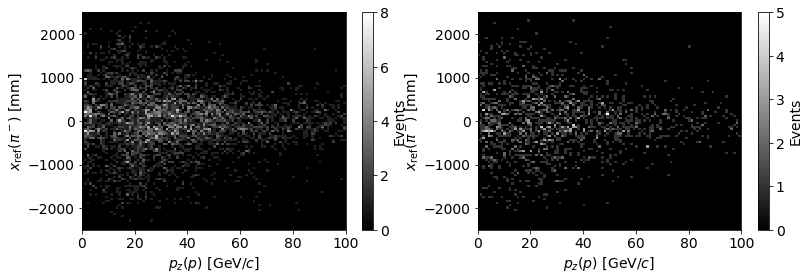

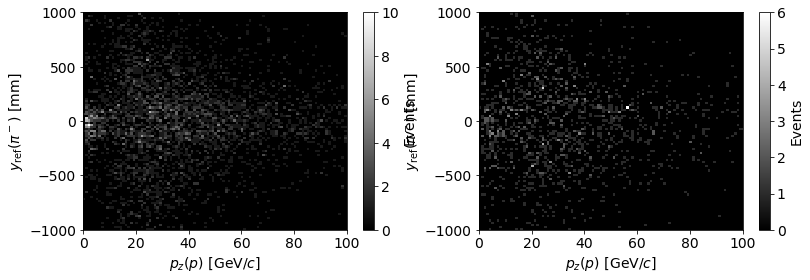

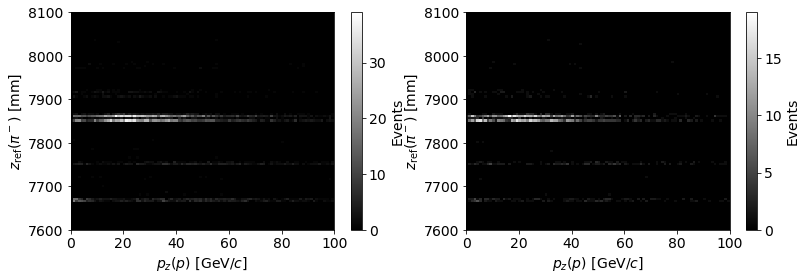

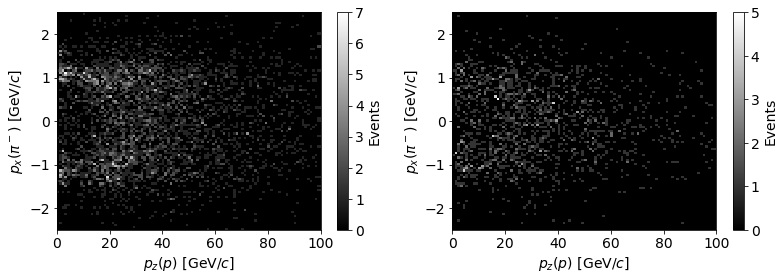

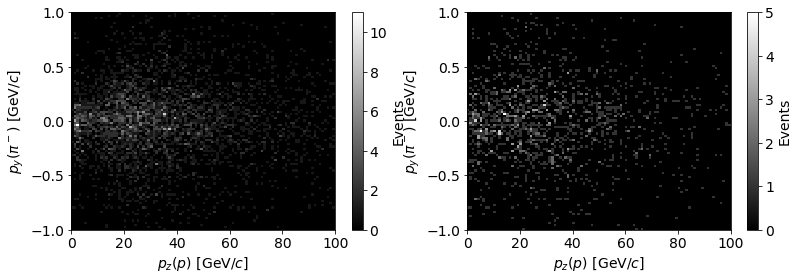

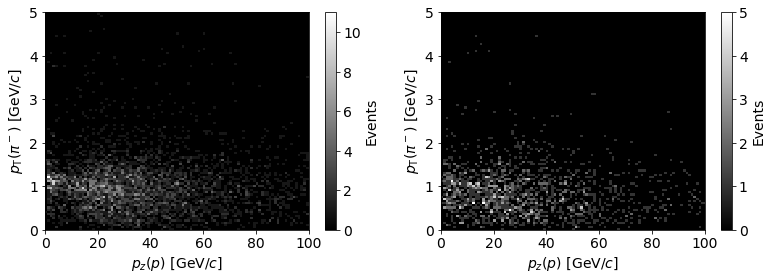

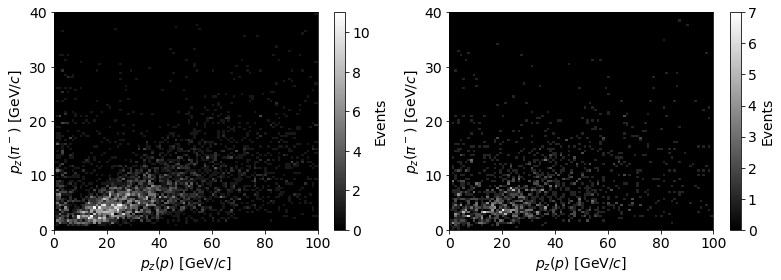

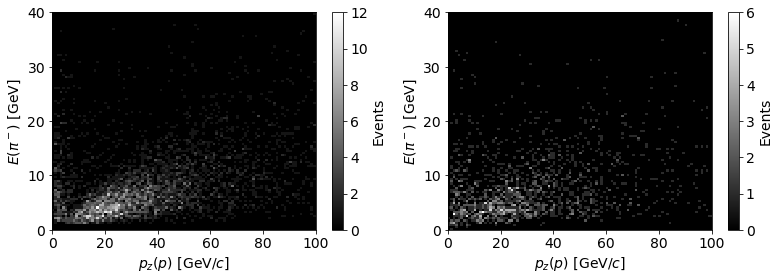

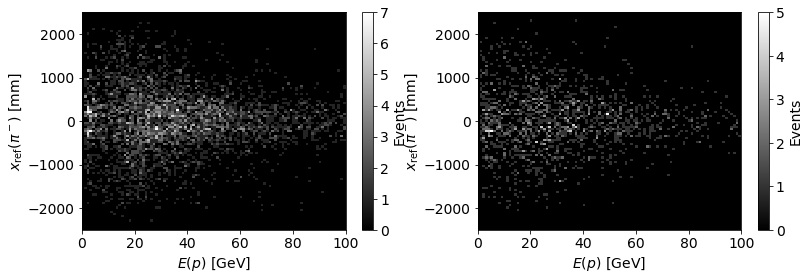

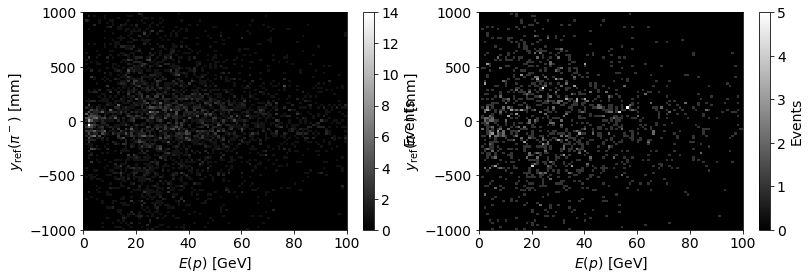

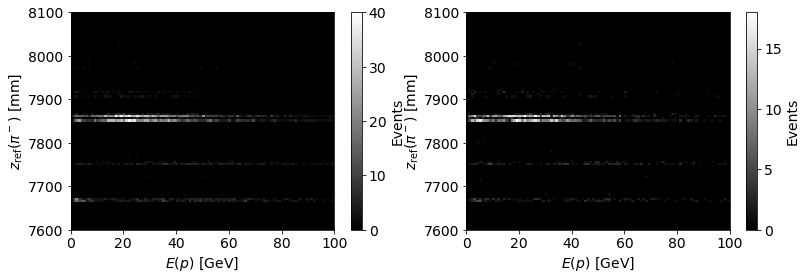

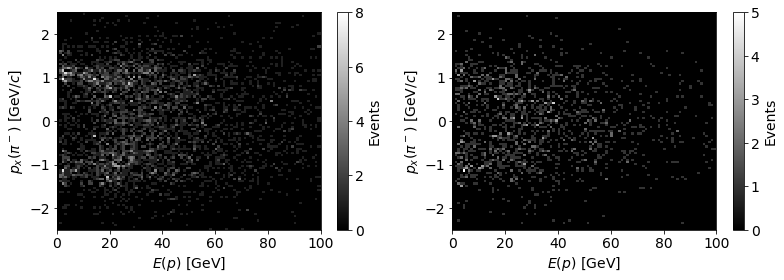

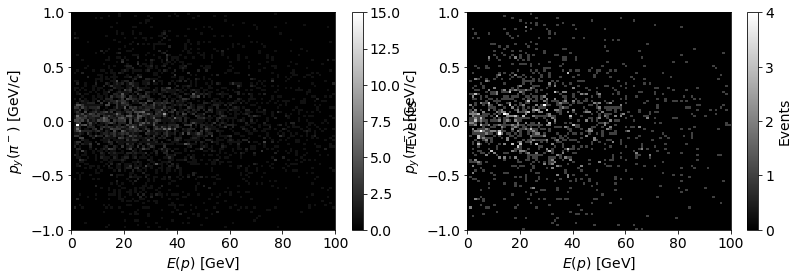

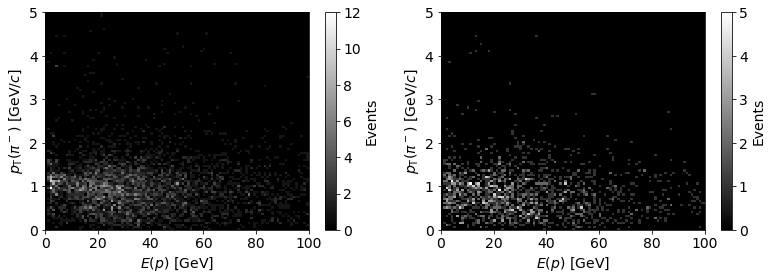

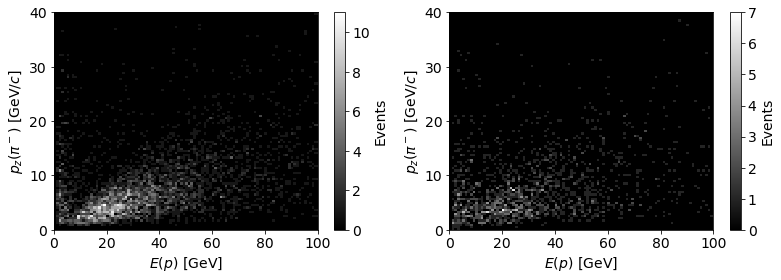

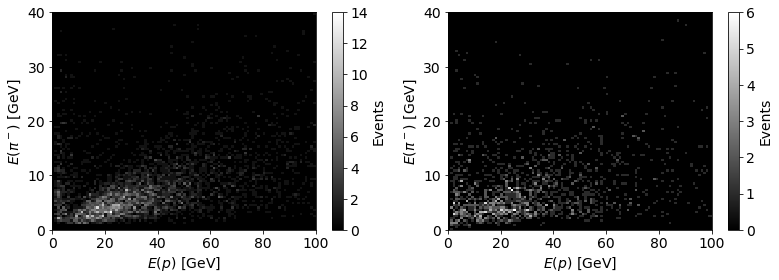

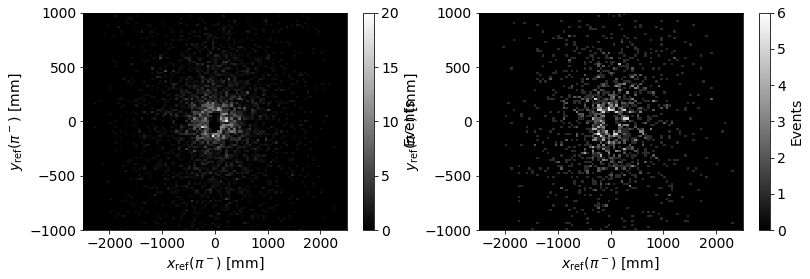

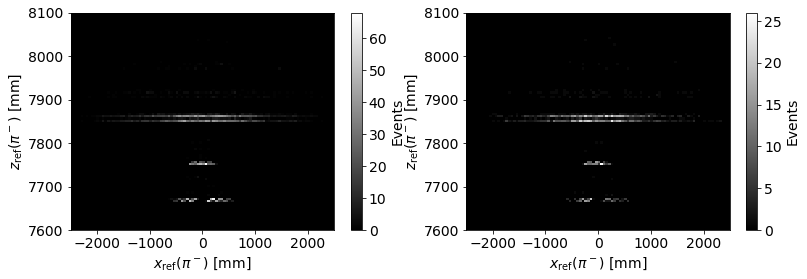

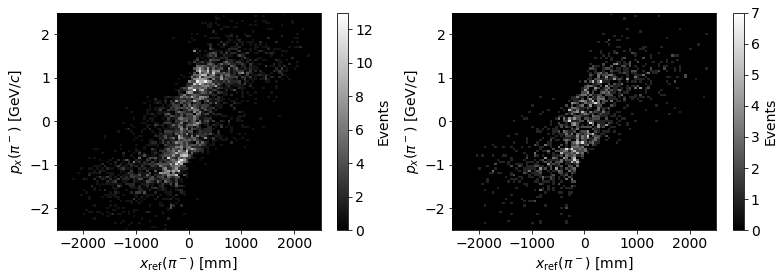

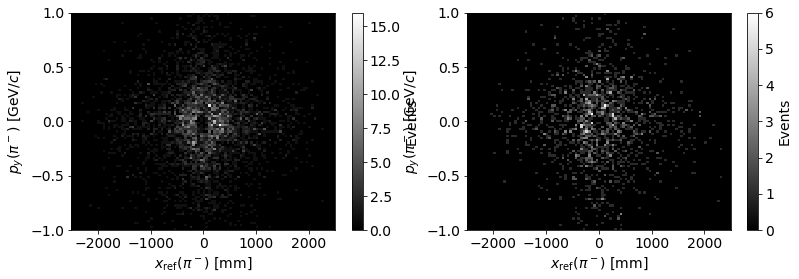

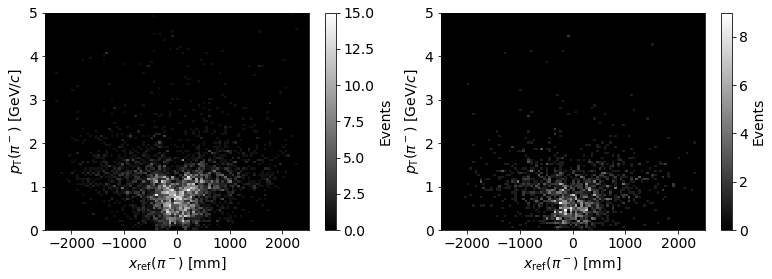

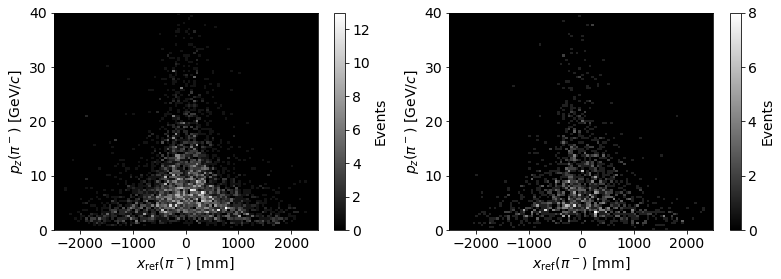

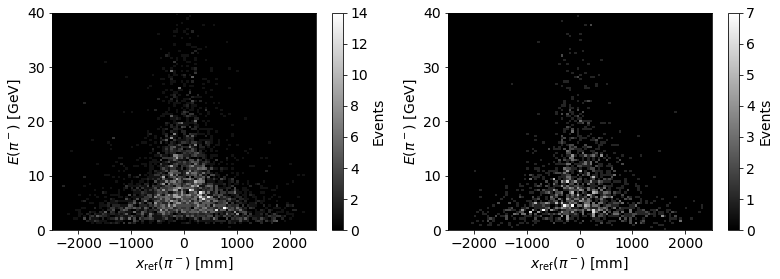

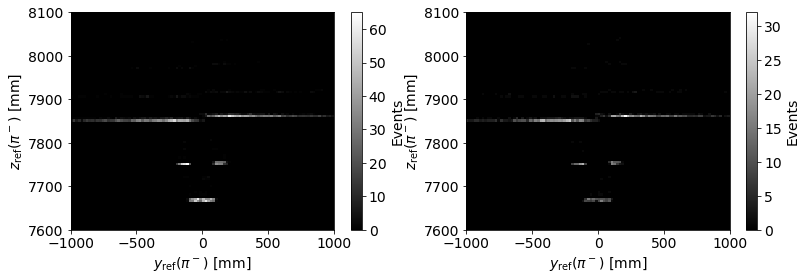

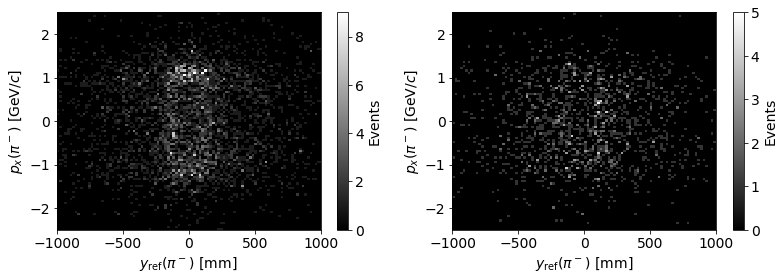

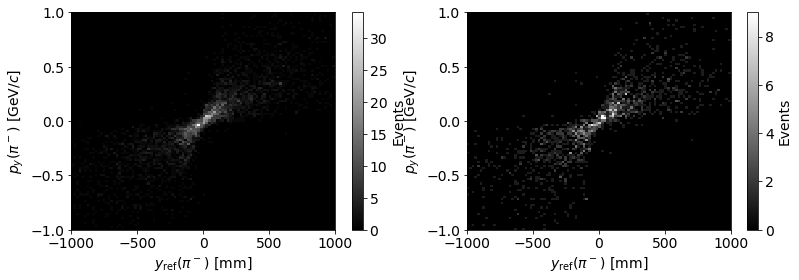

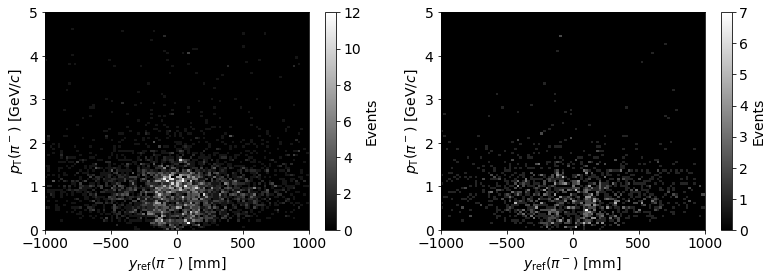

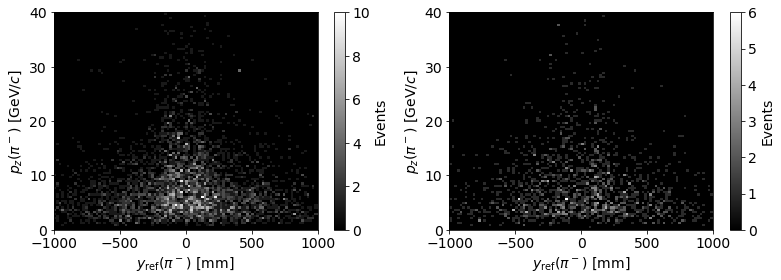

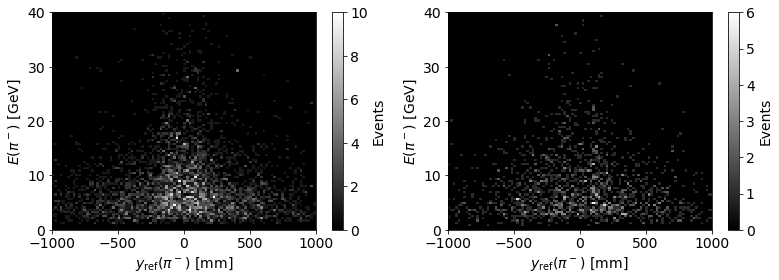

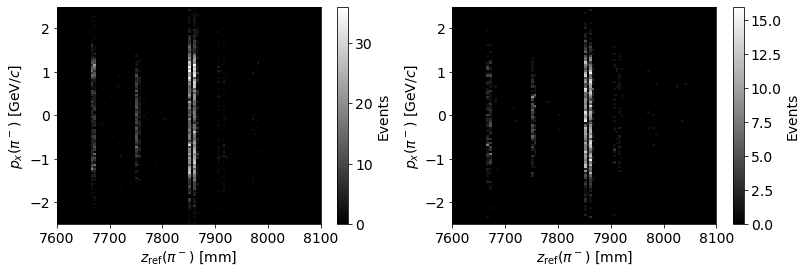

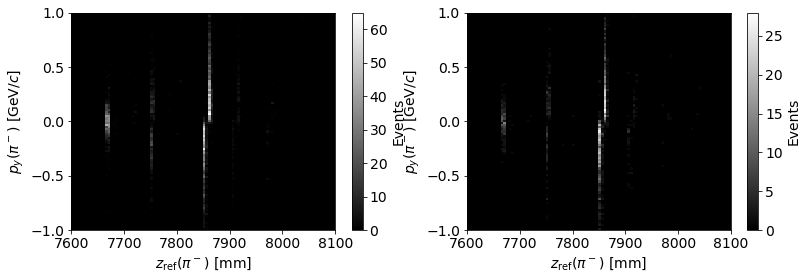

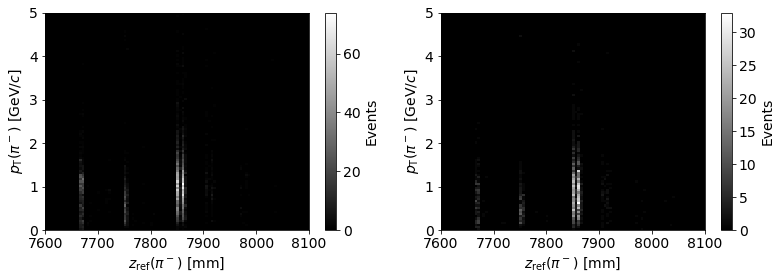

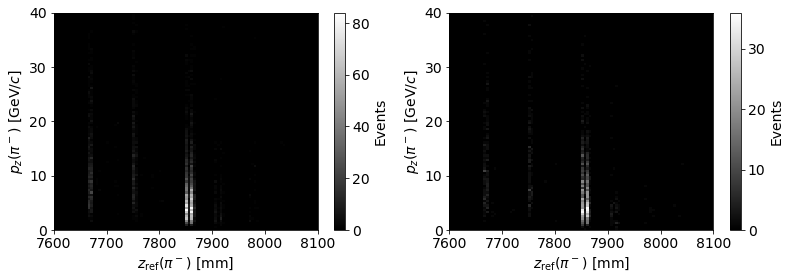

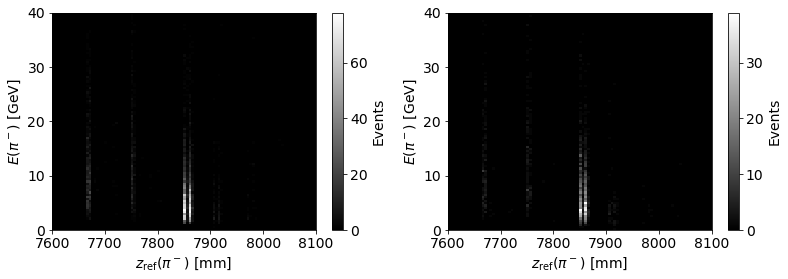

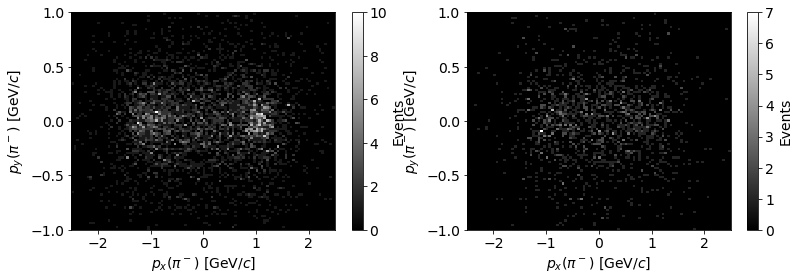

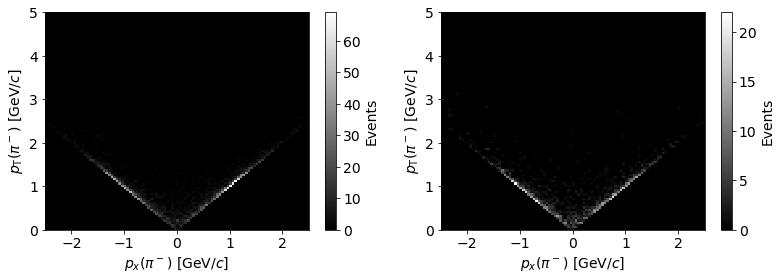

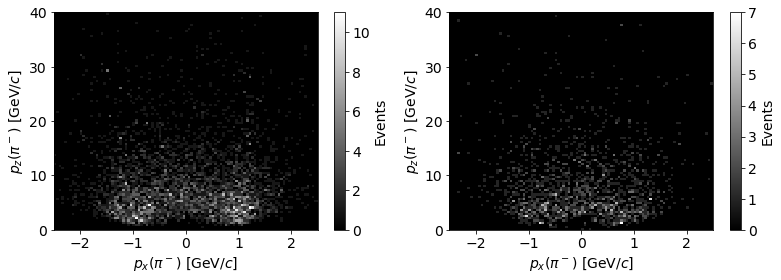

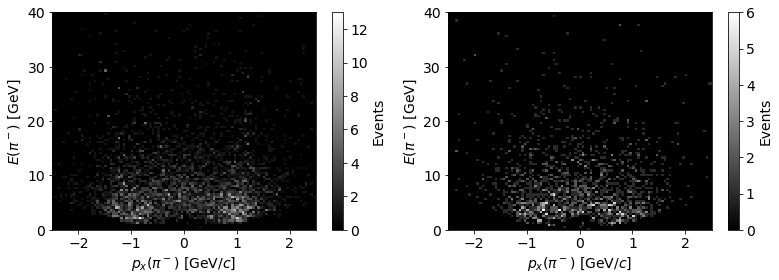

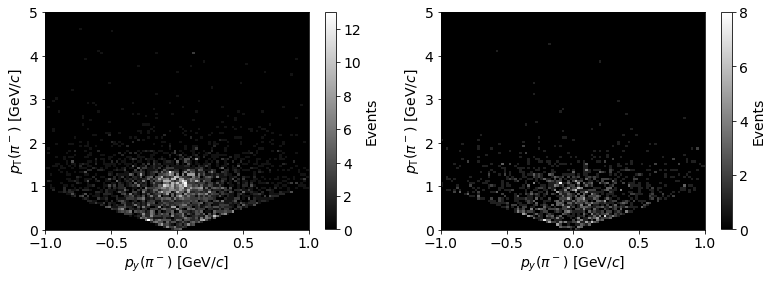

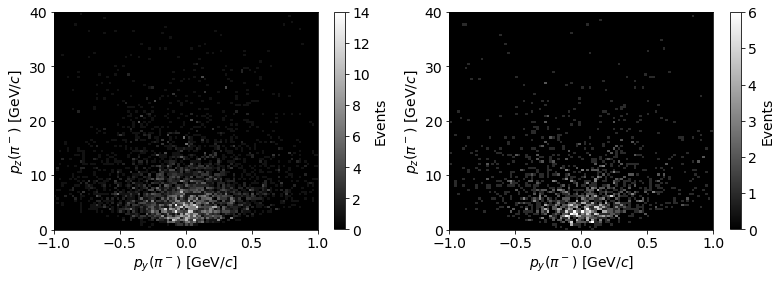

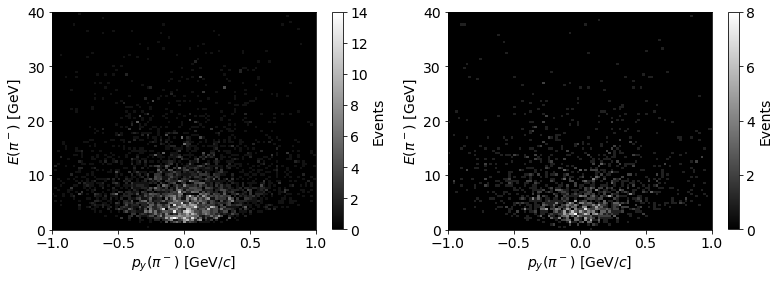

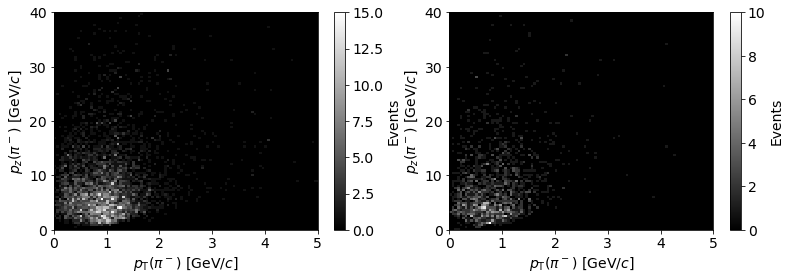

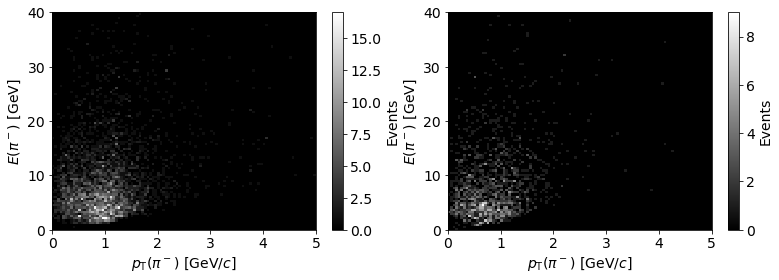

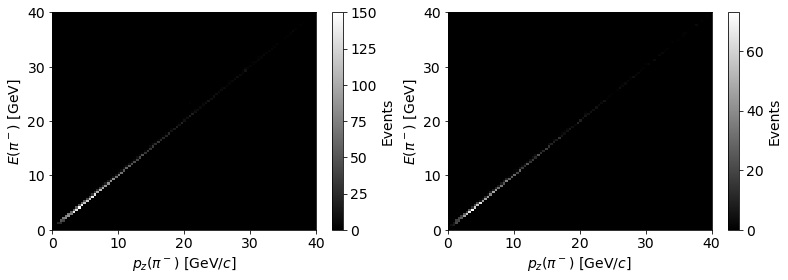

In [18]:
feature_list = [key for key in histogram_parameters.keys()]

for index_x in range(len(feature_list)):
    feature_x = feature_list[index_x]
    
    for index_y in range(index_x + 1, len(feature_list)):
        feature_y = feature_list[index_y]
        
        common_plot_parameters = {
            'binning': 100,
            'plot_title': feature_x + ' vs. ' + feature_y,
            'file_name': feature_x + '_vs_' + feature_y,
            'normalized': False
        }

        plot_paired_2D_histograms(
            df=df_events,
            feature_x_args=histogram_parameters[feature_x],
            feature_y_args=histogram_parameters[feature_y],
            **common_plot_parameters
        )

# Plots of interest

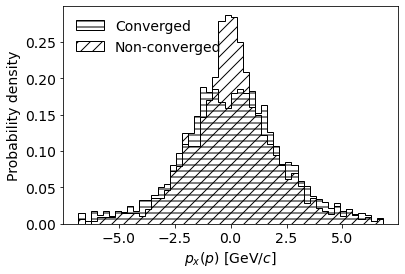

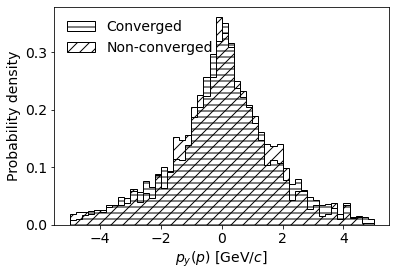

In [39]:
feature = 'p_momentum_x'
plot_arguments = histogram_parameters[feature].copy()
plot_arguments['binning'] = 50
plot_arguments['boundaries'] = (-6.8, 6.8)
plot_arguments["normalized"] = True
plot_arguments['scale'] = 'linear'
plot_arguments['file_name'] = feature
plot_arguments['scientific_notation'] = True
plot_arguments['plot_title'] = "Proton PP momentum $" + feature[-1] + "$ component"
plot_arguments['save_this_plot'] = True
plot_arguments['legend_loc'] = 'upper left'
plot_arguments['ylim'] = (0, 0.299)
plot_protoparticle_histograms(df=df_events, **plot_arguments)

feature = 'p_momentum_y'
plot_arguments = histogram_parameters[feature].copy()
plot_arguments['binning'] = 50
plot_arguments["normalized"] = True
plot_arguments['scale'] = 'linear'
plot_arguments['file_name'] = feature
plot_arguments['scientific_notation'] = True
plot_arguments['plot_title'] = "Proton PP momentum $" + feature[-1] + "$ component"
plot_arguments['save_this_plot'] = True
plot_arguments['legend_loc'] = 'upper left'
plot_protoparticle_histograms(df=df_events, **plot_arguments)

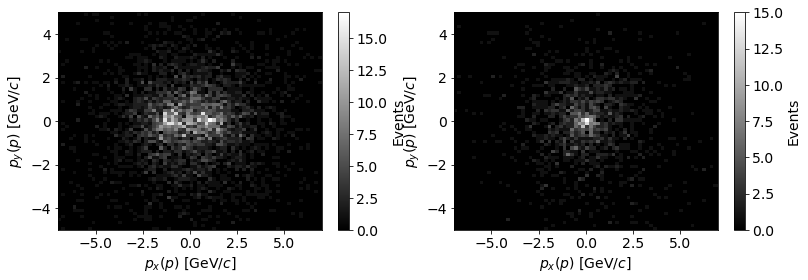

In [20]:
feature_x = 'p_momentum_x'
feature_y = 'p_momentum_y'

common_plot_parameters = {
    'binning': 70,
    'plot_title': feature_x + ' vs. ' + feature_y,
    'file_name': feature_x + '_vs_' + feature_y,
    'normalized': False,
    'save_this_plot': True,
    'scientific_notation': True
}

plot_paired_2D_histograms(
    df=df_events,
    feature_x_args=histogram_parameters[feature_x],
    feature_y_args=histogram_parameters[feature_y],
    **common_plot_parameters
)

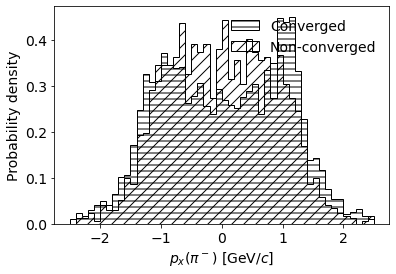

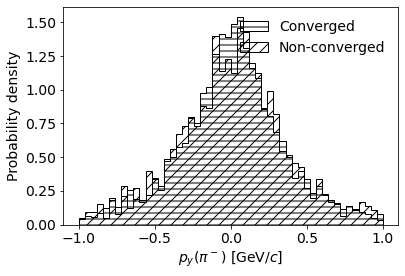

In [21]:
feature = 'pim_momentum_x'
plot_arguments = histogram_parameters[feature].copy()
plot_arguments['binning'] = 50
plot_arguments["normalized"] = True
plot_arguments['scale'] = 'linear'
plot_arguments['file_name'] = feature
plot_arguments['scientific_notation'] = True
plot_arguments['plot_title'] = "Proton PP momentum $" + feature[-1] + "$ component"
plot_arguments['save_this_plot'] = True
plot_protoparticle_histograms(df=df_events, **plot_arguments)

feature = 'pim_momentum_y'
plot_arguments = histogram_parameters[feature].copy()
plot_arguments['binning'] = 50
plot_arguments["normalized"] = True
plot_arguments['scale'] = 'linear'
plot_arguments['file_name'] = feature
plot_arguments['scientific_notation'] = True
plot_arguments['plot_title'] = "Proton PP momentum $" + feature[-1] + "$ component"
plot_arguments['save_this_plot'] = True
plot_protoparticle_histograms(df=df_events, **plot_arguments)

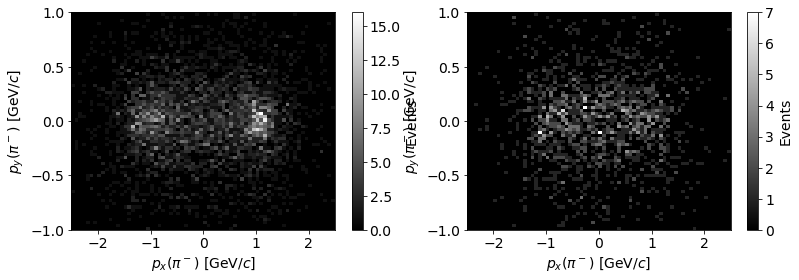

In [22]:
feature_x = 'pim_momentum_x'
feature_y = 'pim_momentum_y'

common_plot_parameters = {
    'binning': 70,
    'plot_title': feature_x + ' vs. ' + feature_y,
    'file_name': feature_x + '_vs_' + feature_y,
    'normalized': False,
    'save_this_plot': True,
    'scientific_notation': True
}

plot_paired_2D_histograms(
    df=df_events,
    feature_x_args=histogram_parameters[feature_x],
    feature_y_args=histogram_parameters[feature_y],
    **common_plot_parameters
)